In [17]:
import pandas as pd
from sklearn import metrics
import numpy as np
import pyswarms as ps
from mealpy import ACOR, FloatVar
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Importar los datos

In [18]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df_test=pd.read_csv('Aportes_2.csv',parse_dates=True,index_col='Date')
df.head()

20E   70E   80E  100E  120E  140E  160E  120W   40W   10W  Year  \
Date                                                                           
2000-01-01 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09  2000   
2000-01-02 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09  2000   
2000-01-03 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09  2000   
2000-01-04  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05  2000   
2000-01-05  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05  2000   

            Month  Value  PosibleNino  PosibleNina  Precipitaciones  \
Date                                                                  
2000-01-01      1   -1.7            0            0              0.0   
2000-01-02      1   -1.7            0            0              0.0   
2000-01-03      1   -1.7            0            0              0.0   
2000-01-04      1   -1.7            0            0              4.6   
2000-01-05      1   -1.7            0            1              0.0   

            Temperaturas  Humedades  Name  AporCaudal  
Date                                                   
2000-01-01          23.6       96.0  NARE       43.51  
2000-01-02          26.7       95.0  NARE       43.67  
2000-01-03          24.0       96.0  NARE       41.21  
2000-01-04          22.4       98.0  NARE       43.80  
2000-01-05          21.0       98.0  NARE       40.62

# 2. Preprocesamiento

In [19]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df_test.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

20E   70E   80E  100E  120E  140E  160E  120W   40W   10W  Value  \
Date                                                                            
2000-01-01 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-02 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-03 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-04  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05   -1.7   
2000-01-05  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05   -1.7   

            Precipitaciones  Temperaturas  Humedades  AporCaudal  
Date                                                              
2000-01-01              0.0          23.6       96.0       43.51  
2000-01-02              0.0          26.7       95.0       43.67  
2000-01-03              0.0          24.0       96.0       41.21  
2000-01-04              4.6          22.4       98.0       43.80  
2000-01-05              0.0          21.0       98.0       40.62

In [20]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df_test['ValorAnterior']=df_test['AporCaudal'].shift(1)
df.head()

20E   70E   80E  100E  120E  140E  160E  120W   40W   10W  Value  \
Date                                                                            
2000-01-01 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-02 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-03 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-04  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05   -1.7   
2000-01-05  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05   -1.7   

            Precipitaciones  Temperaturas  Humedades  AporCaudal  \
Date                                                               
2000-01-01              0.0          23.6       96.0       43.51   
2000-01-02              0.0          26.7       95.0       43.67   
2000-01-03              0.0          24.0       96.0       41.21   
2000-01-04              4.6          22.4       98.0       43.80   
2000-01-05              0.0          21.0       98.0       40.62   

            ValorAnterior  
Date                       
2000-01-01            NaN  
2000-01-02          43.51  
2000-01-03          43.67  
2000-01-04          41.21  
2000-01-05          43.80

In [21]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df_test.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

20E   70E   80E  100E  120E  140E  160E  120W   40W   10W  Value  \
Date                                                                            
2000-01-01 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-02 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-03 -0.36 -0.69 -0.74 -0.30 -0.28  0.20  0.57  0.79  0.61  0.09   -1.7   
2000-01-04  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05   -1.7   
2000-01-05  0.82  0.31 -0.53 -1.02 -1.06 -0.94 -0.57  0.06  0.83  1.05   -1.7   

            Precipitaciones  AporCaudal  ValorAnterior  
Date                                                    
2000-01-01              0.0       43.51            NaN  
2000-01-02              0.0       43.67          43.51  
2000-01-03              0.0       41.21          43.67  
2000-01-04              4.6       43.80          41.21  
2000-01-05              0.0       40.62          43.80

Reemplazar datos faltantes

In [22]:
df = df.fillna(df.mean())
df_test = df_test.dropna()

In [23]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [24]:
df_test.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [25]:
df.shape

(8637, 14)

In [26]:
X = df.drop(columns=['AporCaudal']).values
X_test = df_test.drop(columns=['AporCaudal']).values
y = df['AporCaudal'].values
y_test = df_test['AporCaudal'].values

In [27]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)

# 3. Función objetivo

||y - Xw||^2_2 + alpha * ||w||^2_2 + beta * ||w||_1

In [28]:
alpha=0.1
beta=0.1

In [29]:
# Funcion objetivo para ACO
def objective_function(w):
    global X, y, alpha, beta
    l2_norm_squared = np.linalg.norm(y - np.dot(X, w))**2
    l2_regularization = alpha * np.linalg.norm(w)**2
    l1_regularization = beta * np.sum(np.abs(w))
    return l2_norm_squared/X.shape[0] + l2_regularization + l1_regularization

In [30]:
def objective_function_2(w):
    global X, y, alpha, beta
    l2_norm_squared = np.linalg.norm(y[:, np.newaxis] - np.dot(X, w.T), axis=0)**2
    l2_regularization = alpha * np.linalg.norm(w, axis=1)**2
    l1_regularization = beta * np.sum(np.abs(w), axis=1)
    return l2_norm_squared/X.shape[0] + l2_regularization + l1_regularization

In [46]:
def plot_pred_train(w):
    df_2 = df.copy()
    df_2['AporCaudal_pred'] = df_2.drop(columns=['AporCaudal']).values.dot(w)

    plt.figure(figsize=(20,6))
    plt.plot(df['AporCaudal'][8100:], label='Aportes Reales',color='blue', alpha=0.5)
    plt.plot(df_2['AporCaudal_pred'][8100:], label='Aportes Pred',color='red', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('m3/s')
    plt.legend()
    plt.show()

def plot_pred_test(w):
    df_2 = df_test.copy().drop(columns=['AporCaudal'])
    aporte_real = df_test['AporCaudal'].values
    aporte_pred_dia_anterior = df_2.values.dot(w)
    aporte_pred = np.zeros(len(aporte_real))
    # aporte_pred[0] = 26.057
    for i in range(len(df_2)):
        x = df_2.iloc[i].values
        if i==0:
            x[-1] = 26.057
        else:
            x[-1] = aporte_pred[i-1]
        pred = x.dot(w)
        aporte_pred[i] = pred

    plt.figure(figsize=(20,6))
    plt.plot(aporte_real[0:90], label='Aportes Reales',color='black', alpha=0.7)
    plt.plot(aporte_pred[0:90], label='Aportes Pred',color='red', alpha=0.7)
    plt.plot(aporte_pred_dia_anterior[0:90], label='Aportes Pred Dia Anterior',color='blue', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('m3/s')
    plt.legend()
    plt.show()

# 4. PSO: Optimización por enjambre de particulas

In [49]:
#Definicmos los hiperparametros
options = {'c1': 2, 'c2': 2, 'w':0.9}

#Valores max y min iniciales para las particulas
max_bound = 10*np.ones(13)
min_bound = - max_bound
bounds = (min_bound, max_bound)

In [50]:
parameters_history = []
cost_history = []
solutions = []
for alpha in [0.01,0.1,0]:
    for beta in [0.01,0.1,0]:
        for c1 in [1,2]:
            for c2 in [1,2]:
                for w in [0.7, 0.8, 0.9]:
                    for n_particles in [100, 200, 500]:
                        options = {'c1': c1, 'c2': c2, 'w':w}
                        #Instanciacion del optimizador
                        optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=13, options=options, bounds=bounds)
                        #Corremos el algoritmo PSO
                        cost, pos = optimizer.optimize(objective_function_2, 100)

                        #Extraemos la mejor solucion
                        solution_PSO = optimizer.swarm.best_pos
                        print(f"Parameters of the best solution : {solution_PSO}")

                        parameters_history.append({'alpha': alpha, 'beta': beta, 'c1': c1, 'c2': c2, 'w': w, 'n_particles': n_particles})
                        cost_history.append(cost)
                        solutions.append(solution_PSO)

2025-03-03 19:44:52,341 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/100, best_cost=445    

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:44:54,422 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.56288565103296, best pos: [ 5.30722751 -2.76569209 -2.95851496 -1.20158668  1.70890322 -0.1019819
  0.3392581  -1.34907437 -1.19987077 -2.94310492 -1.37045603  0.32554661
  0.86946724]
2025-03-03 19:44:54,434 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 5.30722751 -2.76569209 -2.95851496 -1.20158668  1.70890322 -0.1019819
  0.3392581  -1.34907437 -1.19987077 -2.94310492 -1.37045603  0.32554661
  0.86946724]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:44:57,862 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.9684910472133, best pos: [-1.42301727 -1.13559289 -2.09754141 -0.19969805  0.76902072 -1.12432126
 -2.49367392 -0.77178988  0.06396569 -1.11923065 -1.47266062  0.32954034
  0.86757731]
2025-03-03 19:44:57,877 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.42301727 -1.13559289 -2.09754141 -0.19969805  0.76902072 -1.12432126
 -2.49367392 -0.77178988  0.06396569 -1.11923065 -1.47266062  0.32954034
  0.86757731]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:45:05,979 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.80195218397614, best pos: [-0.35905302 -0.48610694 -1.16232504 -1.52517736  2.07490702 -0.00959261
 -1.07096305 -0.4741256  -0.12545057  0.10939303 -1.51992317  0.33027207
  0.86745561]
2025-03-03 19:45:05,999 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.35905302 -0.48610694 -1.16232504 -1.52517736  2.07490702 -0.00959261
 -1.07096305 -0.4741256  -0.12545057  0.10939303 -1.51992317  0.33027207
  0.86745561]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:45:07,968 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.22025805572144, best pos: [-0.13401548 -1.43525164 -1.44096411 -1.14777795  0.65537506  0.27875213
 -0.13179247 -1.11519083 -2.21300454  1.58508694 -1.52042185  0.3395713
  0.87190709]
2025-03-03 19:45:07,977 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.13401548 -1.43525164 -1.44096411 -1.14777795  0.65537506  0.27875213
 -0.13179247 -1.11519083 -2.21300454  1.58508694 -1.52042185  0.3395713
  0.87190709]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:45:10,947 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.52827379258576, best pos: [-0.2495859   0.10295105 -2.64668539  0.22119153  1.51690069 -0.15380011
  0.94586785 -1.65157502 -0.8311561   1.96656904 -0.67905696  0.32148553
  0.86791717]
2025-03-03 19:45:10,960 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.2495859   0.10295105 -2.64668539  0.22119153  1.51690069 -0.15380011
  0.94586785 -1.65157502 -0.8311561   1.96656904 -0.67905696  0.32148553
  0.86791717]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:45:17,647 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.92093579676856, best pos: [-1.27844139  0.70570515 -1.00195381 -0.81461477  0.66478125  0.04710882
 -1.0172038   0.33745773 -0.34021251 -0.08946309 -1.55545021  0.32615058
  0.87005366]
2025-03-03 19:45:17,683 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.27844139  0.70570515 -1.00195381 -0.81461477  0.66478125  0.04710882
 -1.0172038   0.33745773 -0.34021251 -0.08946309 -1.55545021  0.32615058
  0.87005366]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:45:19,415 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.9978864201192, best pos: [ 0.08766162  2.54719771 -5.54462994  2.79018093 -0.67937298 -4.11029853
  3.42852802 -1.97884161  0.45031823 -2.85111852 -0.30888552  0.35051696
  0.85550123]
2025-03-03 19:45:19,426 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.08766162  2.54719771 -5.54462994  2.79018093 -0.67937298 -4.11029853
  3.42852802 -1.97884161  0.45031823 -2.85111852 -0.30888552  0.35051696
  0.85550123]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-03 19:45:22,787 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.4436483835206, best pos: [ 2.1825279   5.10190884 -0.02931323  3.12808722  2.363604    8.42934815
  1.13120133 -0.68350655  5.17664129  6.20290043 -0.81866904  0.23469961
  0.90189858]
2025-03-03 19:45:22,801 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 2.1825279   5.10190884 -0.02931323  3.12808722  2.363604    8.42934815
  1.13120133 -0.68350655  5.17664129  6.20290043 -0.81866904  0.23469961
  0.90189858]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:45:29,592 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.8302719612877, best pos: [-4.43240079  5.55667303 -0.66978668 -1.88276417 -0.90242877 -1.62168794
 -0.09258649  5.54972675 -4.11690741  1.07444291 -1.88369087  0.32183467
  0.86167862]
2025-03-03 19:45:29,604 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-4.43240079  5.55667303 -0.66978668 -1.88276417 -0.90242877 -1.62168794
 -0.09258649  5.54972675 -4.11690741  1.07444291 -1.88369087  0.32183467
  0.86167862]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:45:31,094 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6139909989122, best pos: [ 2.04232741 -3.22863084 -1.87656749 -2.9843317   0.82063555  2.22522494
 -4.4605564  -0.28688416 -1.13035675 -2.95752757 -1.17951311  0.30842728
  0.87545136]
2025-03-03 19:45:31,106 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 2.04232741 -3.22863084 -1.87656749 -2.9843317   0.82063555  2.22522494
 -4.4605564  -0.28688416 -1.13035675 -2.95752757 -1.17951311  0.30842728
  0.87545136]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:45:34,534 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.1394122899466, best pos: [-2.28568292e+00 -7.42996819e-02 -2.04719910e-03 -1.13555986e+00
  2.61126589e+00  5.57314076e-01 -1.27200241e+00 -2.16751033e+00
  3.33269632e+00  9.61123850e-01 -1.31162252e+00  3.25172885e-01
  8.68548820e-01]
2025-03-03 19:45:34,566 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-2.28568292e+00 -7.42996819e-02 -2.04719910e-03 -1.13555986e+00
  2.61126589e+00  5.57314076e-01 -1.27200241e+00 -2.16751033e+00
  3.33269632e+00  9.61123850e-01 -1.31162252e+00  3.25172885e-01
  8.68548820e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:45:41,920 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.3640511439728, best pos: [-1.59178674e+00 -3.48305297e-03  1.23353129e-03 -1.55039048e+00
 -1.56411816e+00  2.23314107e+00 -1.73290748e+00 -1.02425322e+00
  5.33757758e-01 -1.06799109e+00 -1.54655659e+00  3.07182489e-01
  8.75507074e-01]
2025-03-03 19:45:41,944 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-1.59178674e+00 -3.48305297e-03  1.23353129e-03 -1.55039048e+00
 -1.56411816e+00  2.23314107e+00 -1.73290748e+00 -1.02425322e+00
  5.33757758e-01 -1.06799109e+00 -1.54655659e+00  3.07182489e-01
  8.75507074e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373  
2025-03-03 19:45:44,692 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.7088797628599, best pos: [-7.98709498  0.36626714 -4.56530953  2.10766483 -3.30515648 -8.79209963
 -2.9746464   5.43532522 -8.62283979 -0.6690189  -0.56754878  0.29060666
  0.86581421]
2025-03-03 19:45:44,707 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-7.98709498  0.36626714 -4.56530953  2.10766483 -3.30515648 -8.79209963
 -2.9746464   5.43532522 -8.62283979 -0.6690189  -0.56754878  0.29060666
  0.86581421]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-03 19:45:49,023 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.39082257607276, best pos: [ 8.96440777 -6.50042687 -2.31015592 -3.74326685 -0.28375191  0.76697498
 -2.30751007  0.68501413 -5.23723816 -6.31991647 -2.17524135  0.40974154
  0.85494458]
2025-03-03 19:45:49,045 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 8.96440777 -6.50042687 -2.31015592 -3.74326685 -0.28375191  0.76697498
 -2.30751007  0.68501413 -5.23723816 -6.31991647 -2.17524135  0.40974154
  0.85494458]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 19:45:57,975 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.0458800604513, best pos: [-1.5562695   5.29532497 -1.74613362  0.16334463  5.03596879 -5.33705236
  2.11016495  2.71450256  0.72065861 -2.01418916 -1.73622109  0.3889184
  0.87118722]
2025-03-03 19:45:57,989 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-1.5562695   5.29532497 -1.74613362  0.16334463  5.03596879 -5.33705236
  2.11016495  2.71450256  0.72065861 -2.01418916 -1.73622109  0.3889184
  0.87118722]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=386  
2025-03-03 19:45:59,453 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 386.32916871159784, best pos: [ 3.87494379  5.98167757 -8.34600272 -2.45710533  3.63936641  0.33548585
 -0.09672561 -0.59689858  1.67777285 -6.86383871 -1.78770197  0.22906972
  0.94042001]
2025-03-03 19:45:59,463 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 3.87494379  5.98167757 -8.34600272 -2.45710533  3.63936641  0.33548585
 -0.09672561 -0.59689858  1.67777285 -6.86383871 -1.78770197  0.22906972
  0.94042001]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377  
2025-03-03 19:46:03,451 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.3051047911016, best pos: [-9.36054528  8.17296579  4.04566968  1.97737808 -4.78816008 -0.68958646
  0.51767407  7.49113869  1.12548928  1.67953876 -0.55383097  0.42296789
  0.87482146]
2025-03-03 19:46:03,462 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-9.36054528  8.17296579  4.04566968  1.97737808 -4.78816008 -0.68958646
  0.51767407  7.49113869  1.12548928  1.67953876 -0.55383097  0.42296789
  0.87482146]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:46:09,989 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.6780078186568, best pos: [ 6.60580599 -9.73791662  4.92621812 -0.71476261 -5.59382867  6.83320215
 -3.69219902  1.52817678 -4.15173816  0.65219846 -1.04920615  0.37887688
  0.83678317]
2025-03-03 19:46:09,999 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 6.60580599 -9.73791662  4.92621812 -0.71476261 -5.59382867  6.83320215
 -3.69219902  1.52817678 -4.15173816  0.65219846 -1.04920615  0.37887688
  0.83678317]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:46:11,412 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8900846598411, best pos: [-0.38141093 -0.33768994  3.18792428 -5.53159905  3.55925505  1.37611252
 -4.05163879  4.18286652  0.06596269 -1.31135657 -1.61301884  0.3145486
  0.87085345]
2025-03-03 19:46:11,421 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.38141093 -0.33768994  3.18792428 -5.53159905  3.55925505  1.37611252
 -4.05163879  4.18286652  0.06596269 -1.31135657 -1.61301884  0.3145486
  0.87085345]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:46:13,684 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4784585551837, best pos: [-3.69748081  1.50497791 -0.63943561  0.59578855  0.91606548 -2.24126607
  0.65265996 -1.46929786  2.19996065  0.37468277 -1.59673737  0.31946771
  0.87501997]
2025-03-03 19:46:13,694 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-3.69748081  1.50497791 -0.63943561  0.59578855  0.91606548 -2.24126607
  0.65265996 -1.46929786  2.19996065  0.37468277 -1.59673737  0.31946771
  0.87501997]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:46:19,281 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.12298374948085, best pos: [-2.45297192  0.5891607  -0.29886245 -1.73078768  1.76381695 -1.83965358
 -0.85890698  0.06462909  0.6364185  -0.57324676 -1.4821803   0.32774299
  0.8644108 ]
2025-03-03 19:46:19,292 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.45297192  0.5891607  -0.29886245 -1.73078768  1.76381695 -1.83965358
 -0.85890698  0.06462909  0.6364185  -0.57324676 -1.4821803   0.32774299
  0.8644108 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 19:46:20,624 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.13425119163674, best pos: [-2.55480887  0.7756924   0.22290279  1.69393002 -0.56511119  0.44770187
 -4.44167806  2.75786463  1.8799626  -0.87759279 -1.29154493  0.38440596
  0.86166166]
2025-03-03 19:46:20,633 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.55480887  0.7756924   0.22290279  1.69393002 -0.56511119  0.44770187
 -4.44167806  2.75786463  1.8799626  -0.87759279 -1.29154493  0.38440596
  0.86166166]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:46:23,025 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.5117888481767, best pos: [ 0.97149115  2.14300506 -0.1680561  -0.57795586  0.23290648 -1.59848392
 -2.17479903  4.46242473  0.24215001 -5.30281316 -1.41256538  0.27298307
  0.88587134]
2025-03-03 19:46:23,035 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.97149115  2.14300506 -0.1680561  -0.57795586  0.23290648 -1.59848392
 -2.17479903  4.46242473  0.24215001 -5.30281316 -1.41256538  0.27298307
  0.88587134]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 19:46:28,829 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.4776904372398, best pos: [-1.54811508 -0.28519642  0.1771948   1.11312148 -4.83973092 -2.98443741
  1.39606424 -2.21004373  1.7751194  -5.4643941  -1.5069688   0.37539932
  0.85776384]
2025-03-03 19:46:28,843 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.54811508 -0.28519642  0.1771948   1.11312148 -4.83973092 -2.98443741
  1.39606424 -2.21004373  1.7751194  -5.4643941  -1.5069688   0.37539932
  0.85776384]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=381  
2025-03-03 19:46:30,158 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 380.9956463175987, best pos: [-0.32180538 -5.0696729  -7.73728028  7.92506649 -3.04794328 -7.02306756
  6.06790946 -9.7300996  -4.4665848   2.023643   -1.52143548  0.23394899
  0.86588858]
2025-03-03 19:46:30,167 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.32180538 -5.0696729  -7.73728028  7.92506649 -3.04794328 -7.02306756
  6.06790946 -9.7300996  -4.4665848   2.023643   -1.52143548  0.23394899
  0.86588858]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370  
2025-03-03 19:46:33,220 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.79314215716295, best pos: [ 6.74286554  1.93958517 -0.8073558  -0.06507538 -3.59336377  5.06787994
  6.7934688   2.19722778 -5.54397947  2.26213754 -1.37066908  0.30527379
  0.86616499]
2025-03-03 19:46:33,231 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 6.74286554  1.93958517 -0.8073558  -0.06507538 -3.59336377  5.06787994
  6.7934688   2.19722778 -5.54397947  2.26213754 -1.37066908  0.30527379
  0.86616499]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380
2025-03-03 19:46:39,822 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.8848797450373, best pos: [-2.40500938  1.11051622 -0.03195839 -1.64782607 -7.80475321  1.74521322
 -0.06577255 -0.96652486 -0.43382311 -3.89768682 -2.04489501  0.30345819
  0.81869803]
2025-03-03 19:46:39,834 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-2.40500938  1.11051622 -0.03195839 -1.64782607 -7.80475321  1.74521322
 -0.06577255 -0.96652486 -0.43382311 -3.89768682 -2.04489501  0.30345819
  0.81869803]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370 
2025-03-03 19:46:41,316 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.2213934939022, best pos: [-9.69492444  0.80689197 -2.24335463  1.0880378   0.1783185   0.37779384
 -3.35732843 -1.65664714 -1.66463436  7.18473224 -2.16256211  0.38402313
  0.87648764]
2025-03-03 19:46:41,325 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-9.69492444  0.80689197 -2.24335463  1.0880378   0.1783185   0.37779384
 -3.35732843 -1.65664714 -1.66463436  7.18473224 -2.16256211  0.38402313
  0.87648764]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 19:46:44,134 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.8422749017894, best pos: [-1.55001389  0.88193011  1.83828686 -6.98412399  1.79394498  2.01521756
 -7.01454805  4.18053782  2.1704638  -5.47834097 -0.59185334  0.40374383
  0.86171263]
2025-03-03 19:46:44,146 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-1.55001389  0.88193011  1.83828686 -6.98412399  1.79394498  2.01521756
 -7.01454805  4.18053782  2.1704638  -5.47834097 -0.59185334  0.40374383
  0.86171263]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369 
2025-03-03 19:46:50,293 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.80009219700787, best pos: [-3.80928124 -6.02896566  0.68163646 -3.55992462 -3.50333451  3.86588298
 -7.0234223  -2.82971029 -2.52580439  0.58525435 -1.82501708  0.29156504
  0.8859314 ]
2025-03-03 19:46:50,303 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-3.80928124 -6.02896566  0.68163646 -3.55992462 -3.50333451  3.86588298
 -7.0234223  -2.82971029 -2.52580439  0.58525435 -1.82501708  0.29156504
  0.8859314 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=382  
2025-03-03 19:46:51,732 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 381.79367266367836, best pos: [-0.95329935 -1.7455466  -3.82369198 -5.59627152  0.3192139  -0.52988774
 -5.73288758 -1.19955726 -2.51018957 -4.70127488 -0.70157953  0.32158214
  0.92061323]
2025-03-03 19:46:51,743 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.95329935 -1.7455466  -3.82369198 -5.59627152  0.3192139  -0.52988774
 -5.73288758 -1.19955726 -2.51018957 -4.70127488 -0.70157953  0.32158214
  0.92061323]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376  
2025-03-03 19:46:54,453 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 376.20950141598115, best pos: [ 4.11587496  7.95048743  3.26139428 -2.01544242 -2.52168901  9.23062831
  8.23663384  0.42271788  2.71173255  0.89342246 -0.39424475  0.3518336
  0.90844305]
2025-03-03 19:46:54,463 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 4.11587496  7.95048743  3.26139428 -2.01544242 -2.52168901  9.23062831
  8.23663384  0.42271788  2.71173255  0.89342246 -0.39424475  0.3518336
  0.90844305]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:47:00,623 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.1640375860264, best pos: [ 1.74894744  5.63424785 -4.53501402 -2.05458556  7.5418218  -7.10508997
  8.06449307  0.72768    -1.68885688 -0.92526061 -0.40370782  0.27037962
  0.89851698]
2025-03-03 19:47:00,634 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.74894744  5.63424785 -4.53501402 -2.05458556  7.5418218  -7.10508997
  8.06449307  0.72768    -1.68885688 -0.92526061 -0.40370782  0.27037962
  0.89851698]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=426  
2025-03-03 19:47:02,426 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 425.88583792018477, best pos: [ 3.52659359 -0.62155352 -0.71508682  6.80354039 -7.74439232  0.57827567
 -4.32712664  5.73658507 -0.5781408  -8.0085276  -1.39241904  0.71659417
  0.7533815 ]
2025-03-03 19:47:02,434 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 3.52659359 -0.62155352 -0.71508682  6.80354039 -7.74439232  0.57827567
 -4.32712664  5.73658507 -0.5781408  -8.0085276  -1.39241904  0.71659417
  0.7533815 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=395  
2025-03-03 19:47:05,311 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 395.19866924707907, best pos: [ 3.74445055 -8.9155018   9.52838581 -1.47175755  4.9658298   3.15641041
  0.31897253 -4.70752531  7.79442397 -0.65120249 -3.20706582  0.27118221
  0.87367151]
2025-03-03 19:47:05,344 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 3.74445055 -8.9155018   9.52838581 -1.47175755  4.9658298   3.15641041
  0.31897253 -4.70752531  7.79442397 -0.65120249 -3.20706582  0.27118221
  0.87367151]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=385
2025-03-03 19:47:12,433 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 384.9450457182598, best pos: [ 6.0186731  -8.67187296  5.66693105  3.24494942 -2.982179    0.31285881
  5.4821444  -6.52690383  4.61010912 -1.21607947 -0.57135335  0.36713253
  0.92411014]
2025-03-03 19:47:12,447 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 6.0186731  -8.67187296  5.66693105  3.24494942 -2.982179    0.31285881
  5.4821444  -6.52690383  4.61010912 -1.21607947 -0.57135335  0.36713253
  0.92411014]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:47:13,900 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.65278461597904, best pos: [-0.0345371  -0.17579588  0.47206426 -1.37719094  0.70817463  0.21357172
 -0.20391628  0.00437399  0.69620476 -0.80354651 -1.39701463  0.33787163
  0.86573775]
2025-03-03 19:47:13,910 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.0345371  -0.17579588  0.47206426 -1.37719094  0.70817463  0.21357172
 -0.20391628  0.00437399  0.69620476 -0.80354651 -1.39701463  0.33787163
  0.86573775]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:47:16,851 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.3698956253849, best pos: [ 0.00213602 -0.07384098 -0.22669215 -1.1124157   1.19824051  0.00162983
 -0.0058102  -0.01602616  0.00935421  0.01272775 -1.50975297  0.32495011
  0.86912445]
2025-03-03 19:47:16,864 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.00213602 -0.07384098 -0.22669215 -1.1124157   1.19824051  0.00162983
 -0.0058102  -0.01602616  0.00935421  0.01272775 -1.50975297  0.32495011
  0.86912445]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:47:25,265 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.31345339079695, best pos: [-6.60291331e-03 -1.60341202e-04 -5.70162208e-01 -1.73360655e-01
  4.16851426e-01  1.20348501e-02  1.04493801e-03 -2.34459774e-04
 -1.30091482e-04 -1.15495674e-03 -1.44463794e+00  3.30815519e-01
  8.69222760e-01]
2025-03-03 19:47:25,275 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-6.60291331e-03 -1.60341202e-04 -5.70162208e-01 -1.73360655e-01
  4.16851426e-01  1.20348501e-02  1.04493801e-03 -2.34459774e-04
 -1.30091482e-04 -1.15495674e-03 -1.44463794e+00  3.30815519e-01
  8.69222760e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:47:26,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0267439989217, best pos: [-1.13711787  0.05711895  2.04151828 -2.21437492  2.53475014  2.12700414
  0.30869445  0.03384536  0.55527794  3.71021672 -1.76759158  0.33472744
  0.86586367]
2025-03-03 19:47:26,583 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-1.13711787  0.05711895  2.04151828 -2.21437492  2.53475014  2.12700414
  0.30869445  0.03384536  0.55527794  3.71021672 -1.76759158  0.33472744
  0.86586367]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:47:28,897 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7837222927923, best pos: [-0.24993367 -0.4182773  -0.41066361 -1.51464242  0.78348467  1.04908179
 -1.74820726  0.2805835  -0.31201087 -0.28598076 -1.47388097  0.33824176
  0.8667006 ]
2025-03-03 19:47:28,910 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.24993367 -0.4182773  -0.41066361 -1.51464242  0.78348467  1.04908179
 -1.74820726  0.2805835  -0.31201087 -0.28598076 -1.47388097  0.33824176
  0.8667006 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:47:34,382 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.333635838542, best pos: [-0.03917423 -0.17385967 -4.04055436  1.03912071  0.50150554 -0.59810503
  0.3602616  -2.90277484 -0.02535282 -0.1662115  -1.42996535  0.33390057
  0.8671166 ]
2025-03-03 19:47:34,391 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.03917423 -0.17385967 -4.04055436  1.03912071  0.50150554 -0.59810503
  0.3602616  -2.90277484 -0.02535282 -0.1662115  -1.42996535  0.33390057
  0.8671166 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373  
2025-03-03 19:47:35,837 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.2084430926914, best pos: [-5.84398635 -1.65651258 -0.32731053  0.12649844  7.17034383 -0.81326645
 -5.69380742 -4.27975615  6.14401309  3.84813002 -2.11775774  0.32901015
  0.86327844]
2025-03-03 19:47:35,850 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-5.84398635 -1.65651258 -0.32731053  0.12649844  7.17034383 -0.81326645
 -5.69380742 -4.27975615  6.14401309  3.84813002 -2.11775774  0.32901015
  0.86327844]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:47:38,249 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.925630190436, best pos: [ 1.15933443  1.92822263 -2.97043934 -0.70603349 -0.02506989 -4.9628158
 -0.09727805  3.90745265 -2.25655968 -5.86815967 -1.88028486  0.29636295
  0.89129951]
2025-03-03 19:47:38,257 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 1.15933443  1.92822263 -2.97043934 -0.70603349 -0.02506989 -4.9628158
 -0.09727805  3.90745265 -2.25655968 -5.86815967 -1.88028486  0.29636295
  0.89129951]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370  
2025-03-03 19:47:44,430 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.24837701609465, best pos: [ 1.56576235  2.01061371 -1.18568608 -2.97154193  3.90680553  1.25183545
 -0.70372045 -0.23653483  2.93312786 -2.27148973 -1.01276642  0.26903729
  0.90039556]
2025-03-03 19:47:44,444 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.56576235  2.01061371 -1.18568608 -2.97154193  3.90680553  1.25183545
 -0.70372045 -0.23653483  2.93312786 -2.27148973 -1.01276642  0.26903729
  0.90039556]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:47:46,266 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.57068445831675, best pos: [-0.14649617 -0.56555288 -1.27310189 -0.32840457  0.89874275  0.7326798
 -1.3987864  -1.74550761  1.41189547 -1.12143791 -1.86653495  0.32813068
  0.87479107]
2025-03-03 19:47:46,276 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.14649617 -0.56555288 -1.27310189 -0.32840457  0.89874275  0.7326798
 -1.3987864  -1.74550761  1.41189547 -1.12143791 -1.86653495  0.32813068
  0.87479107]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:47:50,110 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.2427618128642, best pos: [-0.31905247 -0.26723274 -2.89764664 -0.67179911  0.73881887  1.07017123
 -3.92059484  1.96689524 -2.8553991   0.80554825 -1.17172501  0.35956663
  0.84661815]
2025-03-03 19:47:50,122 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.31905247 -0.26723274 -2.89764664 -0.67179911  0.73881887  1.07017123
 -3.92059484  1.96689524 -2.8553991   0.80554825 -1.17172501  0.35956663
  0.84661815]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:47:55,778 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7578333436896, best pos: [-0.06269679 -0.22934757 -0.60631669 -0.48332684  0.15454623  1.22845713
 -0.48747349 -0.03968814 -0.37663489  0.60939132 -1.66418544  0.34324449
  0.86973174]
2025-03-03 19:47:55,790 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.06269679 -0.22934757 -0.60631669 -0.48332684  0.15454623  1.22845713
 -0.48747349 -0.03968814 -0.37663489  0.60939132 -1.66418544  0.34324449
  0.86973174]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=378 
2025-03-03 19:47:56,966 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 378.34602859629285, best pos: [ 3.05095318  5.34094375 -2.87540549  0.95110898  7.11537824  0.36921167
  5.65616632  2.72838707 -3.91386688  9.95523554 -2.53887599  0.32954905
  0.89171478]
2025-03-03 19:47:56,976 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 3.05095318  5.34094375 -2.87540549  0.95110898  7.11537824  0.36921167
  5.65616632  2.72838707 -3.91386688  9.95523554 -2.53887599  0.32954905
  0.89171478]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 19:47:59,295 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.15726082611076, best pos: [ 0.61398641  1.19828163 -1.75544309 -1.09785974 -2.22033878 -1.00064808
  4.23542458 -3.1520997  -1.73330414 -0.84256629 -2.32424268  0.36445448
  0.83392372]
2025-03-03 19:47:59,309 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.61398641  1.19828163 -1.75544309 -1.09785974 -2.22033878 -1.00064808
  4.23542458 -3.1520997  -1.73330414 -0.84256629 -2.32424268  0.36445448
  0.83392372]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:48:06,125 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.35449291326734, best pos: [-1.08531284 -2.1563512  -6.1304139   1.89341131  0.40664336 -2.08067255
 -0.70572258 -3.5316356  -3.16664147  1.61033786  0.69050211  0.30810705
  0.86619457]
2025-03-03 19:48:06,137 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-1.08531284 -2.1563512  -6.1304139   1.89341131  0.40664336 -2.08067255
 -0.70572258 -3.5316356  -3.16664147  1.61033786  0.69050211  0.30810705
  0.86619457]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=391  
2025-03-03 19:48:08,331 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 390.91898274952644, best pos: [ 1.60876728  3.25635709 -1.3877941  -8.94305987  8.51363618 -5.47340732
  5.69569542  3.30246563 -6.67427774  0.4176348  -3.49106024  0.21607332
  0.82123767]
2025-03-03 19:48:08,345 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.60876728  3.25635709 -1.3877941  -8.94305987  8.51363618 -5.47340732
  5.69569542  3.30246563 -6.67427774  0.4176348  -3.49106024  0.21607332
  0.82123767]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380  
2025-03-03 19:48:13,069 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 380.1705682733204, best pos: [ 3.88440981 -1.9256103  -6.81304565  2.36292379  1.02558483  5.16122766
 -1.53722402 -5.55127464  0.43707399 -0.10450054 -1.49882899  0.20208975
  0.87782793]
2025-03-03 19:48:13,079 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 3.88440981 -1.9256103  -6.81304565  2.36292379  1.02558483  5.16122766
 -1.53722402 -5.55127464  0.43707399 -0.10450054 -1.49882899  0.20208975
  0.87782793]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=382
2025-03-03 19:48:18,874 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 382.4473256763875, best pos: [ 4.29008183  1.72986327  0.07421393  3.78554375 -3.51520363  9.14012027
  4.82511329 -0.7703554  -2.82972288  9.07443618  1.03768318  0.44763598
  0.84125363]
2025-03-03 19:48:18,885 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 4.29008183  1.72986327  0.07421393  3.78554375 -3.51520363  9.14012027
  4.82511329 -0.7703554  -2.82972288  9.07443618  1.03768318  0.44763598
  0.84125363]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:48:20,128 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.36253843383105, best pos: [ 0.48033249 -0.02415589  0.52690681 -2.24901076  2.58773651  1.96360722
  0.25190106 -0.13718414 -0.16334858  2.51179918 -1.68824209  0.32971306
  0.86583439]
2025-03-03 19:48:20,138 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.48033249 -0.02415589  0.52690681 -2.24901076  2.58773651  1.96360722
  0.25190106 -0.13718414 -0.16334858  2.51179918 -1.68824209  0.32971306
  0.86583439]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367 
2025-03-03 19:48:22,351 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.67385275775854, best pos: [-0.05994122  2.17956007  1.17163371 -1.21773275  0.86013226  0.17064285
  3.49598003  0.22873333  0.22665587  1.26731946 -1.59908563  0.32612693
  0.87004657]
2025-03-03 19:48:22,360 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.05994122  2.17956007  1.17163371 -1.21773275  0.86013226  0.17064285
  3.49598003  0.22873333  0.22665587  1.26731946 -1.59908563  0.32612693
  0.87004657]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:48:28,739 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.3612989527453, best pos: [ 0.00354571  0.03634168 -0.91685308 -0.10523712  0.33757379  0.10305955
 -0.00909177 -0.18733142  0.04676049 -0.11616148 -1.4018455   0.3276811
  0.86954457]
2025-03-03 19:48:28,750 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.00354571  0.03634168 -0.91685308 -0.10523712  0.33757379  0.10305955
 -0.00909177 -0.18733142  0.04676049 -0.11616148 -1.4018455   0.3276811
  0.86954457]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 19:48:30,198 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.66145763893854, best pos: [-2.06110422 -4.6917336   3.33916217  0.02903263 -1.01368223  0.42749935
 -4.79500881  0.92802182  1.84678554 -0.4884058  -1.7262654   0.3558177
  0.87626373]
2025-03-03 19:48:30,208 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.06110422 -4.6917336   3.33916217  0.02903263 -1.01368223  0.42749935
 -4.79500881  0.92802182  1.84678554 -0.4884058  -1.7262654   0.3558177
  0.87626373]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370 
2025-03-03 19:48:32,482 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.41823921479875, best pos: [ 1.39403093 -2.15782539 -3.51654864 -1.1239503   6.2381498  -2.49894671
  1.21826223 -5.29627718  3.16192218  0.32362536  0.07888523  0.35818352
  0.85907003]
2025-03-03 19:48:32,491 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 1.39403093 -2.15782539 -3.51654864 -1.1239503   6.2381498  -2.49894671
  1.21826223 -5.29627718  3.16192218  0.32362536  0.07888523  0.35818352
  0.85907003]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-03 19:48:37,967 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.5794827994224, best pos: [-3.68658826 -3.58113223  1.09464494  0.66614275 -0.77829255  3.64654432
 -4.79171996 -2.94909043  2.66042778  3.04671312 -0.38502314  0.32660178
  0.87049697]
2025-03-03 19:48:37,977 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-3.68658826 -3.58113223  1.09464494  0.66614275 -0.77829255  3.64654432
 -4.79171996 -2.94909043  2.66042778  3.04671312 -0.38502314  0.32660178
  0.87049697]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=385  
2025-03-03 19:48:39,154 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 385.3347823995991, best pos: [ 5.11430466 -0.18070164  3.49175081  0.5870584  -0.51570067  3.76799841
  5.90273688 -1.10459258  5.06377729  1.98849449  0.579611    0.46620443
  0.86416463]
2025-03-03 19:48:39,162 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 5.11430466 -0.18070164  3.49175081  0.5870584  -0.51570067  3.76799841
  5.90273688 -1.10459258  5.06377729  1.98849449  0.579611    0.46620443
  0.86416463]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=382  
2025-03-03 19:48:41,378 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 382.21869326052285, best pos: [-5.66656551 -2.24924744 -2.68582312 -1.34453244 -4.11587512  5.32309503
 -9.12096939  1.54176521 -4.70687034  3.67068739 -4.07165908  0.31123612
  0.86788261]
2025-03-03 19:48:41,387 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-5.66656551 -2.24924744 -2.68582312 -1.34453244 -4.11587512  5.32309503
 -9.12096939  1.54176521 -4.70687034  3.67068739 -4.07165908  0.31123612
  0.86788261]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-03 19:48:47,210 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.1189028068886, best pos: [ 4.32715345 -2.17882133 -0.57184198  1.93472671 -1.13935704  2.39140622
  0.77389181 -5.28132646  6.46141448 -3.15349514  0.32328449  0.32799578
  0.89373197]
2025-03-03 19:48:47,221 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 4.32715345 -2.17882133 -0.57184198  1.93472671 -1.13935704  2.39140622
  0.77389181 -5.28132646  6.46141448 -3.15349514  0.32328449  0.32799578
  0.89373197]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:48:48,407 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.0589630951914, best pos: [-2.81659135 -0.50473885  7.80506806 -1.56130364  6.42528136  5.60472698
 -2.37943237  1.3413738   6.08523154  8.50494722 -2.1054278   0.37757102
  0.8712938 ]
2025-03-03 19:48:48,415 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-2.81659135 -0.50473885  7.80506806 -1.56130364  6.42528136  5.60472698
 -2.37943237  1.3413738   6.08523154  8.50494722 -2.1054278   0.37757102
  0.8712938 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:48:50,712 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.2064384614657, best pos: [-5.00237545  0.29460444 -1.39524664  2.15380316  3.91901938 -0.85359988
  0.37308165 -5.74102089  6.57385402  3.49466314 -0.61553113  0.20513718
  0.87976126]
2025-03-03 19:48:50,721 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-5.00237545  0.29460444 -1.39524664  2.15380316  3.91901938 -0.85359988
  0.37308165 -5.74102089  6.57385402  3.49466314 -0.61553113  0.20513718
  0.87976126]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-03 19:48:55,783 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.78089345047033, best pos: [ 1.47081725e+00  2.25785507e+00 -1.89189135e+00  1.24696061e-03
  2.87149550e-01  3.78238377e+00 -1.21235972e+00 -6.05958173e-02
  1.39290837e+00 -1.18866199e+00 -2.51356874e+00  2.53116758e-01
  8.82025252e-01]
2025-03-03 19:48:55,793 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 1.47081725e+00  2.25785507e+00 -1.89189135e+00  1.24696061e-03
  2.87149550e-01  3.78238377e+00 -1.21235972e+00 -6.05958173e-02
  1.39290837e+00 -1.18866199e+00 -2.51356874e+00  2.53116758e-01
  8.82025252e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373  
2025-03-03 19:48:56,975 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.35994967876314, best pos: [ 1.71853794 -3.4155869  -2.98457934 -1.43070277 -8.07728817  4.61319037
 -4.43880079  2.03676389 -9.29565173 -2.28821771 -2.3164282   0.31241226
  0.85590764]
2025-03-03 19:48:56,983 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 1.71853794 -3.4155869  -2.98457934 -1.43070277 -8.07728817  4.61319037
 -4.43880079  2.03676389 -9.29565173 -2.28821771 -2.3164282   0.31241226
  0.85590764]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-03 19:48:59,201 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.8302639282, best pos: [-0.65058561 -2.81957096 -1.69278127 -1.46418865  8.54217866 -3.78932906
  2.91165987 -3.71617621 -0.5361419   6.13599843 -1.51555595  0.39386521
  0.82499472]
2025-03-03 19:48:59,210 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.65058561 -2.81957096 -1.69278127 -1.46418865  8.54217866 -3.78932906
  2.91165987 -3.71617621 -0.5361419   6.13599843 -1.51555595  0.39386521
  0.82499472]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=383  
2025-03-03 19:49:05,446 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 382.6985191226467, best pos: [ 2.60436738  2.36161011 -7.58713591 -0.17976321  8.6645047  -8.76681917
 -3.01746231  6.87259953 -2.74225276 -3.39566609  1.33130154  0.24978713
  0.88597493]
2025-03-03 19:49:05,457 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 2.60436738  2.36161011 -7.58713591 -0.17976321  8.6645047  -8.76681917
 -3.01746231  6.87259953 -2.74225276 -3.39566609  1.33130154  0.24978713
  0.88597493]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=411  
2025-03-03 19:49:06,877 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 411.186538351851, best pos: [-0.8208858  -9.31446005  0.75579433 -2.75878602 -1.32457001 -4.24423811
  0.06255485 -8.83334369 -4.38421411 -3.37190931 -3.30091541  0.39869262
  0.91156873]
2025-03-03 19:49:06,888 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.8208858  -9.31446005  0.75579433 -2.75878602 -1.32457001 -4.24423811
  0.06255485 -8.83334369 -4.38421411 -3.37190931 -3.30091541  0.39869262
  0.91156873]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=409 
2025-03-03 19:49:09,154 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 409.488394958084, best pos: [-6.53218008 -0.94420979 -1.35656624 -0.89655469  9.68641453 -7.53749284
  4.50511543  0.92053054 -0.6300464   7.61158412 -0.75788216  0.38418039
  0.84535722]
2025-03-03 19:49:09,165 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-6.53218008 -0.94420979 -1.35656624 -0.89655469  9.68641453 -7.53749284
  4.50511543  0.92053054 -0.6300464   7.61158412 -0.75788216  0.38418039
  0.84535722]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=396
2025-03-03 19:49:14,615 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 396.3009131512468, best pos: [-7.99468862  8.375434   -4.08888581  6.02789883 -9.46435092  4.76276901
  3.35175387 -8.13619111  3.81180731  2.86252126 -4.635687    0.17101516
  0.90246731]
2025-03-03 19:49:14,627 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-7.99468862  8.375434   -4.08888581  6.02789883 -9.46435092  4.76276901
  3.35175387 -8.13619111  3.81180731  2.86252126 -4.635687    0.17101516
  0.90246731]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:49:15,872 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.47949406046973, best pos: [-0.92231089  0.38551105 -2.5342441  -0.0821648   1.06871701 -5.24430789
  3.41568269 -2.55752241 -0.09279981 -2.05320208 -1.49602552  0.32992093
  0.8674466 ]
2025-03-03 19:49:15,881 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.92231089  0.38551105 -2.5342441  -0.0821648   1.06871701 -5.24430789
  3.41568269 -2.55752241 -0.09279981 -2.05320208 -1.49602552  0.32992093
  0.8674466 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:49:18,307 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.7343231091913, best pos: [-0.11811416 -0.92122065 -0.82913383 -1.86504989  1.93461408  0.58916793
 -1.87946145 -0.0542328  -0.21692214 -0.14905499 -1.46962803  0.33446148
  0.8688189 ]
2025-03-03 19:49:18,318 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.11811416 -0.92122065 -0.82913383 -1.86504989  1.93461408  0.58916793
 -1.87946145 -0.0542328  -0.21692214 -0.14905499 -1.46962803  0.33446148
  0.8688189 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:49:23,943 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.69482426643845, best pos: [-0.53211691 -0.95998094 -1.29681669 -1.65468859  2.4885707   0.03188702
 -1.6346655  -0.67015575 -0.13845536  0.3925042  -1.51802047  0.33110012
  0.86685063]
2025-03-03 19:49:23,965 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.53211691 -0.95998094 -1.29681669 -1.65468859  2.4885707   0.03188702
 -1.6346655  -0.67015575 -0.13845536  0.3925042  -1.51802047  0.33110012
  0.86685063]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 19:49:25,677 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.14490655720607, best pos: [-0.19287995 -0.24432163  2.19230109 -3.37066733  2.7856755  -0.24966745
  0.72323145 -1.46284074  3.65887577 -1.86554611 -1.6648842   0.32800632
  0.86645163]
2025-03-03 19:49:25,687 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.19287995 -0.24432163  2.19230109 -3.37066733  2.7856755  -0.24966745
  0.72323145 -1.46284074  3.65887577 -1.86554611 -1.6648842   0.32800632
  0.86645163]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:49:28,457 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4132202974858, best pos: [-0.49615222 -1.41590507 -2.89984917 -0.90665631 -1.44717353  2.46574905
 -5.23432583  1.01481537 -3.09020409 -1.24706806 -1.60005658  0.33589656
  0.86787009]
2025-03-03 19:49:28,466 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.49615222 -1.41590507 -2.89984917 -0.90665631 -1.44717353  2.46574905
 -5.23432583  1.01481537 -3.09020409 -1.24706806 -1.60005658  0.33589656
  0.86787009]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:49:33,692 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.8070674753271, best pos: [-0.08120182 -1.9195544  -0.91247978 -2.01268652  2.21732827 -0.84050769
 -1.20623867 -1.51442912  0.14816074 -0.71001235 -1.3512526   0.33474783
  0.86673328]
2025-03-03 19:49:33,702 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.08120182 -1.9195544  -0.91247978 -2.01268652  2.21732827 -0.84050769
 -1.20623867 -1.51442912  0.14816074 -0.71001235 -1.3512526   0.33474783
  0.86673328]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:49:35,207 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.51073843625437, best pos: [-7.08698892 -0.42733296  1.21006751 -4.04368864  3.72629965  3.18335653
 -5.75546479 -4.33544193  5.7320779   3.08180419 -3.24696805  0.2419313
  0.89775841]
2025-03-03 19:49:35,229 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-7.08698892 -0.42733296  1.21006751 -4.04368864  3.72629965  3.18335653
 -5.75546479 -4.33544193  5.7320779   3.08180419 -3.24696805  0.2419313
  0.89775841]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 19:49:37,554 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.30334280367964, best pos: [ 1.53706408 -0.50993833  4.2175781  -4.27767803 -3.27235764  0.10160941
 -3.88870157  3.73967036  1.06892456 -9.07372551  0.3827851   0.31177344
  0.88775851]
2025-03-03 19:49:37,564 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 1.53706408 -0.50993833  4.2175781  -4.27767803 -3.27235764  0.10160941
 -3.88870157  3.73967036  1.06892456 -9.07372551  0.3827851   0.31177344
  0.88775851]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 19:49:43,111 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.1056246805043, best pos: [-3.26066051  1.2077222  -1.57132171  2.84979143 -6.28742513  1.37478426
 -0.45146866 -1.66330115 -0.71789951  0.30685963 -1.06820201  0.31237872
  0.86925335]
2025-03-03 19:49:43,127 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-3.26066051  1.2077222  -1.57132171  2.84979143 -6.28742513  1.37478426
 -0.45146866 -1.66330115 -0.71789951  0.30685963 -1.06820201  0.31237872
  0.86925335]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:49:44,442 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4697361792645, best pos: [ 3.92957279  0.79690773  0.55475951 -3.19338369  1.66171844 -0.08811172
  1.88129324  2.35802557 -1.55423967 -2.60670235 -1.63194169  0.3211096
  0.8667121 ]
2025-03-03 19:49:44,450 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 3.92957279  0.79690773  0.55475951 -3.19338369  1.66171844 -0.08811172
  1.88129324  2.35802557 -1.55423967 -2.60670235 -1.63194169  0.3211096
  0.8667121 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:49:46,628 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.1214477123907, best pos: [-2.11600774 -0.27021161 -1.33118631 -1.34693679  2.14380717  0.02420084
 -1.90798188 -0.58127064 -0.29963232  1.57346178 -1.45203214  0.35733958
  0.86772734]
2025-03-03 19:49:46,640 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-2.11600774 -0.27021161 -1.33118631 -1.34693679  2.14380717  0.02420084
 -1.90798188 -0.58127064 -0.29963232  1.57346178 -1.45203214  0.35733958
  0.86772734]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:49:52,067 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.3858602700666, best pos: [ 2.17238166 -0.12060006  1.99332417 -2.21331333  1.24247076  2.12259452
  2.1629917  -0.73124006  1.38822809  0.37614741 -1.59518082  0.35298625
  0.86814322]
2025-03-03 19:49:52,080 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 2.17238166 -0.12060006  1.99332417 -2.21331333  1.24247076  2.12259452
  2.1629917  -0.73124006  1.38822809  0.37614741 -1.59518082  0.35298625
  0.86814322]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:49:53,320 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.4826703012271, best pos: [-3.84681067  2.66639755 -0.32335264 -0.99751614 -1.69769957  1.12626462
 -1.14936132  0.18938707 -0.44242845  0.031468   -0.67882677  0.27610795
  0.89717867]
2025-03-03 19:49:53,327 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-3.84681067  2.66639755 -0.32335264 -0.99751614 -1.69769957  1.12626462
 -1.14936132  0.18938707 -0.44242845  0.031468   -0.67882677  0.27610795
  0.89717867]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369  
2025-03-03 19:49:55,569 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.8457023545805, best pos: [ 3.81626879 -2.62496061 -1.88504609 -2.55985982  0.45157949 -3.57332432
  1.05755126 -3.12842205  1.79693519 -8.02460201 -0.78411978  0.39155868
  0.87573599]
2025-03-03 19:49:55,578 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 3.81626879 -2.62496061 -1.88504609 -2.55985982  0.45157949 -3.57332432
  1.05755126 -3.12842205  1.79693519 -8.02460201 -0.78411978  0.39155868
  0.87573599]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:50:01,357 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.86664446519563, best pos: [-0.02533406  3.12270115 -2.17032593 -0.31101935  0.18222861 -1.41988871
  3.45046163 -0.11788663 -3.16175595  0.8769462  -1.48841066  0.29204241
  0.88829056]
2025-03-03 19:50:01,368 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.02533406  3.12270115 -2.17032593 -0.31101935  0.18222861 -1.41988871
  3.45046163 -0.11788663 -3.16175595  0.8769462  -1.48841066  0.29204241
  0.88829056]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=386  
2025-03-03 19:50:02,791 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 386.0245251683158, best pos: [-2.97756917 -0.83515577  5.52010774  1.89261958 -4.1903325  -6.3049837
 -4.22057216  9.79722513 -2.62293537 -5.81123022  1.34812347  0.27040738
  0.88767055]
2025-03-03 19:50:02,802 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-2.97756917 -0.83515577  5.52010774  1.89261958 -4.1903325  -6.3049837
 -4.22057216  9.79722513 -2.62293537 -5.81123022  1.34812347  0.27040738
  0.88767055]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-03 19:50:05,239 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.63674201325557, best pos: [ 2.59934735  2.65051015  2.32061366 -3.1445054   2.54087757  2.025791
 -0.90974925  7.5248887  -2.16827027 -0.97610523 -2.08473725  0.38151007
  0.8271175 ]
2025-03-03 19:50:05,248 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 2.59934735  2.65051015  2.32061366 -3.1445054   2.54087757  2.025791
 -0.90974925  7.5248887  -2.16827027 -0.97610523 -2.08473725  0.38151007
  0.8271175 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377  
2025-03-03 19:50:11,011 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.0591620306511, best pos: [ 0.2155498   6.22513459 -0.09423664 -4.16524068  1.6797213  -0.34686085
  9.28742297  3.27766301 -8.13422228  3.54699893 -2.89617857  0.28869054
  0.88125185]
2025-03-03 19:50:11,024 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.2155498   6.22513459 -0.09423664 -4.16524068  1.6797213  -0.34686085
  9.28742297  3.27766301 -8.13422228  3.54699893 -2.89617857  0.28869054
  0.88125185]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:50:14,693 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7601294726586, best pos: [-0.76265031 -0.13053886  1.71502756 -1.78769866  2.75142271  2.80761857
  0.15119702 -3.27190512  4.54445407  1.39817048 -1.87478477  0.33053165
  0.85774754]
2025-03-03 19:50:14,727 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.76265031 -0.13053886  1.71502756 -1.78769866  2.75142271  2.80761857
  0.15119702 -3.27190512  4.54445407  1.39817048 -1.87478477  0.33053165
  0.85774754]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:50:17,566 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.237438442978, best pos: [-1.66035071 -2.25931818 -2.91224263 -2.36976124  3.64518914 -1.84637097
 -4.86717976  1.17457265 -2.91056684  0.1512921  -1.10787993  0.31977938
  0.87157164]
2025-03-03 19:50:17,575 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.66035071 -2.25931818 -2.91224263 -2.36976124  3.64518914 -1.84637097
 -4.86717976  1.17457265 -2.91056684  0.1512921  -1.10787993  0.31977938
  0.87157164]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:50:23,011 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.7164279166747, best pos: [-0.14902757 -1.1736797  -1.00380017 -1.93884799  2.60708214  0.92799147
 -1.98382506 -0.85201147  0.27250564  0.4293783  -1.58283393  0.32803393
  0.86651854]
2025-03-03 19:50:23,021 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.14902757 -1.1736797  -1.00380017 -1.93884799  2.60708214  0.92799147
 -1.98382506 -0.85201147  0.27250564  0.4293783  -1.58283393  0.32803393
  0.86651854]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:50:24,273 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.79832534249306, best pos: [ 2.37854844 -2.79667192  1.81156417 -4.55381326  6.59365923  0.56424813
 -0.63494492 -2.63586326  4.71738979 -2.2860694  -2.46060513  0.27294347
  0.88850669]
2025-03-03 19:50:24,281 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 2.37854844 -2.79667192  1.81156417 -4.55381326  6.59365923  0.56424813
 -0.63494492 -2.63586326  4.71738979 -2.2860694  -2.46060513  0.27294347
  0.88850669]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:50:26,472 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.2933471215851, best pos: [-3.01438492 -4.59518764 -1.090978    0.27364652  2.89723546  4.12051336
 -5.26209472 -9.22644862  8.68657418  1.76728896 -1.23190841  0.34764865
  0.86768539]
2025-03-03 19:50:26,480 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-3.01438492 -4.59518764 -1.090978    0.27364652  2.89723546  4.12051336
 -5.26209472 -9.22644862  8.68657418  1.76728896 -1.23190841  0.34764865
  0.86768539]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:50:34,359 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.5639090472393, best pos: [ 1.24567717 -3.3002073  -0.40125483 -1.60400336  2.87114631  4.77627126
 -1.2707095  -5.95174499  3.85783065  2.75688793 -0.54852959  0.37339253
  0.87501946]
2025-03-03 19:50:34,373 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 1.24567717 -3.3002073  -0.40125483 -1.60400336  2.87114631  4.77627126
 -1.2707095  -5.95174499  3.85783065  2.75688793 -0.54852959  0.37339253
  0.87501946]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-03 19:50:35,615 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.3585847806818, best pos: [ 3.04751651  1.68994039  1.95624548 -0.59757006  2.973381   -0.70957937
  4.71831144  1.98989266  1.7588472   0.05546394 -0.36133152  0.41007588
  0.89049405]
2025-03-03 19:50:35,623 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 3.04751651  1.68994039  1.95624548 -0.59757006  2.973381   -0.70957937
  4.71831144  1.98989266  1.7588472   0.05546394 -0.36133152  0.41007588
  0.89049405]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-03 19:50:37,846 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.63274052458513, best pos: [-1.23525664  1.8918753   0.03054485 -1.77204613  3.90096113 -4.06181128
  2.5142649   0.83576672  1.61848428 -2.61015517 -3.13343529  0.35487739
  0.8583472 ]
2025-03-03 19:50:37,855 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.23525664  1.8918753   0.03054485 -1.77204613  3.90096113 -4.06181128
  2.5142649   0.83576672  1.61848428 -2.61015517 -3.13343529  0.35487739
  0.8583472 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376
2025-03-03 19:50:44,424 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.82899262388077, best pos: [ 0.06807143  3.79688708  0.60965093 -4.26454787 -0.63350057  5.18075089
  2.7286303   0.94742054  1.13092615  0.09247513 -1.41466172  0.33598908
  0.86538   ]
2025-03-03 19:50:44,445 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.06807143  3.79688708  0.60965093 -4.26454787 -0.63350057  5.18075089
  2.7286303   0.94742054  1.13092615  0.09247513 -1.41466172  0.33598908
  0.86538   ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-03 19:50:45,915 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.4786692285611, best pos: [-0.34777695  1.56989287 -2.92100199  0.02146493  5.81911086  2.90530202
 -2.81930703  1.22007376  0.35826383  5.6417823  -1.95230916  0.23748865
  0.89650694]
2025-03-03 19:50:45,929 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.34777695  1.56989287 -2.92100199  0.02146493  5.81911086  2.90530202
 -2.81930703  1.22007376  0.35826383  5.6417823  -1.95230916  0.23748865
  0.89650694]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 19:50:48,532 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.18367846988355, best pos: [ 1.98045213 -0.26384261 -6.60141477  5.6397234  -3.40180481 -3.09853613
  2.07303576  2.13301744 -8.18369923  1.91204027 -0.52742536  0.32797613
  0.90941048]
2025-03-03 19:50:48,551 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.98045213 -0.26384261 -6.60141477  5.6397234  -3.40180481 -3.09853613
  2.07303576  2.13301744 -8.18369923  1.91204027 -0.52742536  0.32797613
  0.90941048]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:50:54,962 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.4691390468222, best pos: [-1.9020002  -0.6358268  -1.64963045 -0.57473315  1.57978276  5.4299613
 -8.69204031  3.16359154 -0.02189434  1.75150213 -1.57261197  0.40842009
  0.84607024]
2025-03-03 19:50:54,971 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-1.9020002  -0.6358268  -1.64963045 -0.57473315  1.57978276  5.4299613
 -8.69204031  3.16359154 -0.02189434  1.75150213 -1.57261197  0.40842009
  0.84607024]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373  
2025-03-03 19:50:56,226 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.4314574453419, best pos: [-5.51110642  5.93560221 -4.53622798 -3.45152683  4.65308351  0.42659052
 -3.90490112  3.79268305 -1.84940596  0.38652597 -0.02639599  0.27274775
  0.87749184]
2025-03-03 19:50:56,234 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-5.51110642  5.93560221 -4.53622798 -3.45152683  4.65308351  0.42659052
 -3.90490112  3.79268305 -1.84940596  0.38652597 -0.02639599  0.27274775
  0.87749184]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=379
2025-03-03 19:50:58,540 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 378.96060000749924, best pos: [-5.05557114  3.20594595  1.11107527  3.31067971  2.51396956 -2.29915275
 -1.58340552  3.15612833  2.41685826  2.03823451 -0.708005    0.18249567
  0.93299919]
2025-03-03 19:50:58,549 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-5.05557114  3.20594595  1.11107527  3.31067971  2.51396956 -2.29915275
 -1.58340552  3.15612833  2.41685826  2.03823451 -0.708005    0.18249567
  0.93299919]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-03 19:51:04,832 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.95580990563496, best pos: [-7.39096216e+00  2.12080316e+00  5.70644866e-01  5.87502406e-01
 -3.32181041e+00  4.66915259e-03 -8.42860153e+00  5.90481240e+00
 -3.54666528e+00  4.09086675e-01 -1.15917483e-01  2.80189111e-01
  8.93137529e-01]
2025-03-03 19:51:04,842 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-7.39096216e+00  2.12080316e+00  5.70644866e-01  5.87502406e-01
 -3.32181041e+00  4.66915259e-03 -8.42860153e+00  5.90481240e+00
 -3.54666528e+00  4.09086675e-01 -1.15917483e-01  2.80189111e-01
  8.93137529e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=411  
2025-03-03 19:51:06,056 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 411.0349036817877, best pos: [-2.9341545  -1.12852843 -0.2290671   0.0743942   1.27170168 -4.86240995
 -1.29069218  3.62109398 -6.74645691  0.33534395 -7.71780621  0.0891579
  0.91746841]
2025-03-03 19:51:06,068 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-2.9341545  -1.12852843 -0.2290671   0.0743942   1.27170168 -4.86240995
 -1.29069218  3.62109398 -6.74645691  0.33534395 -7.71780621  0.0891579
  0.91746841]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376  
2025-03-03 19:51:08,486 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.5405071961638, best pos: [ 8.96806881 -6.45517889 -9.11541202  0.24493004  4.01810825 -0.85432216
  0.62127983 -6.47669234 -3.21133426 -4.52179671 -2.37635951  0.39425067
  0.8468995 ]
2025-03-03 19:51:08,494 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 8.96806881 -6.45517889 -9.11541202  0.24493004  4.01810825 -0.85432216
  0.62127983 -6.47669234 -3.21133426 -4.52179671 -2.37635951  0.39425067
  0.8468995 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376
2025-03-03 19:51:13,809 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 376.00759290021807, best pos: [ 2.84943902 -0.08183405  6.58992525 -9.31670512  7.14097805 -3.49635978
  3.56797043 -1.26521738  5.00320582 -6.46989871 -4.28649649  0.38700953
  0.83781857]
2025-03-03 19:51:13,825 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 2.84943902 -0.08183405  6.58992525 -9.31670512  7.14097805 -3.49635978
  3.56797043 -1.26521738  5.00320582 -6.46989871 -4.28649649  0.38700953
  0.83781857]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:51:15,055 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.252597023067, best pos: [-0.1827749   0.00697187 -0.54930171 -0.59584225  0.27224026  0.16777299
 -0.00816544 -0.34811696  0.08631113 -0.26819759 -1.28861384  0.33039269
  0.86964726]
2025-03-03 19:51:15,065 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.1827749   0.00697187 -0.54930171 -0.59584225  0.27224026  0.16777299
 -0.00816544 -0.34811696  0.08631113 -0.26819759 -1.28861384  0.33039269
  0.86964726]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:51:17,578 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2408201468143, best pos: [-1.50007802e-01  6.26181514e-04 -4.92618283e-01 -4.97810329e-01
  3.05416339e-01  2.05576636e-01 -2.34949222e-02 -1.90394235e-01
 -3.20916776e-05 -7.92067214e-02 -1.30277102e+00  3.30544304e-01
  8.69432747e-01]
2025-03-03 19:51:17,594 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.50007802e-01  6.26181514e-04 -4.92618283e-01 -4.97810329e-01
  3.05416339e-01  2.05576636e-01 -2.34949222e-02 -1.90394235e-01
 -3.20916776e-05 -7.92067214e-02 -1.30277102e+00  3.30544304e-01
  8.69432747e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:51:23,308 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.24078453007337, best pos: [-1.52350969e-01  1.51488970e-05 -4.90206322e-01 -4.96305835e-01
  3.03609747e-01  1.95345263e-01 -1.25639902e-02 -1.94868454e-01
 -3.74020617e-05 -7.89237337e-02 -1.30456613e+00  3.30361510e-01
  8.69466099e-01]
2025-03-03 19:51:23,319 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-1.52350969e-01  1.51488970e-05 -4.90206322e-01 -4.96305835e-01
  3.03609747e-01  1.95345263e-01 -1.25639902e-02 -1.94868454e-01
 -3.74020617e-05 -7.89237337e-02 -1.30456613e+00  3.30361510e-01
  8.69466099e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:51:24,627 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.85588469786774, best pos: [-0.07063543  0.38991517 -2.20965396  0.07180912 -0.15404584  0.0400746
 -0.31984914 -0.02452163 -1.30118051 -0.11712379 -1.22008803  0.3359664
  0.86790955]
2025-03-03 19:51:24,641 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.07063543  0.38991517 -2.20965396  0.07180912 -0.15404584  0.0400746
 -0.31984914 -0.02452163 -1.30118051 -0.11712379 -1.22008803  0.3359664
  0.86790955]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:51:27,107 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.30184051507797, best pos: [ 0.00758047 -0.3688231  -0.36478547 -0.67079139  0.44046255  0.18917771
 -0.22427162 -0.26397491  0.10549366 -0.31725101 -1.30664551  0.3221586
  0.87169393]
2025-03-03 19:51:27,117 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.00758047 -0.3688231  -0.36478547 -0.67079139  0.44046255  0.18917771
 -0.22427162 -0.26397491  0.10549366 -0.31725101 -1.30664551  0.3221586
  0.87169393]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:51:33,212 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.24301887995466, best pos: [-0.15511286  0.015692   -0.46647922 -0.51974605  0.24357061  0.23979015
 -0.0432206  -0.18406685  0.01477322 -0.13126383 -1.30397099  0.32905449
  0.86985437]
2025-03-03 19:51:33,234 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.15511286  0.015692   -0.46647922 -0.51974605  0.24357061  0.23979015
 -0.0432206  -0.18406685  0.01477322 -0.13126383 -1.30397099  0.32905449
  0.86985437]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=379  
2025-03-03 19:51:34,805 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.3753159889658, best pos: [-4.35614151  3.13733452 -1.6424756   0.54462723  1.49175785 -1.65480802
 -0.22367347 -0.59797178  1.97541811  1.83501051 -1.00218941  0.32014554
  0.81965665]
2025-03-03 19:51:34,829 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-4.35614151  3.13733452 -1.6424756   0.54462723  1.49175785 -1.65480802
 -0.22367347 -0.59797178  1.97541811  1.83501051 -1.00218941  0.32014554
  0.81965665]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377
2025-03-03 19:51:37,437 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 376.61593884035364, best pos: [-3.02747761  0.75128627  1.17398296 -4.85826564 -3.15574603  3.14278354
 -0.47978763 -0.88922294 -0.83812595 -2.82847065 -1.16094553  0.27497965
  0.87181666]
2025-03-03 19:51:37,449 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-3.02747761  0.75128627  1.17398296 -4.85826564 -3.15574603  3.14278354
 -0.47978763 -0.88922294 -0.83812595 -2.82847065 -1.16094553  0.27497965
  0.87181666]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-03 19:51:42,915 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.69361066378616, best pos: [ 1.63961898  0.55427603 -0.96562744  2.30033719 -2.23945532  3.40592543
  0.44422498 -0.8574821  -1.12646294  2.03913295 -0.95638564  0.32197424
  0.87827468]
2025-03-03 19:51:42,928 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.63961898  0.55427603 -0.96562744  2.30033719 -2.23945532  3.40592543
  0.44422498 -0.8574821  -1.12646294  2.03913295 -0.95638564  0.32197424
  0.87827468]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:51:44,207 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.1132518662213, best pos: [-1.09382931  0.29509206 -0.81664443 -1.13269512  1.93566258 -0.77554224
 -0.00421003 -0.65761013  0.92156463  0.11671909 -0.95496164  0.32975594
  0.86801437]
2025-03-03 19:51:44,217 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-1.09382931  0.29509206 -0.81664443 -1.13269512  1.93566258 -0.77554224
 -0.00421003 -0.65761013  0.92156463  0.11671909 -0.95496164  0.32975594
  0.86801437]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:51:46,590 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.74424476077075, best pos: [-0.17181896  0.45032901 -0.58114466 -1.40192053 -0.0692046   0.67549317
  0.45623945 -0.6229093  -0.66132839 -0.22676553 -1.51373833  0.32149117
  0.86545682]
2025-03-03 19:51:46,600 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.17181896  0.45032901 -0.58114466 -1.40192053 -0.0692046   0.67549317
  0.45623945 -0.6229093  -0.66132839 -0.22676553 -1.51373833  0.32149117
  0.86545682]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:51:52,841 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6188910605193, best pos: [ 0.1836474   0.1097815   0.30538162 -0.86034309  1.02763934 -0.21784335
  0.53598303  0.1232299   0.56373946 -0.38611674 -1.51152405  0.34392159
  0.86577691]
2025-03-03 19:51:52,860 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.1836474   0.1097815   0.30538162 -0.86034309  1.02763934 -0.21784335
  0.53598303  0.1232299   0.56373946 -0.38611674 -1.51152405  0.34392159
  0.86577691]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374  
2025-03-03 19:51:54,752 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.4344758207856, best pos: [ 3.04957535 -0.28661175 -3.11314788 -0.03732824  1.4684839  -1.49465211
 -1.54085681  0.3455665   1.41101769 -5.12978701 -3.15545751  0.38807028
  0.85967585]
2025-03-03 19:51:54,766 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 3.04957535 -0.28661175 -3.11314788 -0.03732824  1.4684839  -1.49465211
 -1.54085681  0.3455665   1.41101769 -5.12978701 -3.15545751  0.38807028
  0.85967585]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-03 19:51:57,894 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.73283793614075, best pos: [-0.60563311  0.5266098   0.2688925   3.6790539   1.05216496  0.77282148
 -0.71034474 -0.19036224  3.76348682  1.53377328 -1.41468394  0.34571824
  0.88902892]
2025-03-03 19:51:57,910 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.60563311  0.5266098   0.2688925   3.6790539   1.05216496  0.77282148
 -0.71034474 -0.19036224  3.76348682  1.53377328 -1.41468394  0.34571824
  0.88902892]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:52:04,607 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0936948087382, best pos: [ 1.45072945 -0.91036956 -0.65351101  0.36945453  1.20137967  0.1778264
  1.42926822 -2.1686169   1.13204373  0.16852374 -1.99360355  0.32504646
  0.8702168 ]
2025-03-03 19:52:04,620 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.45072945 -0.91036956 -0.65351101  0.36945453  1.20137967  0.1778264
  1.42926822 -2.1686169   1.13204373  0.16852374 -1.99360355  0.32504646
  0.8702168 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=395  
2025-03-03 19:52:05,889 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 394.99968285142035, best pos: [-2.74051148  2.25423598 -4.41884106  3.60489022 -6.85292057 -2.75418139
  7.35922005 -4.08480947 -6.24604881  1.96982841 -2.11879487  0.26253696
  0.85022499]
2025-03-03 19:52:05,898 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-2.74051148  2.25423598 -4.41884106  3.60489022 -6.85292057 -2.75418139
  7.35922005 -4.08480947 -6.24604881  1.96982841 -2.11879487  0.26253696
  0.85022499]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=386
2025-03-03 19:52:08,206 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 385.5753712387284, best pos: [ 2.01912036 -4.60992362 -1.79351202 -3.64556608  6.5127142  -0.8075342
 -5.15383091 -2.73731777  2.3233634  -0.81954187  0.29263691  0.28728696
  0.88797065]
2025-03-03 19:52:08,215 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 2.01912036 -4.60992362 -1.79351202 -3.64556608  6.5127142  -0.8075342
 -5.15383091 -2.73731777  2.3233634  -0.81954187  0.29263691  0.28728696
  0.88797065]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=395
2025-03-03 19:52:13,893 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 395.01637017332297, best pos: [ 5.54875564 -2.55817858 -2.03220016  2.93488352 -7.51862872  4.7564901
 -1.43695903  1.08152502  0.75989516 -6.35328305 -3.00102347  0.32324841
  0.85586433]
2025-03-03 19:52:13,903 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 5.54875564 -2.55817858 -2.03220016  2.93488352 -7.51862872  4.7564901
 -1.43695903  1.08152502  0.75989516 -6.35328305 -3.00102347  0.32324841
  0.85586433]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:52:15,168 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.53555556680124, best pos: [-0.38328243 -0.24084359 -0.43595651 -0.20039629 -0.68587076  0.45563629
  0.02204613 -0.55447012 -0.27248137  0.04877958 -1.07473809  0.31691183
  0.87637801]
2025-03-03 19:52:15,176 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.38328243 -0.24084359 -0.43595651 -0.20039629 -0.68587076  0.45563629
  0.02204613 -0.55447012 -0.27248137  0.04877958 -1.07473809  0.31691183
  0.87637801]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:52:17,393 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.85173595578385, best pos: [ 0.26878275 -0.16540172 -1.20172945 -1.16479961  1.37258934 -0.04853084
 -1.18340683  0.33047515 -0.23380763 -0.7848459  -1.2884617   0.31248857
  0.87106678]
2025-03-03 19:52:17,404 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.26878275 -0.16540172 -1.20172945 -1.16479961  1.37258934 -0.04853084
 -1.18340683  0.33047515 -0.23380763 -0.7848459  -1.2884617   0.31248857
  0.87106678]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:52:23,286 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2490485728003, best pos: [-0.19912608 -0.05336776 -0.58618902 -0.5130546   0.28526743  0.24906345
 -0.13659595 -0.20429741 -0.13835461 -0.04387005 -1.31121097  0.32910145
  0.8696795 ]
2025-03-03 19:52:23,297 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.19912608 -0.05336776 -0.58618902 -0.5130546   0.28526743  0.24906345
 -0.13659595 -0.20429741 -0.13835461 -0.04387005 -1.31121097  0.32910145
  0.8696795 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374  
2025-03-03 19:52:24,607 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.1902480007502, best pos: [ 0.57685263  0.06023022 -3.0995384  -2.29683381  4.38136387 -0.82412064
 -1.09778136  1.89957259 -2.50643298 -0.68601846 -1.3139799   0.33900978
  0.85610489]
2025-03-03 19:52:24,617 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.57685263  0.06023022 -3.0995384  -2.29683381  4.38136387 -0.82412064
 -1.09778136  1.89957259 -2.50643298 -0.68601846 -1.3139799   0.33900978
  0.85610489]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-03 19:52:27,066 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.970709366369, best pos: [ 1.13637883 -2.38052777 -1.75026199  0.54338766 -0.38079557  0.75929507
  0.86881216 -1.4909758  -2.18583654  2.76044978 -1.08209781  0.36130277
  0.86030558]
2025-03-03 19:52:27,087 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 1.13637883 -2.38052777 -1.75026199  0.54338766 -0.38079557  0.75929507
  0.86881216 -1.4909758  -2.18583654  2.76044978 -1.08209781  0.36130277
  0.86030558]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:52:33,195 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.64475909671705, best pos: [-0.62836237 -1.24449747  0.73026295 -2.21917466 -0.11945834  0.81070738
 -2.24586559  0.62724933 -1.34373152 -0.50971539 -1.43490619  0.321131
  0.88146191]
2025-03-03 19:52:33,207 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.62836237 -1.24449747  0.73026295 -2.21917466 -0.11945834  0.81070738
 -2.24586559  0.62724933 -1.34373152 -0.50971539 -1.43490619  0.321131
  0.88146191]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=407  
2025-03-03 19:52:34,923 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 406.9749338249334, best pos: [-3.64127993  5.7648323  -0.06908536  1.23465697 -3.70803454 -0.45760266
  0.94445176 -1.34904479  6.13877323 -2.57725263  0.86946283  0.42159426
  0.9228874 ]
2025-03-03 19:52:34,940 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-3.64127993  5.7648323  -0.06908536  1.23465697 -3.70803454 -0.45760266
  0.94445176 -1.34904479  6.13877323 -2.57725263  0.86946283  0.42159426
  0.9228874 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=414
2025-03-03 19:52:37,736 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 414.3664389014779, best pos: [-0.23051603 -1.93090103 -2.32855941  1.00953744 -3.70005619 -1.8313398
  5.15501357 -3.33736525 -3.33547591 -0.43579529  1.87579464 -0.01756026
  0.94871146]
2025-03-03 19:52:37,745 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.23051603 -1.93090103 -2.32855941  1.00953744 -3.70005619 -1.8313398
  5.15501357 -3.33736525 -3.33547591 -0.43579529  1.87579464 -0.01756026
  0.94871146]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=394 
2025-03-03 19:52:44,810 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 393.5898108323414, best pos: [ 5.00037629  0.5476143   0.87675897 -0.45611818  7.27553913  0.19847329
 -1.11572561  5.10084013  0.99864274 -0.42653908  0.28122569  0.39024945
  0.82319066]
2025-03-03 19:52:44,820 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 5.00037629  0.5476143   0.87675897 -0.45611818  7.27553913  0.19847329
 -1.11572561  5.10084013  0.99864274 -0.42653908  0.28122569  0.39024945
  0.82319066]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-03 19:52:46,052 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.47890758423483, best pos: [ 0.10464227  1.74232457 -0.54063515  1.38146017 -2.62750299 -0.89348037
  3.62199955 -0.57664111 -2.91256467  0.50394841 -2.67149845  0.41581547
  0.85809988]
2025-03-03 19:52:46,062 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.10464227  1.74232457 -0.54063515  1.38146017 -2.62750299 -0.89348037
  3.62199955 -0.57664111 -2.91256467  0.50394841 -2.67149845  0.41581547
  0.85809988]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377  
2025-03-03 19:52:48,282 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.18650621931346, best pos: [-0.79881214  0.64027062  0.47340612 -0.72663346 -2.48317017 -3.34710451
  2.83843666  1.08873998 -1.92935628 -3.33312429  0.28651761  0.20250038
  0.91512396]
2025-03-03 19:52:48,291 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.79881214  0.64027062  0.47340612 -0.72663346 -2.48317017 -3.34710451
  2.83843666  1.08873998 -1.92935628 -3.33312429  0.28651761  0.20250038
  0.91512396]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=379  
2025-03-03 19:52:53,517 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.3451335145931, best pos: [ 2.41781425 -1.09365372 -0.10810947  2.1398255   0.40127714  4.325318
 -2.87984378  2.80917309  1.86513196  2.27731573 -0.32902906  0.23439175
  0.90289693]
2025-03-03 19:52:53,529 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 2.41781425 -1.09365372 -0.10810947  2.1398255   0.40127714  4.325318
 -2.87984378  2.80917309  1.86513196  2.27731573 -0.32902906  0.23439175
  0.90289693]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=408  
2025-03-03 19:52:54,971 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 407.62667964421297, best pos: [-0.81885317 -6.07548374 -4.99223581  4.77008955  6.27214231 -9.27580074
 -2.9451093   1.52603618 -1.42824551  3.67313848 -1.269623    0.46437503
  0.79891516]
2025-03-03 19:52:54,980 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.81885317 -6.07548374 -4.99223581  4.77008955  6.27214231 -9.27580074
 -2.9451093   1.52603618 -1.42824551  3.67313848 -1.269623    0.46437503
  0.79891516]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=391  
2025-03-03 19:52:57,519 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 391.01049099203146, best pos: [-2.59815662  1.86643407 -1.55944604  0.78141837 -3.94805239 -4.03318171
  1.70609841 -1.0775159  -0.30462101 -0.8128172  -2.12019711  0.4581045
  0.83840514]
2025-03-03 19:52:57,529 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-2.59815662  1.86643407 -1.55944604  0.78141837 -3.94805239 -4.03318171
  1.70609841 -1.0775159  -0.30462101 -0.8128172  -2.12019711  0.4581045
  0.83840514]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=383
2025-03-03 19:53:04,354 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 383.46749362478056, best pos: [-0.0787589  -0.70185178 -2.97183024  1.85635102  0.15084308  0.34320215
 -6.36853435  3.84582306 -2.59652298 -1.96193846 -3.56057222  0.20149648
  0.90582325]
2025-03-03 19:53:04,367 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.0787589  -0.70185178 -2.97183024  1.85635102  0.15084308  0.34320215
 -6.36853435  3.84582306 -2.59652298 -1.96193846 -3.56057222  0.20149648
  0.90582325]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=407  
2025-03-03 19:53:06,164 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 407.0170417316768, best pos: [ 0.82061392 -3.75751946 -5.05395291  4.95245577 -5.24298759  0.73635103
  2.7417791  -6.59135459 -1.40590842 -1.6948529  -0.41922699  0.53357821
  0.82723283]
2025-03-03 19:53:06,174 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.82061392 -3.75751946 -5.05395291  4.95245577 -5.24298759  0.73635103
  2.7417791  -6.59135459 -1.40590842 -1.6948529  -0.41922699  0.53357821
  0.82723283]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=410  
2025-03-03 19:53:09,375 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 410.3484580485265, best pos: [-0.66796465  9.809098   -8.8647983   4.58237597  0.62889079  6.60088203
 -2.88311029 -1.00275209  7.07977699 -1.24101088 -0.23937741  0.18186099
  0.89313233]
2025-03-03 19:53:09,401 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.66796465  9.809098   -8.8647983   4.58237597  0.62889079  6.60088203
 -2.88311029 -1.00275209  7.07977699 -1.24101088 -0.23937741  0.18186099
  0.89313233]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=399
2025-03-03 19:53:17,277 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 399.34298848567414, best pos: [ 4.69795678 -5.5357739  -7.91110902  4.33633317 -3.82470481 -0.89426002
  1.71288268 -7.095263    0.36825755 -4.4487965   1.1339871   0.21707687
  0.88821976]
2025-03-03 19:53:17,291 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 4.69795678 -5.5357739  -7.91110902  4.33633317 -3.82470481 -0.89426002
  1.71288268 -7.095263    0.36825755 -4.4487965   1.1339871   0.21707687
  0.88821976]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:53:19,256 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.60608931158265, best pos: [ 6.00677427e-02 -6.45718065e-02 -4.14100925e-01 -7.85970636e-02
  1.69160332e-01  1.05579687e-01  9.14089267e-02 -8.13330938e-04
 -8.16388118e-03  4.17111944e-04 -1.22013153e+00  3.31954738e-01
  8.70440438e-01]
2025-03-03 19:53:19,274 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 6.00677427e-02 -6.45718065e-02 -4.14100925e-01 -7.85970636e-02
  1.69160332e-01  1.05579687e-01  9.14089267e-02 -8.13330938e-04
 -8.16388118e-03  4.17111944e-04 -1.22013153e+00  3.31954738e-01
  8.70440438e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:53:22,775 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5777677953017, best pos: [-1.45839908e-01  1.11162860e-04 -4.03586937e-01 -1.18324607e-01
  7.43907999e-02  8.97621425e-02  9.67218722e-05 -5.44869014e-05
 -1.06561656e-05 -9.80493473e-04 -1.23992461e+00  3.31280698e-01
  8.69491364e-01]
2025-03-03 19:53:22,787 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.45839908e-01  1.11162860e-04 -4.03586937e-01 -1.18324607e-01
  7.43907999e-02  8.97621425e-02  9.67218722e-05 -5.44869014e-05
 -1.06561656e-05 -9.80493473e-04 -1.23992461e+00  3.31280698e-01
  8.69491364e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:53:29,146 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.57649873868877, best pos: [-1.33737242e-01 -3.50829380e-05 -3.80531858e-01 -1.32759631e-01
  4.64791458e-02  1.46363033e-01  3.65415083e-05  2.69124223e-06
  5.54233073e-06 -1.64338007e-04 -1.23834085e+00  3.30319160e-01
  8.70024315e-01]
2025-03-03 19:53:29,162 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-1.33737242e-01 -3.50829380e-05 -3.80531858e-01 -1.32759631e-01
  4.64791458e-02  1.46363033e-01  3.65415083e-05  2.69124223e-06
  5.54233073e-06 -1.64338007e-04 -1.23834085e+00  3.30319160e-01
  8.70024315e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:53:30,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.27202874751333, best pos: [ 0.03817495  0.2403203   0.01306711 -0.99242689  0.52143648 -0.21500013
  1.37965302 -0.55208827  0.01540334  0.15742092 -1.29511705  0.34250044
  0.86314415]
2025-03-03 19:53:30,781 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.03817495  0.2403203   0.01306711 -0.99242689  0.52143648 -0.21500013
  1.37965302 -0.55208827  0.01540334  0.15742092 -1.29511705  0.34250044
  0.86314415]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:53:33,893 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7119373593603, best pos: [-0.53043704 -0.10127809 -0.14630303 -0.28294343  0.08900931 -0.10651101
 -0.13531619 -0.05735688  0.1631988  -0.15424701 -1.29728086  0.32377745
  0.87160519]
2025-03-03 19:53:33,911 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.53043704 -0.10127809 -0.14630303 -0.28294343  0.08900931 -0.10651101
 -0.13531619 -0.05735688  0.1631988  -0.15424701 -1.29728086  0.32377745
  0.87160519]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:53:41,057 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.579339443716, best pos: [-9.81285155e-02  8.58246421e-04 -3.53088787e-01 -2.03768223e-01
  4.98743014e-02  1.86765192e-01  5.02718313e-04  5.26838494e-03
  3.60025710e-04 -3.99436679e-02 -1.24346767e+00  3.30378467e-01
  8.70045049e-01]
2025-03-03 19:53:41,067 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-9.81285155e-02  8.58246421e-04 -3.53088787e-01 -2.03768223e-01
  4.98743014e-02  1.86765192e-01  5.02718313e-04  5.26838494e-03
  3.60025710e-04 -3.99436679e-02 -1.24346767e+00  3.30378467e-01
  8.70045049e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374  
2025-03-03 19:53:42,550 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.7197195627602, best pos: [ 0.86519515 -0.39447619  4.04997691 -0.99325661 -0.49166893  0.3484366
  1.22244636  3.39178406 -1.33996741  0.47503684 -0.46777526  0.27894244
  0.89320934]
2025-03-03 19:53:42,561 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.86519515 -0.39447619  4.04997691 -0.99325661 -0.49166893  0.3484366
  1.22244636  3.39178406 -1.33996741  0.47503684 -0.46777526  0.27894244
  0.89320934]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:53:45,860 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.61646947322174, best pos: [-0.90126108  2.00753096 -3.63125404  1.30176008  1.90412995 -1.52637031
  0.05209389  0.93098564 -0.39203916 -0.21659663 -1.68322449  0.20843448
  0.88434855]
2025-03-03 19:53:45,870 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.90126108  2.00753096 -3.63125404  1.30176008  1.90412995 -1.52637031
  0.05209389  0.93098564 -0.39203916 -0.21659663 -1.68322449  0.20843448
  0.88434855]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:53:50,872 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.4872674612726, best pos: [-0.03097006 -1.40797984  0.37718155 -2.26733791  1.37153701  0.88332043
 -2.1903562  -0.1486217   0.80257775 -0.61161025 -1.05269357  0.37393187
  0.85736649]
2025-03-03 19:53:50,882 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.03097006 -1.40797984  0.37718155 -2.26733791  1.37153701  0.88332043
 -2.1903562  -0.1486217   0.80257775 -0.61161025 -1.05269357  0.37393187
  0.85736649]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:53:51,959 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.4408308151101, best pos: [-0.78610284  0.27064248 -0.37312653 -0.23483473  0.2477145   0.06588147
  0.70092227 -1.477511    1.15510835 -0.04143076 -1.40833671  0.33443491
  0.8698807 ]
2025-03-03 19:53:51,967 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.78610284  0.27064248 -0.37312653 -0.23483473  0.2477145   0.06588147
  0.70092227 -1.477511    1.15510835 -0.04143076 -1.40833671  0.33443491
  0.8698807 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 19:53:54,531 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.8922981828725, best pos: [-1.11129719 -0.12422425 -1.22561064 -0.83675458  1.40172947 -1.04900453
 -1.16311356  0.20616972 -0.1489162  -0.25412125 -1.48160945  0.33772224
  0.86745428]
2025-03-03 19:53:54,539 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-1.11129719 -0.12422425 -1.22561064 -0.83675458  1.40172947 -1.04900453
 -1.16311356  0.20616972 -0.1489162  -0.25412125 -1.48160945  0.33772224
  0.86745428]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:53:59,846 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8560415567249, best pos: [-0.60097984  0.22481859 -0.53268348 -0.18453624 -0.0662174   0.11900763
  0.01500399 -0.28269549 -0.18590081  0.02701611 -1.37421207  0.33714754
  0.87202745]
2025-03-03 19:53:59,857 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.60097984  0.22481859 -0.53268348 -0.18453624 -0.0662174   0.11900763
  0.01500399 -0.28269549 -0.18590081  0.02701611 -1.37421207  0.33714754
  0.87202745]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=386  
2025-03-03 19:54:02,331 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 386.46193407389535, best pos: [ 3.22024552 -1.63152483  0.71636549  1.06307278 -5.70221619  1.89018535
  0.22548885 -3.82509815  4.38861635 -6.91820898  0.10323479  0.40227767
  0.85907242]
2025-03-03 19:54:02,344 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 3.22024552 -1.63152483  0.71636549  1.06307278 -5.70221619  1.89018535
  0.22548885 -3.82509815  4.38861635 -6.91820898  0.10323479  0.40227767
  0.85907242]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-03 19:54:04,983 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.39443610426906, best pos: [-1.08262278 -0.50825166  1.31327079  0.5141202  -2.67866942  1.99719568
  1.45412845 -3.2997984   0.67542181  1.77012447 -1.01130968  0.34515078
  0.89519136]
2025-03-03 19:54:04,992 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-1.08262278 -0.50825166  1.31327079  0.5141202  -2.67866942  1.99719568
  1.45412845 -3.2997984   0.67542181  1.77012447 -1.01130968  0.34515078
  0.89519136]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:54:10,093 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.9973669319504, best pos: [-3.08666879  0.37735401  0.60122632 -2.5715737   0.88109468  1.74408634
 -2.95124729  0.29932907  0.58571754  0.18565256 -0.96496481  0.35303772
  0.84805031]
2025-03-03 19:54:10,104 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-3.08666879  0.37735401  0.60122632 -2.5715737   0.88109468  1.74408634
 -2.95124729  0.29932907  0.58571754  0.18565256 -0.96496481  0.35303772
  0.84805031]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=405
2025-03-03 19:54:11,167 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 404.8934642915031, best pos: [ 0.38773895  1.89575155 -5.52764968 -1.04444927 -3.0128719   5.39418362
  0.27941551 -1.23674681 -4.64697382  1.36390153  2.3943686   0.24796699
  0.95870628]
2025-03-03 19:54:11,175 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.38773895  1.89575155 -5.52764968 -1.04444927 -3.0128719   5.39418362
  0.27941551 -1.23674681 -4.64697382  1.36390153  2.3943686   0.24796699
  0.95870628]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=402  
2025-03-03 19:54:13,154 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 401.73719632312816, best pos: [ 0.25536558 -0.94677498 -3.99827839 -4.74900142 -3.43054426 -2.13681056
  0.49988457 -3.47570171 -1.77418041 -8.25673453 -4.53169193  0.22884962
  0.84129696]
2025-03-03 19:54:13,162 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.25536558 -0.94677498 -3.99827839 -4.74900142 -3.43054426 -2.13681056
  0.49988457 -3.47570171 -1.77418041 -8.25673453 -4.53169193  0.22884962
  0.84129696]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=393
2025-03-03 19:54:17,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 393.48189573102565, best pos: [ 5.42512383 -8.65817654 -1.09527959 -0.16451958  1.45831615  2.53485997
 -0.76007641 -6.19872513  0.40641902  2.98795729  0.74530851  0.26206883
  0.90742436]
2025-03-03 19:54:17,780 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 5.42512383 -8.65817654 -1.09527959 -0.16451958  1.45831615  2.53485997
 -0.76007641 -6.19872513  0.40641902  2.98795729  0.74530851  0.26206883
  0.90742436]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:54:19,052 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7640548310136, best pos: [-0.03641073  0.48426179 -0.69158257 -0.05016877  0.0581143   0.22288201
  0.05218497  0.15250018 -0.02561056 -0.13224983 -1.03281171  0.32952976
  0.87234144]
2025-03-03 19:54:19,059 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.03641073  0.48426179 -0.69158257 -0.05016877  0.0581143   0.22288201
  0.05218497  0.15250018 -0.02561056 -0.13224983 -1.03281171  0.32952976
  0.87234144]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:54:21,089 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6680424829616, best pos: [-0.02500724 -0.06607733 -0.02506954 -0.64103346  0.1876513   0.23056612
  0.206457    0.02070717 -0.06436522  0.00902035 -1.31891377  0.32574486
  0.8715773 ]
2025-03-03 19:54:21,097 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.02500724 -0.06607733 -0.02506954 -0.64103346  0.1876513   0.23056612
  0.206457    0.02070717 -0.06436522  0.00902035 -1.31891377  0.32574486
  0.8715773 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:54:26,004 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.58141205919986, best pos: [-0.08649534  0.00180561 -0.3637131  -0.21552789  0.0490407   0.19971832
  0.01020343 -0.00189418 -0.01441362 -0.02114491 -1.21509141  0.33110564
  0.86963866]
2025-03-03 19:54:26,014 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.08649534  0.00180561 -0.3637131  -0.21552789  0.0490407   0.19971832
  0.01020343 -0.00189418 -0.01441362 -0.02114491 -1.21509141  0.33110564
  0.86963866]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370  
2025-03-03 19:54:27,146 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.58642356294564, best pos: [-1.08203781 -0.14705111 -1.8923611   0.0492255   0.96071451 -2.63259677
  1.03197341 -1.00998239  0.92566196 -1.21110386 -1.39576601  0.33132266
  0.86253865]
2025-03-03 19:54:27,154 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-1.08203781 -0.14705111 -1.8923611   0.0492255   0.96071451 -2.63259677
  1.03197341 -1.00998239  0.92566196 -1.21110386 -1.39576601  0.33132266
  0.86253865]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374  
2025-03-03 19:54:29,330 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.21234777433125, best pos: [-2.29253056  0.77128336  0.36609626 -1.58562493  1.65266998  0.06661067
  2.12112183 -5.0665838   4.70338265  0.02924235 -2.04929324  0.35493126
  0.86383529]
2025-03-03 19:54:29,337 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.29253056  0.77128336  0.36609626 -1.58562493  1.65266998  0.06661067
  2.12112183 -5.0665838   4.70338265  0.02924235 -2.04929324  0.35493126
  0.86383529]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:54:34,955 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.40601097816693, best pos: [ 1.09369818 -1.08108786 -1.24517307 -1.2120748  -0.58179398  0.03099676
  0.07053373 -1.67306165  0.36776202 -3.1648246  -1.28161349  0.3386415
  0.87165467]
2025-03-03 19:54:34,964 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 1.09369818 -1.08108786 -1.24517307 -1.2120748  -0.58179398  0.03099676
  0.07053373 -1.67306165  0.36776202 -3.1648246  -1.28161349  0.3386415
  0.87165467]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=390  
2025-03-03 19:54:36,117 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 390.3087121954032, best pos: [-1.16104631  2.6564734  -4.45831046 -0.65585049 -3.04315076 -1.83702803
  0.89552141 -3.99326806 -1.85361239 -5.05041359 -1.30215223  0.25783134
  0.91678422]
2025-03-03 19:54:36,124 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.16104631  2.6564734  -4.45831046 -0.65585049 -3.04315076 -1.83702803
  0.89552141 -3.99326806 -1.85361239 -5.05041359 -1.30215223  0.25783134
  0.91678422]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=398  
2025-03-03 19:54:38,067 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 398.28297792413474, best pos: [-5.15906191  3.628866   -3.83642091 -2.83386434  2.97428351 -1.00091322
  0.61578072 -8.2002261   2.65535588  0.8843563  -2.95286529  0.32488257
  0.86655873]
2025-03-03 19:54:38,076 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-5.15906191  3.628866   -3.83642091 -2.83386434  2.97428351 -1.00091322
  0.61578072 -8.2002261   2.65535588  0.8843563  -2.95286529  0.32488257
  0.86655873]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=393  
2025-03-03 19:54:43,182 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 392.5706957790081, best pos: [ 0.17500211 -0.81488787 -0.18972344  3.91159827 -3.75817721 -2.7925157
  0.66236529 -2.73616227  3.43434573 -5.70082507 -4.72934587  0.23538134
  0.86612484]
2025-03-03 19:54:43,191 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.17500211 -0.81488787 -0.18972344  3.91159827 -3.75817721 -2.7925157
  0.66236529 -2.73616227  3.43434573 -5.70082507 -4.72934587  0.23538134
  0.86612484]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376  
2025-03-03 19:54:44,247 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.97077922527535, best pos: [-0.08830841 -3.75435158 -1.09678089  0.06532079  3.39155772  0.7466355
 -4.27956365 -0.93100809  0.0399831   1.19458964 -2.28222541  0.4074528
  0.86423353]
2025-03-03 19:54:44,254 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.08830841 -3.75435158 -1.09678089  0.06532079  3.39155772  0.7466355
 -4.27956365 -0.93100809  0.0399831   1.19458964 -2.28222541  0.4074528
  0.86423353]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=388  
2025-03-03 19:54:46,237 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 388.3838702612941, best pos: [-2.46636184  4.29848004  0.77188105 -0.42208803  7.48603565 -4.09657403
 -1.6716809   5.87392356  1.28568877  0.31256287 -1.44081574  0.40986274
  0.85270174]
2025-03-03 19:54:46,245 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-2.46636184  4.29848004  0.77188105 -0.42208803  7.48603565 -4.09657403
 -1.6716809   5.87392356  1.28568877  0.31256287 -1.44081574  0.40986274
  0.85270174]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376
2025-03-03 19:54:50,707 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.9678392629441, best pos: [-3.67954978  0.26391294 -0.7723014  -0.56604029  0.89766155 -1.07516593
 -3.61591121 -1.33741303  2.87879039 -1.51309077 -1.0570688   0.3305131
  0.90315605]
2025-03-03 19:54:50,716 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-3.67954978  0.26391294 -0.7723014  -0.56604029  0.89766155 -1.07516593
 -3.61591121 -1.33741303  2.87879039 -1.51309077 -1.0570688   0.3305131
  0.90315605]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=418
2025-03-03 19:54:51,815 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 418.04496732433205, best pos: [-2.40530661  8.96583994 -2.73267032  2.29000842  4.18383349 -7.41855321
  1.15357488  3.42962446  0.86369053 -0.90865589 -2.82151994  0.23636296
  0.89531718]
2025-03-03 19:54:51,829 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-2.40530661  8.96583994 -2.73267032  2.29000842  4.18383349 -7.41855321
  1.15357488  3.42962446  0.86369053 -0.90865589 -2.82151994  0.23636296
  0.89531718]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=392  
2025-03-03 19:54:53,784 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 392.38214584501014, best pos: [-4.55552159 -0.51579171 -4.09123434 -1.94873209  4.42609867 -2.85896237
 -2.02089096  2.16799697 -9.02049548  7.07390931 -2.74315519  0.32882012
  0.87156372]
2025-03-03 19:54:53,793 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-4.55552159 -0.51579171 -4.09123434 -1.94873209  4.42609867 -2.85896237
 -2.02089096  2.16799697 -9.02049548  7.07390931 -2.74315519  0.32882012
  0.87156372]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=399
2025-03-03 19:54:58,441 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 398.628165112146, best pos: [ 2.39819987 -3.07378523 -2.43997343  2.18279679 -3.81192954 -3.4737757
 -0.23437092 -2.15131269  0.42403631 -5.81109895  3.13892737  0.47815347
  0.870245  ]
2025-03-03 19:54:58,450 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 2.39819987 -3.07378523 -2.43997343  2.18279679 -3.81192954 -3.4737757
 -0.23437092 -2.15131269  0.42403631 -5.81109895  3.13892737  0.47815347
  0.870245  ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=416  
2025-03-03 19:54:59,830 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 415.9848686595959, best pos: [-7.36393771  1.81842159  5.72725948 -2.22182602  1.76995085 -0.29674598
  2.04367617 -0.03412706  5.58294659  3.98157626 -1.87755736  0.02391302
  0.92824664]
2025-03-03 19:54:59,838 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-7.36393771  1.81842159  5.72725948 -2.22182602  1.76995085 -0.29674598
  2.04367617 -0.03412706  5.58294659  3.98157626 -1.87755736  0.02391302
  0.92824664]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=454  
2025-03-03 19:55:02,125 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 453.85206221518183, best pos: [-6.0908466   0.66613054  8.54343132 -9.90659391  7.18072506 -0.95985967
 -2.93004173  3.23882332 -1.29418071  7.33802723 -3.11523473  0.05339592
  0.9364356 ]
2025-03-03 19:55:02,133 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-6.0908466   0.66613054  8.54343132 -9.90659391  7.18072506 -0.95985967
 -2.93004173  3.23882332 -1.29418071  7.33802723 -3.11523473  0.05339592
  0.9364356 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=413
2025-03-03 19:55:07,305 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 413.33361807591274, best pos: [-0.622599    2.18111491 -1.69963909  0.54635196  4.11810223 -1.06415144
 -4.00345095 -0.67842559  4.56266248  1.120548   -2.77580084  0.31369413
  0.9188509 ]
2025-03-03 19:55:07,316 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.622599    2.18111491 -1.69963909  0.54635196  4.11810223 -1.06415144
 -4.00345095 -0.67842559  4.56266248  1.120548   -2.77580084  0.31369413
  0.9188509 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:55:08,464 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.40013779553857, best pos: [-0.91246377  0.21227031 -0.76359348 -0.71868606  0.62246467  0.20826934
 -0.14213553 -0.34929097 -0.41022257  0.76748911 -1.24817306  0.33798915
  0.86627056]
2025-03-03 19:55:08,473 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.91246377  0.21227031 -0.76359348 -0.71868606  0.62246467  0.20826934
 -0.14213553 -0.34929097 -0.41022257  0.76748911 -1.24817306  0.33798915
  0.86627056]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 19:55:10,513 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.19716429754556, best pos: [-0.15901021 -0.03315753 -0.54633883 -0.51109277  0.28717924  0.19018591
 -0.0595313  -0.25150822 -0.00824607 -0.14940477 -1.33768053  0.33204144
  0.8690131 ]
2025-03-03 19:55:10,521 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.15901021 -0.03315753 -0.54633883 -0.51109277  0.28717924  0.19018591
 -0.0595313  -0.25150822 -0.00824607 -0.14940477 -1.33768053  0.33204144
  0.8690131 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:55:15,587 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.1950281292798, best pos: [-0.18160812 -0.00755541 -0.5352541  -0.54368364  0.33296346  0.21020476
 -0.07622614 -0.22293921 -0.00957297 -0.09886377 -1.31109241  0.3303917
  0.86936797]
2025-03-03 19:55:15,603 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.18160812 -0.00755541 -0.5352541  -0.54368364  0.33296346  0.21020476
 -0.07622614 -0.22293921 -0.00957297 -0.09886377 -1.31109241  0.3303917
  0.86936797]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:55:16,721 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5107356680979, best pos: [-0.27041115 -0.05007862 -0.13940414 -0.09248899  0.26671439 -0.11663003
  0.39427709 -0.77072851  1.20666537 -0.558541   -1.20791514  0.33220042
  0.86995206]
2025-03-03 19:55:16,730 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.27041115 -0.05007862 -0.13940414 -0.09248899  0.26671439 -0.11663003
  0.39427709 -0.77072851  1.20666537 -0.558541   -1.20791514  0.33220042
  0.86995206]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 19:55:18,861 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2082309079585, best pos: [-0.12029461 -0.05595837 -0.70058094 -0.41192083  0.32135911  0.12533154
 -0.04534078 -0.3264953   0.06285209 -0.2174107  -1.29939837  0.32870963
  0.87010178]
2025-03-03 19:55:18,870 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.12029461 -0.05595837 -0.70058094 -0.41192083  0.32135911  0.12533154
 -0.04534078 -0.3264953   0.06285209 -0.2174107  -1.29939837  0.32870963
  0.87010178]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:55:23,556 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.20003026381664, best pos: [-0.19722341 -0.07407146 -0.58652048 -0.49001113  0.34326729  0.14188445
  0.01079125 -0.32719471 -0.0291887  -0.02640992 -1.32849483  0.3302499
  0.8692117 ]
2025-03-03 19:55:23,565 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.19722341 -0.07407146 -0.58652048 -0.49001113  0.34326729  0.14188445
  0.01079125 -0.32719471 -0.0291887  -0.02640992 -1.32849483  0.3302499
  0.8692117 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:55:25,183 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.9623849567453, best pos: [-1.16951529  2.3930412  -1.71300905 -1.13928997 -2.2716782   2.60818828
  2.79645915 -2.70091622 -0.29765688 -0.43610943  0.14362825  0.41080274
  0.86105205]
2025-03-03 19:55:25,194 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.16951529  2.3930412  -1.71300905 -1.13928997 -2.2716782   2.60818828
  2.79645915 -2.70091622 -0.29765688 -0.43610943  0.14362825  0.41080274
  0.86105205]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 19:55:27,384 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.583722555408, best pos: [-1.3874241   0.56830318 -1.75973203 -0.40247687 -0.64072019  2.9910534
 -4.67048663  0.69027954  0.78478422 -1.38452726 -0.50491253  0.3018431
  0.89374814]
2025-03-03 19:55:27,392 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.3874241   0.56830318 -1.75973203 -0.40247687 -0.64072019  2.9910534
 -4.67048663  0.69027954  0.78478422 -1.38452726 -0.50491253  0.3018431
  0.89374814]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:55:32,010 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.8917926763845, best pos: [-1.86413025 -2.20678392 -0.69842217  0.68202857 -0.44904561 -0.11050658
 -1.34170591 -2.03622181  0.83309419  1.31859708 -1.31340896  0.36638755
  0.85628641]
2025-03-03 19:55:32,019 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-1.86413025 -2.20678392 -0.69842217  0.68202857 -0.44904561 -0.11050658
 -1.34170591 -2.03622181  0.83309419  1.31859708 -1.31340896  0.36638755
  0.85628641]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:55:33,241 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7566027091136, best pos: [ 0.95533042 -0.20914056 -1.14018293 -0.15801926 -0.11185617 -0.25864889
  0.92713173 -0.26240853 -1.2484992  -0.35231969 -1.27429347  0.32444113
  0.8709815 ]
2025-03-03 19:55:33,250 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.95533042 -0.20914056 -1.14018293 -0.15801926 -0.11185617 -0.25864889
  0.92713173 -0.26240853 -1.2484992  -0.35231969 -1.27429347  0.32444113
  0.8709815 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:55:35,213 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6187640275134, best pos: [ 0.01746253 -0.31651628 -0.40328873 -0.1297153   0.55078964 -0.7868096
  0.25774193 -0.44474265  0.59715333 -0.75088176 -1.62624319  0.33786946
  0.86229358]
2025-03-03 19:55:35,222 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.01746253 -0.31651628 -0.40328873 -0.1297153   0.55078964 -0.7868096
  0.25774193 -0.44474265  0.59715333 -0.75088176 -1.62624319  0.33786946
  0.86229358]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:55:39,961 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2403724215057, best pos: [-1.17211319e-03 -2.90573884e-01 -5.83021811e-01 -6.76224292e-01
  4.57531651e-01  1.90202632e-01 -2.55248705e-01 -2.98912783e-01
  7.62394606e-02 -3.27428522e-01 -1.28039166e+00  3.36539934e-01
  8.66636203e-01]
2025-03-03 19:55:39,973 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-1.17211319e-03 -2.90573884e-01 -5.83021811e-01 -6.76224292e-01
  4.57531651e-01  1.90202632e-01 -2.55248705e-01 -2.98912783e-01
  7.62394606e-02 -3.27428522e-01 -1.28039166e+00  3.36539934e-01
  8.66636203e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:55:41,072 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.2815002247148, best pos: [-0.73928599 -1.50991934 -0.84078471 -1.32051674  0.03676239 -1.12641116
 -0.28240633 -2.02429724  2.75409263 -2.79411658  0.50565949  0.32156796
  0.90173277]
2025-03-03 19:55:41,080 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.73928599 -1.50991934 -0.84078471 -1.32051674  0.03676239 -1.12641116
 -0.28240633 -2.02429724  2.75409263 -2.79411658  0.50565949  0.32156796
  0.90173277]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377  
2025-03-03 19:55:43,079 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.328518608909, best pos: [ 4.96960143 -1.36065496  2.19016671 -3.32305804  2.89057011  5.01081055
  2.46592621  1.14836106 -2.49793335  3.6722661  -2.57037308  0.34666781
  0.86888026]
2025-03-03 19:55:43,087 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 4.96960143 -1.36065496  2.19016671 -3.32305804  2.89057011  5.01081055
  2.46592621  1.14836106 -2.49793335  3.6722661  -2.57037308  0.34666781
  0.86888026]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 19:55:47,587 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.4297016764407, best pos: [ 1.96783244 -3.73357108  0.79617302 -2.32476288  1.10998598 -0.50261423
 -2.82575176  2.16674143 -1.86384367 -2.84885063 -0.61464972  0.2725871
  0.89043511]
2025-03-03 19:55:47,596 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.96783244 -3.73357108  0.79617302 -2.32476288  1.10998598 -0.50261423
 -2.82575176  2.16674143 -1.86384367 -2.84885063 -0.61464972  0.2725871
  0.89043511]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=406  
2025-03-03 19:55:48,765 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 406.37815286798013, best pos: [ 6.46098456 -8.76518955 -3.6100779  -4.29837368  3.71878865 -2.77380443
  2.52169476 -5.37159695 -2.62171921  0.47443983  0.31670438  0.37968568
  0.87511185]
2025-03-03 19:55:48,779 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 6.46098456 -8.76518955 -3.6100779  -4.29837368  3.71878865 -2.77380443
  2.52169476 -5.37159695 -2.62171921  0.47443983  0.31670438  0.37968568
  0.87511185]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=405  
2025-03-03 19:55:50,855 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 405.05959948377745, best pos: [ 4.35753038 -3.55862742 -4.68366563  3.08226242 -2.7394284  -0.98055885
 -2.43065433  3.06250678 -2.45086061 -0.39424088 -1.40249045  0.30554189
  0.83779932]
2025-03-03 19:55:50,864 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 4.35753038 -3.55862742 -4.68366563  3.08226242 -2.7394284  -0.98055885
 -2.43065433  3.06250678 -2.45086061 -0.39424088 -1.40249045  0.30554189
  0.83779932]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=400
2025-03-03 19:55:55,444 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 400.4725867658261, best pos: [-0.6298376  -9.95218174 -0.35226577  0.88611644  2.22967329 -2.66673075
  1.53929186 -7.20805403  0.35114982  1.74851469 -3.1656365   0.26627721
  0.8668681 ]
2025-03-03 19:55:55,455 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.6298376  -9.95218174 -0.35226577  0.88611644  2.22967329 -2.66673075
  1.53929186 -7.20805403  0.35114982  1.74851469 -3.1656365   0.26627721
  0.8668681 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:55:56,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6493943224836, best pos: [-1.74828913  0.92527913 -0.18304952 -0.76983022 -0.34353867  0.18783357
 -0.28233313 -0.1120663   0.27327651 -0.20431541 -1.2574572   0.3240914
  0.86939305]
2025-03-03 19:55:56,584 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.74828913  0.92527913 -0.18304952 -0.76983022 -0.34353867  0.18783357
 -0.28233313 -0.1120663   0.27327651 -0.20431541 -1.2574572   0.3240914
  0.86939305]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 19:55:59,009 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.22598103367596, best pos: [-0.41715873  0.21934241 -0.49329944 -0.5055967   0.20214829  0.23555125
 -0.08515054 -0.0452968  -0.101233    0.01104434 -1.32714191  0.33182886
  0.8709783 ]
2025-03-03 19:55:59,026 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.41715873  0.21934241 -0.49329944 -0.5055967   0.20214829  0.23555125
 -0.08515054 -0.0452968  -0.101233    0.01104434 -1.32714191  0.33182886
  0.8709783 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:56:04,848 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2039565778434, best pos: [-0.12940559  0.03738121 -0.52941519 -0.53559329  0.23891848  0.29124044
 -0.17261888 -0.10728123 -0.00724819 -0.23799711 -1.36309438  0.33226941
  0.86905805]
2025-03-03 19:56:04,857 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.12940559  0.03738121 -0.52941519 -0.53559329  0.23891848  0.29124044
 -0.17261888 -0.10728123 -0.00724819 -0.23799711 -1.36309438  0.33226941
  0.86905805]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:56:06,014 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.1900487761014, best pos: [ 3.96057728  1.43132521 -4.20083725  1.65197727 -0.55596425  1.79019098
 -0.10470482  0.74003021 -0.56485909 -1.17859566 -0.04356602  0.25562384
  0.90705234]
2025-03-03 19:56:06,021 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 3.96057728  1.43132521 -4.20083725  1.65197727 -0.55596425  1.79019098
 -0.10470482  0.74003021 -0.56485909 -1.17859566 -0.04356602  0.25562384
  0.90705234]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369  
2025-03-03 19:56:08,502 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.3868931507135, best pos: [ 0.75730158 -0.66562456  1.33286275 -3.3808701   2.49904828  0.52454614
 -1.50711959  1.16030542  0.9701719  -1.90292074 -0.72323829  0.26549391
  0.89206191]
2025-03-03 19:56:08,521 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.75730158 -0.66562456  1.33286275 -3.3808701   2.49904828  0.52454614
 -1.50711959  1.16030542  0.9701719  -1.90292074 -0.72323829  0.26549391
  0.89206191]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:56:13,598 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.54981661085117, best pos: [ 0.06725454  1.13574033 -1.82344509 -0.92329394  1.205176   -1.41515312
  1.19288362  0.0240918  -0.46071702 -1.14006257 -0.74924194  0.33091437
  0.8735013 ]
2025-03-03 19:56:13,608 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.06725454  1.13574033 -1.82344509 -0.92329394  1.205176   -1.41515312
  1.19288362  0.0240918  -0.46071702 -1.14006257 -0.74924194  0.33091437
  0.8735013 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=401  
2025-03-03 19:56:14,713 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 400.78900606304137, best pos: [ 3.76854575  2.18646058  1.06787993 -0.73791738  0.67018833  3.47348067
  5.86638499 -3.22002052  3.81434191 -3.5366617   0.1513339   0.29815992
  0.85040565]
2025-03-03 19:56:14,721 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 3.76854575  2.18646058  1.06787993 -0.73791738  0.67018833  3.47348067
  5.86638499 -3.22002052  3.81434191 -3.5366617   0.1513339   0.29815992
  0.85040565]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=389
2025-03-03 19:56:16,707 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 388.90341275826233, best pos: [-6.12434128  3.43531457 -0.3743255  -0.7384042  -0.41934705  0.34766048
  0.81735741  1.29039422 -0.95692235  1.59265394 -4.28618783  0.42599953
  0.85536783]
2025-03-03 19:56:16,715 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-6.12434128  3.43531457 -0.3743255  -0.7384042  -0.41934705  0.34766048
  0.81735741  1.29039422 -0.95692235  1.59265394 -4.28618783  0.42599953
  0.85536783]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=388
2025-03-03 19:56:21,591 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 388.4918030923187, best pos: [-4.70227482  4.75624671  2.09401656  2.62253265 -8.02290709 -0.55542846
  1.07637422  3.90999136 -0.8501164  -3.53788654 -2.46198461  0.32674575
  0.84458291]
2025-03-03 19:56:21,601 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-4.70227482  4.75624671  2.09401656  2.62253265 -8.02290709 -0.55542846
  1.07637422  3.90999136 -0.8501164  -3.53788654 -2.46198461  0.32674575
  0.84458291]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=382
2025-03-03 19:56:22,761 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 382.48667140045876, best pos: [-1.01556098  0.21200017  0.19505946  0.98982704  2.04926906  0.90783111
  0.46790432 -3.97375163  6.92393355  1.73252587 -0.68893883  0.19860832
  0.91150164]
2025-03-03 19:56:22,770 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-1.01556098  0.21200017  0.19505946  0.98982704  2.04926906  0.90783111
  0.46790432 -3.97375163  6.92393355  1.73252587 -0.68893883  0.19860832
  0.91150164]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380  
2025-03-03 19:56:24,924 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 380.3893888248203, best pos: [ 1.31568887  1.57655455 -4.84693969  4.14204203  0.24194642 -0.46572924
  4.02134825 -1.9691596   0.3557245   4.22382847 -0.42687668  0.29747998
  0.87981133]
2025-03-03 19:56:24,936 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.31568887  1.57655455 -4.84693969  4.14204203  0.24194642 -0.46572924
  4.02134825 -1.9691596   0.3557245   4.22382847 -0.42687668  0.29747998
  0.87981133]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-03 19:56:29,794 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.99630882307684, best pos: [ 1.37544808  0.03036889  2.69743089 -4.05502536  1.91981987  3.60828611
  0.9753021  -0.22169332 -0.06504156  2.52566891 -0.85883331  0.31297823
  0.84780968]
2025-03-03 19:56:29,804 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 1.37544808  0.03036889  2.69743089 -4.05502536  1.91981987  3.60828611
  0.9753021  -0.22169332 -0.06504156  2.52566891 -0.85883331  0.31297823
  0.84780968]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=391  
2025-03-03 19:56:31,095 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 391.1632790514484, best pos: [-0.39275763  1.59654237 -1.99545459 -1.39767311  2.98657029 -1.40408694
 -1.53838973 -0.34163167  5.93815605 -6.06478072  0.565583    0.46078598
  0.89107358]
2025-03-03 19:56:31,110 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.39275763  1.59654237 -1.99545459 -1.39767311  2.98657029 -1.40408694
 -1.53838973 -0.34163167  5.93815605 -6.06478072  0.565583    0.46078598
  0.89107358]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=400
2025-03-03 19:56:33,413 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 400.2878291887824, best pos: [ 4.4314694  -5.9362418   1.69581157  0.72778398 -2.43310678  4.67701948
 -3.7920975  -1.00585203  2.0319896  -3.98919497  1.45260489  0.36091308
  0.8226196 ]
2025-03-03 19:56:33,422 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 4.4314694  -5.9362418   1.69581157  0.72778398 -2.43310678  4.67701948
 -3.7920975  -1.00585203  2.0319896  -3.98919497  1.45260489  0.36091308
  0.8226196 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=389  
2025-03-03 19:56:38,340 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 389.3012112020934, best pos: [-0.28212852 -5.94327304 -3.9418848   0.02172367  7.6610408  -4.51700859
 -3.77539669 -2.96785641  2.13400028  2.29132659  0.950647    0.37503924
  0.84220335]
2025-03-03 19:56:38,349 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.28212852 -5.94327304 -3.9418848   0.02172367  7.6610408  -4.51700859
 -3.77539669 -2.96785641  2.13400028  2.29132659  0.950647    0.37503924
  0.84220335]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=402 
2025-03-03 19:56:39,427 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 401.8448519674709, best pos: [-4.77412809  5.76463534 -7.73312398  4.14093651 -1.99270151 -0.14959629
 -2.78617185  2.17039187 -5.98851856  2.75692773 -0.55593255  0.10897043
  0.9185664 ]
2025-03-03 19:56:39,434 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-4.77412809  5.76463534 -7.73312398  4.14093651 -1.99270151 -0.14959629
 -2.78617185  2.17039187 -5.98851856  2.75692773 -0.55593255  0.10897043
  0.9185664 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=432
2025-03-03 19:56:42,023 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 432.0708296797415, best pos: [ 0.85999384  0.20453771  5.34278914  1.9510618   9.92892477  1.04975251
 -5.99895783  6.31073132  6.70118948  7.43861091  2.43257962  0.22596026
  0.86965801]
2025-03-03 19:56:42,032 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.85999384  0.20453771  5.34278914  1.9510618   9.92892477  1.04975251
 -5.99895783  6.31073132  6.70118948  7.43861091  2.43257962  0.22596026
  0.86965801]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=396 
2025-03-03 19:56:47,122 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 396.42338002242144, best pos: [ 3.2281352  -3.35299878  1.85280803  1.61144012  4.78939396  5.59148385
  3.53438777 -4.69735993  4.76691178  8.65913828 -2.36749912  0.46454708
  0.86083505]
2025-03-03 19:56:47,132 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 3.2281352  -3.35299878  1.85280803  1.61144012  4.78939396  5.59148385
  3.53438777 -4.69735993  4.76691178  8.65913828 -2.36749912  0.46454708
  0.86083505]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:56:48,234 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.03275321296434, best pos: [-1.09010011 -0.80209249 -4.00885228 -0.13126755 -0.72616211  3.53146839
 -3.69435646  1.8087494  -7.15189001  5.22545822 -1.49778936  0.33365181
  0.86720757]
2025-03-03 19:56:48,243 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.09010011 -0.80209249 -4.00885228 -0.13126755 -0.72616211  3.53146839
 -3.69435646  1.8087494  -7.15189001  5.22545822 -1.49778936  0.33365181
  0.86720757]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 19:56:50,308 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.9014644676465, best pos: [ 3.13766393 -0.55176627 -2.07823535 -3.90783637  4.50207745 -4.35495196
  1.29237963  1.90537371 -3.20078939 -3.38899996 -1.61392365  0.32882004
  0.86590706]
2025-03-03 19:56:50,321 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 3.13766393 -0.55176627 -2.07823535 -3.90783637  4.50207745 -4.35495196
  1.29237963  1.90537371 -3.20078939 -3.38899996 -1.61392365  0.32882004
  0.86590706]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:56:54,901 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.51756090780856, best pos: [-2.13730263 -2.70513422 -0.33811226 -2.74868774  7.00014016 -1.38505877
 -3.04220392 -3.70603727  4.91051501  0.42369977 -1.56796029  0.32907777
  0.86633486]
2025-03-03 19:56:54,910 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.13730263 -2.70513422 -0.33811226 -2.74868774  7.00014016 -1.38505877
 -3.04220392 -3.70603727  4.91051501  0.42369977 -1.56796029  0.32907777
  0.86633486]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:56:56,346 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.95209605986673, best pos: [ 4.65357126 -6.83781156 -2.33065338 -2.35922316  0.46886391 -0.65948903
 -1.90148237 -1.94678195 -3.61127265 -3.1360008  -1.47168168  0.32646897
  0.86610619]
2025-03-03 19:56:56,354 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 4.65357126 -6.83781156 -2.33065338 -2.35922316  0.46886391 -0.65948903
 -1.90148237 -1.94678195 -3.61127265 -3.1360008  -1.47168168  0.32646897
  0.86610619]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:56:58,319 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.90182144366213, best pos: [ 4.66801467 -1.50964853  3.1387064  -5.47469505  3.89947524  3.48219734
  0.24355408  0.80488365  0.94415487 -0.87228896 -1.57371554  0.32855804
  0.86843263]
2025-03-03 19:56:58,329 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 4.66801467 -1.50964853  3.1387064  -5.47469505  3.89947524  3.48219734
  0.24355408  0.80488365  0.94415487 -0.87228896 -1.57371554  0.32855804
  0.86843263]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:57:03,108 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.84826712819853, best pos: [ 0.72553258 -2.66391414 -0.28749232 -7.74207387  7.77100545  0.17148963
 -7.63454427  6.48470927 -5.66940552  0.54152295 -1.51611981  0.31584037
  0.86786518]
2025-03-03 19:57:03,121 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.72553258 -2.66391414 -0.28749232 -7.74207387  7.77100545  0.17148963
 -7.63454427  6.48470927 -5.66940552  0.54152295 -1.51611981  0.31584037
  0.86786518]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373  
2025-03-03 19:57:04,187 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.31180244456976, best pos: [ 0.33645511 -3.03695756 -4.32112553  2.27802084 -4.9841594   0.840863
  7.83537696 -9.47654812 -2.06149944  3.66449699  0.63413758  0.32763366
  0.85112848]
2025-03-03 19:57:04,196 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.33645511 -3.03695756 -4.32112553  2.27802084 -4.9841594   0.840863
  7.83537696 -9.47654812 -2.06149944  3.66449699  0.63413758  0.32763366
  0.85112848]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:57:06,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.63446301702305, best pos: [ 7.8596098  -0.6418389  -2.691324    1.38691116  8.93705249 -3.44937217
  9.10153972  1.31378849 -4.09006987  7.41607676  0.09350483  0.3432144
  0.88887636]
2025-03-03 19:57:06,779 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 7.8596098  -0.6418389  -2.691324    1.38691116  8.93705249 -3.44937217
  9.10153972  1.31378849 -4.09006987  7.41607676  0.09350483  0.3432144
  0.88887636]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:57:11,757 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7716949533063, best pos: [ 1.71608761 -1.71481303  0.76218293 -0.8702879   1.61099256 -1.91194721
  0.77583845  1.39231059 -0.96068727 -0.57140682 -1.39527872  0.31457393
  0.87719325]
2025-03-03 19:57:11,767 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.71608761 -1.71481303  0.76218293 -0.8702879   1.61099256 -1.91194721
  0.77583845  1.39231059 -0.96068727 -0.57140682 -1.39527872  0.31457393
  0.87719325]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366 
2025-03-03 19:57:12,844 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7551524106862, best pos: [-4.40256417 -1.13717393 -1.75114498 -0.45629845 -2.05307727 -3.21977179
  1.7303242  -6.11067425  0.91797469 -1.27992334 -1.05348438  0.32855416
  0.86948894]
2025-03-03 19:57:12,852 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-4.40256417 -1.13717393 -1.75114498 -0.45629845 -2.05307727 -3.21977179
  1.7303242  -6.11067425  0.91797469 -1.27992334 -1.05348438  0.32855416
  0.86948894]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:57:15,058 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.91045557088813, best pos: [ 0.6950419  -0.75387378  3.9173732  -6.45920356  3.91652615  2.11966315
 -1.04944838  1.29482825  0.92521698 -0.41759826 -1.70006797  0.32294236
  0.86703016]
2025-03-03 19:57:15,066 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.6950419  -0.75387378  3.9173732  -6.45920356  3.91652615  2.11966315
 -1.04944838  1.29482825  0.92521698 -0.41759826 -1.70006797  0.32294236
  0.86703016]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:57:19,963 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.10843732164636, best pos: [-6.73996143  1.60776018 -4.38600531  1.29213483  1.0508824  -2.07392454
 -6.80775256  1.17764042  0.2663115  -0.63521033 -1.57229244  0.31504028
  0.86582567]
2025-03-03 19:57:19,972 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-6.73996143  1.60776018 -4.38600531  1.29213483  1.0508824  -2.07392454
 -6.80775256  1.17764042  0.2663115  -0.63521033 -1.57229244  0.31504028
  0.86582567]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369  
2025-03-03 19:57:21,056 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.5023898677712, best pos: [ 5.77656046  2.98708493 -4.1582695   1.19769735  0.26060746  1.32781947
 -0.08509469  4.49943355 -0.35903914 -5.05600242 -0.8918595   0.3479215
  0.87188008]
2025-03-03 19:57:21,064 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 5.77656046  2.98708493 -4.1582695   1.19769735  0.26060746  1.32781947
 -0.08509469  4.49943355 -0.35903914 -5.05600242 -0.8918595   0.3479215
  0.87188008]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 19:57:23,400 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.9336544356082, best pos: [-5.52088151  6.82398497  2.64133779 -1.92272687  4.6141649  -1.01003395
  3.90841108  1.16169086  4.98228298  3.056105   -2.14477091  0.37742638
  0.86622861]
2025-03-03 19:57:23,413 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-5.52088151  6.82398497  2.64133779 -1.92272687  4.6141649  -1.01003395
  3.90841108  1.16169086  4.98228298  3.056105   -2.14477091  0.37742638
  0.86622861]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:57:28,464 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.3229359837578, best pos: [-0.68663964  4.99195154 -2.7105304  -3.91079747  5.29009293 -5.91380426
  9.60342169  1.44414518 -7.26007666  4.64732677 -0.92089782  0.30568622
  0.8899257 ]
2025-03-03 19:57:28,475 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.68663964  4.99195154 -2.7105304  -3.91079747  5.29009293 -5.91380426
  9.60342169  1.44414518 -7.26007666  4.64732677 -0.92089782  0.30568622
  0.8899257 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-03 19:57:29,957 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.89030382700105, best pos: [ 5.48685743  8.15345682 -1.2752352  -0.48769652 -2.50199259 -0.86153128
  4.32498961  9.04775238 -4.39334973 -6.50121633  0.64337417  0.25018091
  0.88626763]
2025-03-03 19:57:29,970 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 5.48685743  8.15345682 -1.2752352  -0.48769652 -2.50199259 -0.86153128
  4.32498961  9.04775238 -4.39334973 -6.50121633  0.64337417  0.25018091
  0.88626763]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=381  
2025-03-03 19:57:32,275 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 380.96747386615925, best pos: [ 2.10374923  0.79977439  4.3431555   8.48641846  5.58484557 -1.33224982
  5.23994421  4.54552551  5.16108052  8.18582002 -2.41654583  0.31806112
  0.87151993]
2025-03-03 19:57:32,285 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 2.10374923  0.79977439  4.3431555   8.48641846  5.58484557 -1.33224982
  5.23994421  4.54552551  5.16108052  8.18582002 -2.41654583  0.31806112
  0.87151993]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-03 19:57:37,081 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.5739481436642, best pos: [ 1.69264058 -0.60594087  0.38224626 -4.16978318 -0.69518536  1.87749398
  2.57528052 -3.43927136 -3.12672119 -1.8010387  -3.19031084  0.30437521
  0.87119206]
2025-03-03 19:57:37,093 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 1.69264058 -0.60594087  0.38224626 -4.16978318 -0.69518536  1.87749398
  2.57528052 -3.43927136 -3.12672119 -1.8010387  -3.19031084  0.30437521
  0.87119206]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 19:57:38,204 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.74497585331494, best pos: [ 0.97144834 -2.69738535  0.13111562 -2.01343652  3.19444421  2.68396404
 -0.09823625 -4.91553025  3.45348223  1.53694191 -1.59635218  0.32968514
  0.86795737]
2025-03-03 19:57:38,212 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.97144834 -2.69738535  0.13111562 -2.01343652  3.19444421  2.68396404
 -0.09823625 -4.91553025  3.45348223  1.53694191 -1.59635218  0.32968514
  0.86795737]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:57:40,142 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.01143369445487, best pos: [ 2.06180184 -1.61897387 -2.06003328 -4.53256535  4.04178845 -0.16048429
 -1.71058668  1.16582141 -3.41202583 -0.42827428 -1.4253496   0.34070898
  0.85792067]
2025-03-03 19:57:40,152 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 2.06180184 -1.61897387 -2.06003328 -4.53256535  4.04178845 -0.16048429
 -1.71058668  1.16582141 -3.41202583 -0.42827428 -1.4253496   0.34070898
  0.85792067]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:57:45,072 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.9246473073486, best pos: [-0.030584   -2.9022526   1.35234124 -1.14247684  0.50259949  4.01641158
  0.34927823 -5.5044602   3.41244043  2.42254593 -1.44571122  0.33116357
  0.86745835]
2025-03-03 19:57:45,086 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.030584   -2.9022526   1.35234124 -1.14247684  0.50259949  4.01641158
  0.34927823 -5.5044602   3.41244043  2.42254593 -1.44571122  0.33116357
  0.86745835]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:57:46,253 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.6128689454661, best pos: [ 2.37639016  4.97152084 -2.08501286  1.32910433 -7.1074964   6.91482802
  3.54660141 -0.72815443  0.39755644 -3.41542008 -2.03626682  0.36857659
  0.86087918]
2025-03-03 19:57:46,262 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 2.37639016  4.97152084 -2.08501286  1.32910433 -7.1074964   6.91482802
  3.54660141 -0.72815443  0.39755644 -3.41542008 -2.03626682  0.36857659
  0.86087918]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 19:57:48,452 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.6388109723645, best pos: [ 1.54283199  0.76835085 -1.79615734 -2.32142492  1.17752343 -2.86503749
 -2.72505056  4.11327988 -0.78852837 -6.08626171 -1.4020256   0.31104146
  0.85616577]
2025-03-03 19:57:48,461 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 1.54283199  0.76835085 -1.79615734 -2.32142492  1.17752343 -2.86503749
 -2.72505056  4.11327988 -0.78852837 -6.08626171 -1.4020256   0.31104146
  0.85616577]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:57:53,541 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.4049658594676, best pos: [-2.7386134   2.16457517 -8.08913727  1.18944803  4.51132336 -4.15415714
  2.89006028 -4.37366116 -1.8399877   3.57924538 -0.52404966  0.32341765
  0.87267326]
2025-03-03 19:57:53,554 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-2.7386134   2.16457517 -8.08913727  1.18944803  4.51132336 -4.15415714
  2.89006028 -4.37366116 -1.8399877   3.57924538 -0.52404966  0.32341765
  0.87267326]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 19:57:54,809 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.66035778814995, best pos: [ 2.48757091  3.84357328 -3.2731636  -1.52373077  3.24182151  8.24168447
 -0.53427668  0.58974133 -4.1269623   9.49444874 -2.15412485  0.37167711
  0.87274957]
2025-03-03 19:57:54,817 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 2.48757091  3.84357328 -3.2731636  -1.52373077  3.24182151  8.24168447
 -0.53427668  0.58974133 -4.1269623   9.49444874 -2.15412485  0.37167711
  0.87274957]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=379
2025-03-03 19:57:56,824 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.46844205809845, best pos: [-4.71400133  5.30132115 -6.15368175 -1.55775954 -0.6623552  -2.21281995
  4.38543214 -4.81366323  0.16783309 -0.25518242 -2.44912002  0.3547643
  0.8087654 ]
2025-03-03 19:57:56,833 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-4.71400133  5.30132115 -6.15368175 -1.55775954 -0.6623552  -2.21281995
  4.38543214 -4.81366323  0.16783309 -0.25518242 -2.44912002  0.3547643
  0.8087654 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:58:03,058 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.54250318680164, best pos: [ 0.82930385  1.83814715 -2.56995606  0.52471844  5.16838857 -1.35981446
 -2.43903961  5.18335935 -2.17224129  1.51470751 -4.60375964  0.31654024
  0.870599  ]
2025-03-03 19:58:03,076 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.82930385  1.83814715 -2.56995606  0.52471844  5.16838857 -1.35981446
 -2.43903961  5.18335935 -2.17224129  1.51470751 -4.60375964  0.31654024
  0.870599  ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:58:04,525 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.99162050576786, best pos: [ 0.88879915 -6.30437947 -1.72122137 -1.47473387 -2.90427398  2.14666177
  0.72161886 -3.62705927 -7.8102503   4.10593936 -2.69625191  0.28105642
  0.87753589]
2025-03-03 19:58:04,534 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.88879915 -6.30437947 -1.72122137 -1.47473387 -2.90427398  2.14666177
  0.72161886 -3.62705927 -7.8102503   4.10593936 -2.69625191  0.28105642
  0.87753589]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-03 19:58:06,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.4648623706307, best pos: [ 3.81149123 -1.43600492  0.2207707  -0.10963202 -7.38762079 -1.24685941
  1.46839866  1.77723415 -2.80464508 -9.23069956 -0.59804854  0.36524901
  0.85054478]
2025-03-03 19:58:06,583 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 3.81149123 -1.43600492  0.2207707  -0.10963202 -7.38762079 -1.24685941
  1.46839866  1.77723415 -2.80464508 -9.23069956 -0.59804854  0.36524901
  0.85054478]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370 
2025-03-03 19:58:11,585 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.2831271963008, best pos: [ 6.43226266 -2.11830718 -3.54011627 -0.74737067  1.65905583 -3.46666342
  2.31269634  0.93214514 -1.76839451 -6.86232612 -2.7952151   0.28772207
  0.89024618]
2025-03-03 19:58:11,609 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 6.43226266 -2.11830718 -3.54011627 -0.74737067  1.65905583 -3.46666342
  2.31269634  0.93214514 -1.76839451 -6.86232612 -2.7952151   0.28772207
  0.89024618]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=381  
2025-03-03 19:58:13,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 381.278748818712, best pos: [ 8.61198133 -7.32289165 -8.39017586  2.32133167  5.21606535 -7.66899128
  7.15796045 -8.96517983 -3.0715507   1.41647084 -2.13359931  0.50614264
  0.85142673]
2025-03-03 19:58:13,782 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 8.61198133 -7.32289165 -8.39017586  2.32133167  5.21606535 -7.66899128
  7.15796045 -8.96517983 -3.0715507   1.41647084 -2.13359931  0.50614264
  0.85142673]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=378
2025-03-03 19:58:16,243 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.72290964460177, best pos: [-8.78336225  6.14030606 -8.11398466  4.96309592 -9.70883222 -7.86349251
  2.04148745  1.23601937 -5.05688122 -6.36255367 -3.223298    0.276941
  0.89453346]
2025-03-03 19:58:16,254 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-8.78336225  6.14030606 -8.11398466  4.96309592 -9.70883222 -7.86349251
  2.04148745  1.23601937 -5.05688122 -6.36255367 -3.223298    0.276941
  0.89453346]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-03 19:58:21,089 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.4926428769129, best pos: [-6.61072836  0.81449062 -8.6210037  -1.22318473  1.66741586 -2.75899547
  4.01035565 -5.48515399 -9.87457688  8.36776072 -1.27410712  0.34360505
  0.85123319]
2025-03-03 19:58:21,098 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-6.61072836  0.81449062 -8.6210037  -1.22318473  1.66741586 -2.75899547
  4.01035565 -5.48515399 -9.87457688  8.36776072 -1.27410712  0.34360505
  0.85123319]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=403  
2025-03-03 19:58:22,182 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 402.5420918357353, best pos: [-1.03685677 -5.69490694 -3.71137464  7.29784332  4.65683399 -8.1763852
 -3.24467532  0.56504109  0.81013412 -1.03736423  2.63099985  0.20367584
  0.88799681]
2025-03-03 19:58:22,190 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-1.03685677 -5.69490694 -3.71137464  7.29784332  4.65683399 -8.1763852
 -3.24467532  0.56504109  0.81013412 -1.03736423  2.63099985  0.20367584
  0.88799681]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=408  
2025-03-03 19:58:24,139 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 407.9210460325542, best pos: [ 4.82574287e+00  5.45574650e+00 -7.86779669e+00 -7.24069802e+00
 -3.56132822e-03  5.80459558e+00  1.22553012e+00  2.05974326e+00
 -7.44827946e+00 -5.48161948e+00 -6.64342417e+00  2.45669227e-01
  8.06884852e-01]
2025-03-03 19:58:24,150 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 4.82574287e+00  5.45574650e+00 -7.86779669e+00 -7.24069802e+00
 -3.56132822e-03  5.80459558e+00  1.22553012e+00  2.05974326e+00
 -7.44827946e+00 -5.48161948e+00 -6.64342417e+00  2.45669227e-01
  8.06884852e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=387  
2025-03-03 19:58:28,732 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 387.38109521220997, best pos: [ 7.05164161 -4.09678254  2.16520685 -6.66712694 -9.02431378 -2.75502609
  8.0783195   1.37323211 -9.9777692  -8.81052772 -5.47927805  0.43353263
  0.83706627]
2025-03-03 19:58:28,742 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 7.05164161 -4.09678254  2.16520685 -6.66712694 -9.02431378 -2.75502609
  8.0783195   1.37323211 -9.9777692  -8.81052772 -5.47927805  0.43353263
  0.83706627]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 19:58:30,304 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.47015903035475, best pos: [-0.0178722  -0.14729378 -0.51432679 -1.23351772  0.03096922  0.20782835
  0.05188182  0.17821875 -1.29257233 -0.02629722 -1.40276789  0.33102707
  0.86874126]
2025-03-03 19:58:30,313 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.0178722  -0.14729378 -0.51432679 -1.23351772  0.03096922  0.20782835
  0.05188182  0.17821875 -1.29257233 -0.02629722 -1.40276789  0.33102707
  0.86874126]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:58:32,378 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4305891110435, best pos: [-0.02859559  0.36422987 -0.02570601 -1.4927827   1.55499457  0.0229703
  0.00231242  0.46222496 -0.03480728 -0.01527687 -1.58422029  0.32707013
  0.86750986]
2025-03-03 19:58:32,386 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.02859559  0.36422987 -0.02570601 -1.4927827   1.55499457  0.0229703
  0.00231242  0.46222496 -0.03480728 -0.01527687 -1.58422029  0.32707013
  0.86750986]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 19:58:37,554 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.35289395068605, best pos: [ 2.26947737e-03  1.89019875e-02 -3.79940149e-01 -9.59432251e-01
  9.92021647e-02  9.56995553e-02 -2.77576674e-02 -6.27827677e-02
  1.12243305e-04 -9.31542064e-01 -1.45887491e+00  3.31072936e-01
  8.68395694e-01]
2025-03-03 19:58:37,568 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 2.26947737e-03  1.89019875e-02 -3.79940149e-01 -9.59432251e-01
  9.92021647e-02  9.56995553e-02 -2.77576674e-02 -6.27827677e-02
  1.12243305e-04 -9.31542064e-01 -1.45887491e+00  3.31072936e-01
  8.68395694e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 19:58:38,708 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.77516550665086, best pos: [-2.00228501 -1.1119535  -0.53586072 -1.07498127  4.2754337  -1.21034047
 -0.0860774  -1.32684865 -0.06874555  3.48000379 -1.8967588   0.34203443
  0.87026812]
2025-03-03 19:58:38,715 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.00228501 -1.1119535  -0.53586072 -1.07498127  4.2754337  -1.21034047
 -0.0860774  -1.32684865 -0.06874555  3.48000379 -1.8967588   0.34203443
  0.87026812]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:58:40,682 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8492340672122, best pos: [-0.28374381  0.36279213  0.27887332 -0.62988684  0.23271088  1.65248729
 -0.68784535 -0.54183387  1.82035225 -0.50462818 -1.29526885  0.33334901
  0.8688262 ]
2025-03-03 19:58:40,690 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.28374381  0.36279213  0.27887332 -0.62988684  0.23271088  1.65248729
 -0.68784535 -0.54183387  1.82035225 -0.50462818 -1.29526885  0.33334901
  0.8688262 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:58:45,705 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5490421046345, best pos: [-1.32318038  0.53934775 -0.64758645 -0.22151762  0.27074944 -0.45362284
 -0.27468819 -0.15560677  0.23622697 -0.04092759 -1.58519079  0.32839987
  0.86926448]
2025-03-03 19:58:45,720 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.32318038  0.53934775 -0.64758645 -0.22151762  0.27074944 -0.45362284
 -0.27468819 -0.15560677  0.23622697 -0.04092759 -1.58519079  0.32839987
  0.86926448]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376
2025-03-03 19:58:46,860 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.8874056258557, best pos: [ 7.89659075 -4.84455981 -0.09936383 -1.6010177  -4.38722749  6.88464113
 -3.88162263  0.52983645 -4.33336361 -4.04347364 -1.98825471  0.30050475
  0.85280895]
2025-03-03 19:58:46,868 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 7.89659075 -4.84455981 -0.09936383 -1.6010177  -4.38722749  6.88464113
 -3.88162263  0.52983645 -4.33336361 -4.04347364 -1.98825471  0.30050475
  0.85280895]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 19:58:48,781 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.611838674093, best pos: [-5.2298416   3.94056304  0.91077316 -6.45547049  1.65919913 -1.81979725
 -4.05081711  3.81900181 -1.26729863 -3.86449218 -2.28710089  0.26794095
  0.88463208]
2025-03-03 19:58:48,789 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-5.2298416   3.94056304  0.91077316 -6.45547049  1.65919913 -1.81979725
 -4.05081711  3.81900181 -1.26729863 -3.86449218 -2.28710089  0.26794095
  0.88463208]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-03 19:58:53,404 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.1421213057295, best pos: [-4.62159081  0.54802029  2.87905499 -1.35955198 -3.94432102 -2.5406031
 -1.7895148   0.30393927  2.37513738 -6.52815889 -1.49267838  0.38799765
  0.86928364]
2025-03-03 19:58:53,415 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-4.62159081  0.54802029  2.87905499 -1.35955198 -3.94432102 -2.5406031
 -1.7895148   0.30393927  2.37513738 -6.52815889 -1.49267838  0.38799765
  0.86928364]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-03 19:58:54,461 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.5137082871288, best pos: [ 1.52043053  1.50960784  2.27714383 -4.79569354  0.26934514  3.07725005
 -1.98340156  4.94072069 -2.9625581  -1.65189809 -1.52985926  0.37492977
  0.86188627]
2025-03-03 19:58:54,469 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.52043053  1.50960784  2.27714383 -4.79569354  0.26934514  3.07725005
 -1.98340156  4.94072069 -2.9625581  -1.65189809 -1.52985926  0.37492977
  0.86188627]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367 
2025-03-03 19:58:56,439 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.8050323423569, best pos: [-0.79221213 -1.98014051 -0.2328338  -0.69130365  0.98792972  0.48031316
 -2.2985502  -1.53321916  1.43826692 -0.31392321 -1.73766581  0.37848985
  0.85176797]
2025-03-03 19:58:56,447 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.79221213 -1.98014051 -0.2328338  -0.69130365  0.98792972  0.48031316
 -2.2985502  -1.53321916  1.43826692 -0.31392321 -1.73766581  0.37848985
  0.85176797]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:59:01,678 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.0205456299976, best pos: [-2.44761527  2.46904421  0.17669424 -1.12249034 -0.05941954  0.07673388
  0.02955088  0.85617998  0.37431235 -0.17385416 -1.32295952  0.34488769
  0.86593681]
2025-03-03 19:59:01,687 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-2.44761527  2.46904421  0.17669424 -1.12249034 -0.05941954  0.07673388
  0.02955088  0.85617998  0.37431235 -0.17385416 -1.32295952  0.34488769
  0.86593681]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 19:59:02,780 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.442189746524, best pos: [-2.68781318  0.76290858 -3.09347971  2.20464656  6.2422876  -3.39275174
 -2.1432086   1.88941749  0.9324309   2.4082411  -1.53707747  0.25511315
  0.88874369]
2025-03-03 19:59:02,787 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-2.68781318  0.76290858 -3.09347971  2.20464656  6.2422876  -3.39275174
 -2.1432086   1.88941749  0.9324309   2.4082411  -1.53707747  0.25511315
  0.88874369]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 19:59:04,754 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.85079443093656, best pos: [ 1.5555846   1.86554858 -0.26144721  0.2474151   0.18349241  7.55828554
  5.80462653 -5.36534084 -0.71386696  8.84383129 -0.31962264  0.29541862
  0.89226827]
2025-03-03 19:59:04,763 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 1.5555846   1.86554858 -0.26144721  0.2474151   0.18349241  7.55828554
  5.80462653 -5.36534084 -0.71386696  8.84383129 -0.31962264  0.29541862
  0.89226827]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 19:59:10,065 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.070686379941, best pos: [ 3.19058444  3.32959626 -5.72958609 -0.06763559  4.53583472 -3.27286865
 -2.23820023  6.59326424 -3.95899604 -3.98663621 -2.06675962  0.27272258
  0.87507069]
2025-03-03 19:59:10,077 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 3.19058444  3.32959626 -5.72958609 -0.06763559  4.53583472 -3.27286865
 -2.23820023  6.59326424 -3.95899604 -3.98663621 -2.06675962  0.27272258
  0.87507069]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=393  
2025-03-03 19:59:11,302 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 392.9282345031768, best pos: [ 0.3006799   6.91273577 -7.6235583   1.64021946  2.97686849  8.41289283
 -9.61588483  1.7057869   4.70771917 -0.87286418  2.07089829  0.32639915
  0.83920148]
2025-03-03 19:59:11,309 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.3006799   6.91273577 -7.6235583   1.64021946  2.97686849  8.41289283
 -9.61588483  1.7057869   4.70771917 -0.87286418  2.07089829  0.32639915
  0.83920148]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=387
2025-03-03 19:59:14,049 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 386.99304979439705, best pos: [ 1.59237145 -4.55234778  4.39106714 -2.62436456 -5.31732653  0.17032482
 -1.11033079 -0.06615945  4.63937549 -7.63392917 -1.65082143  0.24187869
  0.89708271]
2025-03-03 19:59:14,069 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.59237145 -4.55234778  4.39106714 -2.62436456 -5.31732653  0.17032482
 -1.11033079 -0.06615945  4.63937549 -7.63392917 -1.65082143  0.24187869
  0.89708271]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=390  
2025-03-03 19:59:21,600 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 390.04806832588866, best pos: [ 0.3070694   9.31322591  2.48194387 -9.42488782  8.90727081  1.06470822
  2.02455594  3.66162763  2.51885152 -3.66099227  0.76941828  0.27318697
  0.93467278]
2025-03-03 19:59:21,612 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.3070694   9.31322591  2.48194387 -9.42488782  8.90727081  1.06470822
  2.02455594  3.66162763  2.51885152 -3.66099227  0.76941828  0.27318697
  0.93467278]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:59:23,638 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.0611003068831, best pos: [ 0.29847095 -0.36880828 -0.3782083  -1.79753525 -1.40630311  0.22261511
 -0.22926577  0.235224   -1.47418634 -2.11743242 -1.37856613  0.32432217
  0.8670786 ]
2025-03-03 19:59:23,647 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.29847095 -0.36880828 -0.3782083  -1.79753525 -1.40630311  0.22261511
 -0.22926577  0.235224   -1.47418634 -2.11743242 -1.37856613  0.32432217
  0.8670786 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366  
2025-03-03 19:59:27,517 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.76421316034924, best pos: [ 0.03529889 -0.45703179 -2.08443961  0.01138691  1.99909912 -1.16426879
 -0.12572542 -1.08950907  0.4168903   0.01347995 -1.14109633  0.32796442
  0.86826295]
2025-03-03 19:59:27,527 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.03529889 -0.45703179 -2.08443961  0.01138691  1.99909912 -1.16426879
 -0.12572542 -1.08950907  0.4168903   0.01347995 -1.14109633  0.32796442
  0.86826295]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 19:59:35,321 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.50197518393986, best pos: [-0.30310517  0.14497714 -1.80579143 -0.04419753  0.14605324 -0.31683168
 -0.06519536 -0.27387754 -0.95666528 -0.15113771 -1.50614263  0.32561773
  0.86928548]
2025-03-03 19:59:35,337 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.30310517  0.14497714 -1.80579143 -0.04419753  0.14605324 -0.31683168
 -0.06519536 -0.27387754 -0.95666528 -0.15113771 -1.50614263  0.32561773
  0.86928548]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369  
2025-03-03 19:59:37,320 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.87706082364963, best pos: [ 0.09953047  3.03647451 -3.06847518 -0.86921712  3.19127981 -1.28198037
  1.04844334 -0.34420762  0.80487921 -1.97350289 -1.15137771  0.37607418
  0.87217409]
2025-03-03 19:59:37,331 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.09953047  3.03647451 -3.06847518 -0.86921712  3.19127981 -1.28198037
  1.04844334 -0.34420762  0.80487921 -1.97350289 -1.15137771  0.37607418
  0.87217409]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368  
2025-03-03 19:59:40,290 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.73695681476124, best pos: [ 7.34860403e-01  5.42706246e-01 -4.52045448e+00 -3.54611900e-03
 -5.88135310e-01 -4.30625185e+00  2.19265966e-01 -3.61600958e-01
 -7.23052293e-01 -6.05088101e+00 -3.27848440e-01  3.18026084e-01
  8.66412461e-01]
2025-03-03 19:59:40,301 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 7.34860403e-01  5.42706246e-01 -4.52045448e+00 -3.54611900e-03
 -5.88135310e-01 -4.30625185e+00  2.19265966e-01 -3.61600958e-01
 -7.23052293e-01 -6.05088101e+00 -3.27848440e-01  3.18026084e-01
  8.66412461e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370  
2025-03-03 19:59:49,159 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.72613704931723, best pos: [-0.7580464  -1.50965284 -5.40346646  0.49888876  2.94662955 -2.35022899
 -1.80607125  2.88079002 -7.32431038  4.65467488 -1.15570188  0.32159224
  0.87702598]
2025-03-03 19:59:49,173 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.7580464  -1.50965284 -5.40346646  0.49888876  2.94662955 -2.35022899
 -1.80607125  2.88079002 -7.32431038  4.65467488 -1.15570188  0.32159224
  0.87702598]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380
2025-03-03 19:59:50,346 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.6997260672965, best pos: [-3.33960535  5.32590752 -1.29061973 -5.89485141 -0.75581613  3.04588563
 -1.64452849  3.81010686 -3.22797809 -1.84555949 -0.64981931  0.35771952
  0.81576792]
2025-03-03 19:59:50,356 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-3.33960535  5.32590752 -1.29061973 -5.89485141 -0.75581613  3.04588563
 -1.64452849  3.81010686 -3.22797809 -1.84555949 -0.64981931  0.35771952
  0.81576792]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=381  
2025-03-03 19:59:52,658 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 381.4778506681478, best pos: [-0.73573417 -4.5496374   5.69147964  1.39067165 -1.25563047  0.13684719
  3.21149261  0.81198662 -5.84855387  9.24066929  0.44277846  0.37075883
  0.88132856]
2025-03-03 19:59:52,666 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.73573417 -4.5496374   5.69147964  1.39067165 -1.25563047  0.13684719
  3.21149261  0.81198662 -5.84855387  9.24066929  0.44277846  0.37075883
  0.88132856]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-03 19:59:58,113 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.83818653749336, best pos: [ 4.70579839e+00  4.50996868e+00  3.47076154e+00 -5.97975196e+00
  5.00904735e+00  5.41717044e+00 -5.47690327e-01  9.77038140e+00
 -6.22569238e-01  4.80645869e-03 -1.03431118e-01  3.66631166e-01
  8.72917663e-01]
2025-03-03 19:59:58,129 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 4.70579839e+00  4.50996868e+00  3.47076154e+00 -5.97975196e+00
  5.00904735e+00  5.41717044e+00 -5.47690327e-01  9.77038140e+00
 -6.22569238e-01  4.80645869e-03 -1.03431118e-01  3.66631166e-01
  8.72917663e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-03 19:59:59,543 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.8508571238829, best pos: [ 2.32063519  0.31259317  5.80228395 -2.69157949  0.73782532  0.38878904
  5.68451698  6.44008624 -6.98133015  6.42121589 -2.73712474  0.28190717
  0.86637485]
2025-03-03 19:59:59,552 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 2.32063519  0.31259317  5.80228395 -2.69157949  0.73782532  0.38878904
  5.68451698  6.44008624 -6.98133015  6.42121589 -2.73712474  0.28190717
  0.86637485]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371 
2025-03-03 20:00:01,999 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.88617411695685, best pos: [-3.9582273   2.18777236 -0.67763303  0.99176082 -0.28607861 -6.24486503
  2.68013531  1.56693824 -1.93901041 -0.88183997 -2.74233688  0.40150939
  0.85364185]
2025-03-03 20:00:02,006 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-3.9582273   2.18777236 -0.67763303  0.99176082 -0.28607861 -6.24486503
  2.68013531  1.56693824 -1.93901041 -0.88183997 -2.74233688  0.40150939
  0.85364185]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371  
2025-03-03 20:00:07,496 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.5440961243659, best pos: [ 4.28521803  0.42278974 -6.29732836  2.40741186 -0.30973006 -0.32198207
  6.82092153 -5.50824664 -3.50356427  3.04265713 -1.7082688   0.33292978
  0.87834241]
2025-03-03 20:00:07,507 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 4.28521803  0.42278974 -6.29732836  2.40741186 -0.30973006 -0.32198207
  6.82092153 -5.50824664 -3.50356427  3.04265713 -1.7082688   0.33292978
  0.87834241]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372  
2025-03-03 20:00:08,587 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.27398617289475, best pos: [ 1.43823748  0.98033405 -1.49834157 -0.9959854  -2.95596447  1.42259368
 -3.64121559  3.11092939 -1.21216775 -6.32055645 -2.32320911  0.45415565
  0.8382007 ]
2025-03-03 20:00:08,595 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 1.43823748  0.98033405 -1.49834157 -0.9959854  -2.95596447  1.42259368
 -3.64121559  3.11092939 -1.21216775 -6.32055645 -2.32320911  0.45415565
  0.8382007 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380
2025-03-03 20:00:10,793 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.5715744470916, best pos: [ 8.77215266 -3.45802206 -8.31652406 -0.390143    9.00328628 -9.40054153
  2.50657336  1.22361737 -5.77852656 -2.33440148  1.09243228  0.45092606
  0.84480144]
2025-03-03 20:00:10,804 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 8.77215266 -3.45802206 -8.31652406 -0.390143    9.00328628 -9.40054153
  2.50657336  1.22361737 -5.77852656 -2.33440148  1.09243228  0.45092606
  0.84480144]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374  
2025-03-03 20:00:15,591 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.0281825881218, best pos: [ 1.80766487  3.03546194  1.54207784 -6.09997573 -1.57953009 -1.81517066
  1.68983364  6.10682493 -7.83276565 -3.40904164 -0.85832016  0.35780539
  0.85027639]
2025-03-03 20:00:15,602 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.80766487  3.03546194  1.54207784 -6.09997573 -1.57953009 -1.81517066
  1.68983364  6.10682493 -7.83276565 -3.40904164 -0.85832016  0.35780539
  0.85027639]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=408
2025-03-03 20:00:16,821 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 407.64190727018763, best pos: [0.91453981 8.66099303 5.78263902 6.75830855 8.35600321 1.88067623
 6.8142348  5.17063483 9.8471302  9.88037642 1.36866465 0.57001688
 0.80971629]
2025-03-03 20:00:16,830 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [0.91453981 8.66099303 5.78263902 6.75830855 8.35600321 1.88067623
 6.8142348  5.17063483 9.8471302  9.88037642 1.36866465 0.57001688
 0.80971629]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=401 
2025-03-03 20:00:18,870 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 400.7384638927025, best pos: [ 4.985356   -3.85805215 -0.91793949 -2.3733795  -3.1098567  -8.94459395
  9.7581562  -1.10511668 -3.01578211 -7.6278104   1.31844257  0.14978032
  0.93115446]
2025-03-03 20:00:18,884 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 4.985356   -3.85805215 -0.91793949 -2.3733795  -3.1098567  -8.94459395
  9.7581562  -1.10511668 -3.01578211 -7.6278104   1.31844257  0.14978032
  0.93115446]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 20:00:23,596 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.4347658432571, best pos: [-2.59565906 -4.1346642  -4.75853714  7.66601619  2.01073256 -3.00166178
 -4.71806058 -2.86894553  1.14987156  5.08452824 -0.70900991  0.25906335
  0.87577235]
2025-03-03 20:00:23,606 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-2.59565906 -4.1346642  -4.75853714  7.66601619  2.01073256 -3.00166178
 -4.71806058 -2.86894553  1.14987156  5.08452824 -0.70900991  0.25906335
  0.87577235]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=364
2025-03-03 20:00:24,670 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.44279918589217, best pos: [ 0.31503182 -3.206244   -7.17510767  0.75151044  4.32262971 -4.85258695
 -0.88402724 -2.69140492 -3.83631665  1.08917501 -1.47446782  0.32865052
  0.8660739 ]
2025-03-03 20:00:24,679 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.31503182 -3.206244   -7.17510767  0.75151044  4.32262971 -4.85258695
 -0.88402724 -2.69140492 -3.83631665  1.08917501 -1.47446782  0.32865052
  0.8660739 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=364  
2025-03-03 20:00:26,695 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.12139719421083, best pos: [-4.60233669 -5.03472054 -1.8702559  -1.61313524  4.53270002  2.86194253
 -9.50526391 -2.14018347  0.49407772  4.68884511 -1.67528333  0.33147788
  0.86462166]
2025-03-03 20:00:26,704 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-4.60233669 -5.03472054 -1.8702559  -1.61313524  4.53270002  2.86194253
 -9.50526391 -2.14018347  0.49407772  4.68884511 -1.67528333  0.33147788
  0.86462166]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365 
2025-03-03 20:00:31,528 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.5882500338705, best pos: [-2.61910513 -2.6960154   3.80749413 -5.16924043  4.78197003 -4.67878055
 -0.20958269 -5.8453559   9.98708631 -7.18017272 -1.40020158  0.33362442
  0.86564419]
2025-03-03 20:00:31,540 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.61910513 -2.6960154   3.80749413 -5.16924043  4.78197003 -4.67878055
 -0.20958269 -5.8453559   9.98708631 -7.18017272 -1.40020158  0.33362442
  0.86564419]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 20:00:32,719 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.12067292692797, best pos: [ 0.67039724  0.36958552 -1.30492455 -0.19370829 -2.59635341 -0.41436808
  1.50332633 -0.80158588 -1.01883881 -2.63000319 -1.49530809  0.32246154
  0.87331206]
2025-03-03 20:00:32,729 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.67039724  0.36958552 -1.30492455 -0.19370829 -2.59635341 -0.41436808
  1.50332633 -0.80158588 -1.01883881 -2.63000319 -1.49530809  0.32246154
  0.87331206]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 20:00:34,792 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.34346964924595, best pos: [ 5.0356086   0.70491041  0.80843116 -2.46498911  5.62682629  3.10241207
  5.973513   -3.77201693  3.45744297  2.72803837 -1.04759111  0.32608008
  0.86714224]
2025-03-03 20:00:34,800 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 5.0356086   0.70491041  0.80843116 -2.46498911  5.62682629  3.10241207
  5.973513   -3.77201693  3.45744297  2.72803837 -1.04759111  0.32608008
  0.86714224]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 20:00:39,392 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.569437442446, best pos: [ 1.3318204  -2.27368483 -4.04125435 -3.14093058  2.62576018 -0.9400502
 -8.3898781   3.56614167 -2.08914731 -6.54627591 -1.59028625  0.31322782
  0.87413586]
2025-03-03 20:00:39,403 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 1.3318204  -2.27368483 -4.04125435 -3.14093058  2.62576018 -0.9400502
 -8.3898781   3.56614167 -2.08914731 -6.54627591 -1.59028625  0.31322782
  0.87413586]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380  
2025-03-03 20:00:40,531 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 380.4347710822821, best pos: [-3.07342852  3.38277743  5.175346   -4.12134246  1.08958489 -2.83075627
 -0.62411507  5.59129173  1.22382052 -2.34757662 -1.54244998  0.32027985
  0.80805496]
2025-03-03 20:00:40,540 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-3.07342852  3.38277743  5.175346   -4.12134246  1.08958489 -2.83075627
 -0.62411507  5.59129173  1.22382052 -2.34757662 -1.54244998  0.32027985
  0.80805496]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373  
2025-03-03 20:00:42,556 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.0644653310932, best pos: [-0.29501073 -2.77036265  5.1117358   2.18522039  1.83037292  0.56627353
  0.40270205 -1.01040802  6.88065765  0.93374892 -0.38366276  0.24820631
  0.88454123]
2025-03-03 20:00:42,565 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.29501073 -2.77036265  5.1117358   2.18522039  1.83037292  0.56627353
  0.40270205 -1.01040802  6.88065765  0.93374892 -0.38366276  0.24820631
  0.88454123]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 20:00:47,429 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.21600485563835, best pos: [-6.77943192 -1.93252972 -3.62908331 -0.40747045  6.88434659  3.03092856
 -9.63302108 -4.78694755  7.03596942  3.02873942 -1.79875078  0.29081693
  0.85375105]
2025-03-03 20:00:47,437 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-6.77943192 -1.93252972 -3.62908331 -0.40747045  6.88434659  3.03092856
 -9.63302108 -4.78694755  7.03596942  3.02873942 -1.79875078  0.29081693
  0.85375105]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365  
2025-03-03 20:00:48,730 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.1511652208876, best pos: [ 1.4797638  -3.21695814 -8.10547311  2.49908252 -3.55048473 -1.34525241
 -3.27320662 -1.20421411 -6.05080778 -2.94419796 -1.8484387   0.32055203
  0.87411717]
2025-03-03 20:00:48,740 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.4797638  -3.21695814 -8.10547311  2.49908252 -3.55048473 -1.34525241
 -3.27320662 -1.20421411 -6.05080778 -2.94419796 -1.8484387   0.32055203
  0.87411717]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 20:00:50,743 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.35923151533075, best pos: [-2.2776123  -5.21663318 -4.08927659  2.22864735 -4.90111199  1.94808667
 -4.12407401 -2.37514231 -6.28381801  3.65915163 -0.79683571  0.31713924
  0.87109839]
2025-03-03 20:00:50,754 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-2.2776123  -5.21663318 -4.08927659  2.22864735 -4.90111199  1.94808667
 -4.12407401 -2.37514231 -6.28381801  3.65915163 -0.79683571  0.31713924
  0.87109839]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 20:00:55,577 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.696283437065, best pos: [-2.12744584  1.10715734 -2.18591029 -0.70614651  2.23249431 -5.58495072
  0.87525791 -1.2510039   2.00524805 -4.00711973 -1.32860295  0.33795765
  0.86823953]
2025-03-03 20:00:55,587 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-2.12744584  1.10715734 -2.18591029 -0.70614651  2.23249431 -5.58495072
  0.87525791 -1.2510039   2.00524805 -4.00711973 -1.32860295  0.33795765
  0.86823953]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 20:00:56,702 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9483124666285, best pos: [-4.85893498 -1.09702971  0.64656539 -1.79347309  5.24161933 -8.80773534
 -3.77049291  1.88777466  2.38459996 -4.04528509 -0.47245766  0.29265779
  0.87410119]
2025-03-03 20:00:56,713 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-4.85893498 -1.09702971  0.64656539 -1.79347309  5.24161933 -8.80773534
 -3.77049291  1.88777466  2.38459996 -4.04528509 -0.47245766  0.29265779
  0.87410119]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370  
2025-03-03 20:00:59,027 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.3431159490716, best pos: [ 0.59446674 -6.40577867 -5.45841099  5.42230162  9.82963929  3.83555224
 -5.63920662 -9.75836595  8.36412806  9.77247208 -2.09909401  0.38287579
  0.83389098]
2025-03-03 20:00:59,036 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.59446674 -6.40577867 -5.45841099  5.42230162  9.82963929  3.83555224
 -5.63920662 -9.75836595  8.36412806  9.77247208 -2.09909401  0.38287579
  0.83389098]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 20:01:08,835 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0375099747304, best pos: [-5.01313617  7.84588146  2.79470729 -5.77068885 -1.89217772  2.22971805
  1.97003507  7.35323009 -7.16407168  3.25696031 -1.5482776   0.28238837
  0.88057465]
2025-03-03 20:01:08,848 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-5.01313617  7.84588146  2.79470729 -5.77068885 -1.89217772  2.22971805
  1.97003507  7.35323009 -7.16407168  3.25696031 -1.5482776   0.28238837
  0.88057465]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=393  
2025-03-03 20:01:11,533 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 392.5612960742441, best pos: [ 1.80038227  0.32282841 -2.65810682 -6.69611432  9.26375942  3.30958828
  3.15364548 -3.45418423 -2.25668313  6.37326892 -4.48019867  0.36207443
  0.76963839]
2025-03-03 20:01:11,561 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 1.80038227  0.32282841 -2.65810682 -6.69611432  9.26375942  3.30958828
  3.15364548 -3.45418423 -2.25668313  6.37326892 -4.48019867  0.36207443
  0.76963839]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375  
2025-03-03 20:01:15,073 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.92260450861494, best pos: [-2.14385017  3.12212747  0.49700236 -0.67916846 -5.84559647 -2.76125358
  6.20633599 -3.15290088  0.21195967 -6.48831281 -0.78165903  0.43192352
  0.87154668]
2025-03-03 20:01:15,083 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-2.14385017  3.12212747  0.49700236 -0.67916846 -5.84559647 -2.76125358
  6.20633599 -3.15290088  0.21195967 -6.48831281 -0.78165903  0.43192352
  0.87154668]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-03 20:01:20,892 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.7637175296519, best pos: [ 1.88067331  4.03827766 -7.94202707 -0.77053585 -1.15367855 -1.29710557
 -2.85228241  6.95715055 -9.6289855  -5.76593397 -0.72174227  0.31239694
  0.89164116]
2025-03-03 20:01:20,901 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 1.88067331  4.03827766 -7.94202707 -0.77053585 -1.15367855 -1.29710557
 -2.85228241  6.95715055 -9.6289855  -5.76593397 -0.72174227  0.31239694
  0.89164116]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 20:01:22,136 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.63207475128405, best pos: [ 5.80076633 -3.73792973  3.32849607 -8.81710198 -0.23575603  9.54119741
 -1.7924177  -1.19381    -1.45080078 -2.2029957  -1.78540089  0.33869729
  0.85877903]
2025-03-03 20:01:22,146 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 5.80076633 -3.73792973  3.32849607 -8.81710198 -0.23575603  9.54119741
 -1.7924177  -1.19381    -1.45080078 -2.2029957  -1.78540089  0.33869729
  0.85877903]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 20:01:24,235 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.65800344559574, best pos: [ 2.77772762 -0.21084819 -1.09053531 -3.86101958  1.70147156 -1.93173321
 -2.90620585  2.26339888  1.02056927 -8.77191152 -1.45695851  0.32163429
  0.87446491]
2025-03-03 20:01:24,245 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 2.77772762 -0.21084819 -1.09053531 -3.86101958  1.70147156 -1.93173321
 -2.90620585  2.26339888  1.02056927 -8.77191152 -1.45695851  0.32163429
  0.87446491]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-03 20:01:29,613 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 364.80195629895894, best pos: [-3.13940779  5.30429199 -3.28456575 -0.29764668  3.55969711 -3.99809094
  1.19484707  4.26846038 -3.80625973  2.49007045 -1.65021179  0.32548912
  0.86853324]
2025-03-03 20:01:29,623 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-3.13940779  5.30429199 -3.28456575 -0.29764668  3.55969711 -3.99809094
  1.19484707  4.26846038 -3.80625973  2.49007045 -1.65021179  0.32548912
  0.86853324]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367  
2025-03-03 20:01:30,791 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.1018716110608, best pos: [ 3.61870632 -2.43033814 -1.69153738 -0.66869373  2.38882693  1.30470604
 -4.08943723  2.47234483 -0.63433054 -1.32729585 -0.20207164  0.37317104
  0.87078868]
2025-03-03 20:01:30,800 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 3.61870632 -2.43033814 -1.69153738 -0.66869373  2.38882693  1.30470604
 -4.08943723  2.47234483 -0.63433054 -1.32729585 -0.20207164  0.37317104
  0.87078868]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-03 20:01:33,488 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.01223315586134, best pos: [-2.69573108 -1.53151603  0.32887415 -2.75360754  8.65897657 -0.96672115
 -5.8581002  -2.94408772  8.46061583 -1.34346956 -2.24026434  0.38579043
  0.83364531]
2025-03-03 20:01:33,496 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-2.69573108 -1.53151603  0.32887415 -2.75360754  8.65897657 -0.96672115
 -5.8581002  -2.94408772  8.46061583 -1.34346956 -2.24026434  0.38579043
  0.83364531]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-03 20:01:40,641 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.19868393939754, best pos: [-1.1182567   2.18496008 -6.715077    3.2992859  -4.39766026 -2.57756871
  0.53595791  3.29897444 -9.11040193  1.49621204 -0.35521311  0.3490053
  0.86569441]
2025-03-03 20:01:40,654 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.1182567   2.18496008 -6.715077    3.2992859  -4.39766026 -2.57756871
  0.53595791  3.29897444 -9.11040193  1.49621204 -0.35521311  0.3490053
  0.86569441]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=386
2025-03-03 20:01:42,177 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 385.5142703966138, best pos: [ 2.93606912  0.6416446  -2.67823039 -1.72910744  9.03200261  1.88486982
  1.97319379  1.50680478 -2.57429893  6.96636976 -5.38044758  0.13082376
  0.88851839]
2025-03-03 20:01:42,194 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 2.93606912  0.6416446  -2.67823039 -1.72910744  9.03200261  1.88486982
  1.97319379  1.50680478 -2.57429893  6.96636976 -5.38044758  0.13082376
  0.88851839]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374  
2025-03-03 20:01:45,100 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.75119957461436, best pos: [-2.91591215 -0.59921259 -2.64832    -3.32643474 -2.38698466  2.0046907
 -2.17722341 -1.02375444 -2.38928935 -1.25208278 -1.18819173  0.25825838
  0.85033211]
2025-03-03 20:01:45,111 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-2.91591215 -0.59921259 -2.64832    -3.32643474 -2.38698466  2.0046907
 -2.17722341 -1.02375444 -2.38928935 -1.25208278 -1.18819173  0.25825838
  0.85033211]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-03 20:01:52,428 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.5774480955623, best pos: [ 1.77423303  9.87455898 -1.93296579 -4.19132419  9.7693215  -0.05174147
  6.59184126  1.97546003  2.2532543   1.29087635 -3.61182552  0.27242278
  0.83857881]
2025-03-03 20:01:52,439 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 1.77423303  9.87455898 -1.93296579 -4.19132419  9.7693215  -0.05174147
  6.59184126  1.97546003  2.2532543   1.29087635 -3.61182552  0.27242278
  0.83857881]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369  
2025-03-03 20:01:53,719 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.60000055439224, best pos: [-4.4863143   9.2414112  -3.88621023  8.34023864  1.90570053 -0.50591644
  1.54301978  3.65402418  3.08365086  5.86683971 -1.76614414  0.37341139
  0.86618964]
2025-03-03 20:01:53,727 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-4.4863143   9.2414112  -3.88621023  8.34023864  1.90570053 -0.50591644
  1.54301978  3.65402418  3.08365086  5.86683971 -1.76614414  0.37341139
  0.86618964]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369  
2025-03-03 20:01:56,409 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.69795789850104, best pos: [ 8.85483622  0.12315104  4.24206323 -4.22820396 -4.00068169  8.91713197
  6.40915418 -2.30650281  0.82443084 -0.6052763  -1.35224861  0.35756753
  0.86848785]
2025-03-03 20:01:56,417 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 8.85483622  0.12315104  4.24206323 -4.22820396 -4.00068169  8.91713197
  6.40915418 -2.30650281  0.82443084 -0.6052763  -1.35224861  0.35756753
  0.86848785]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-03 20:02:02,392 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.3233598197491, best pos: [ 1.72805281 -6.46889627 -3.12051695 -2.81433184 -1.04030816  7.3658581
 -9.62690863  0.37470416 -3.77778896 -0.50277845 -1.40919849  0.35093996
  0.84091499]
2025-03-03 20:02:02,402 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 1.72805281 -6.46889627 -3.12051695 -2.81433184 -1.04030816  7.3658581
 -9.62690863  0.37470416 -3.77778896 -0.50277845 -1.40919849  0.35093996
  0.84091499]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=380  
2025-03-03 20:02:03,909 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 379.7324694654231, best pos: [ 6.47122491 -0.53594313 -4.5147356  -8.52920152 -0.75631458  6.94285855
  1.46052191 -2.08961089 -9.03202189  1.31779005 -2.43273928  0.23871788
  0.88021053]
2025-03-03 20:02:03,929 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 6.47122491 -0.53594313 -4.5147356  -8.52920152 -0.75631458  6.94285855
  1.46052191 -2.08961089 -9.03202189  1.31779005 -2.43273928  0.23871788
  0.88021053]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=379  
2025-03-03 20:02:06,839 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 378.7757262103649, best pos: [-5.87499425 -9.98708321  1.08789047 -1.56976299 -9.25559281 -2.55814584
 -9.98999996  0.3605862  -6.41874527 -8.20601641 -2.00700743  0.25206578
  0.90629835]
2025-03-03 20:02:06,847 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-5.87499425 -9.98708321  1.08789047 -1.56976299 -9.25559281 -2.55814584
 -9.98999996  0.3605862  -6.41874527 -8.20601641 -2.00700743  0.25206578
  0.90629835]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-03 20:02:12,732 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.597786465432, best pos: [-2.17368728 -0.29501145 -1.71499175 -4.64298314  1.9885135  -9.20118261
  5.30060064  2.45983079 -8.74087818 -0.96945145 -1.42998863  0.41918694
  0.81860924]
2025-03-03 20:02:12,744 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-2.17368728 -0.29501145 -1.71499175 -4.64298314  1.9885135  -9.20118261
  5.30060064  2.45983079 -8.74087818 -0.96945145 -1.42998863  0.41918694
  0.81860924]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=404  
2025-03-03 20:02:14,302 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 403.6173161981731, best pos: [-3.76229259  7.3611543   0.27628603  6.50893695 -5.20099436 -2.84495064
 -4.19229656  5.12698439  6.26063347 -6.37300059  2.69292502  0.42686407
  0.92798017]
2025-03-03 20:02:14,315 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-3.76229259  7.3611543   0.27628603  6.50893695 -5.20099436 -2.84495064
 -4.19229656  5.12698439  6.26063347 -6.37300059  2.69292502  0.42686407
  0.92798017]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=389  
2025-03-03 20:02:16,835 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 388.8431778374647, best pos: [ 5.69093944  4.45695798  1.9111937   3.56419339 -1.15005707  0.81954674
  5.88138485  4.37969832 -1.82737872 -1.82234858 -0.89593887  0.25032813
  0.90853198]
2025-03-03 20:02:16,851 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 5.69093944  4.45695798  1.9111937   3.56419339 -1.15005707  0.81954674
  5.88138485  4.37969832 -1.82737872 -1.82234858 -0.89593887  0.25032813
  0.90853198]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=376
2025-03-03 20:02:23,135 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.7309633813867, best pos: [-7.59872425  7.10111487 -4.92338227 -2.8345315   4.05329974  1.70423675
 -4.39200459 -1.28226317  1.67033972  0.8702135   1.11978748  0.39593956
  0.86673044]


Parameters of the best solution : [-7.59872425  7.10111487 -4.92338227 -2.8345315   4.05329974  1.70423675
 -4.39200459 -1.28226317  1.67033972  0.8702135   1.11978748  0.39593956
  0.86673044]


In [51]:
best_solution_PSO = solutions[np.argmin(cost_history)]
best_parameters = parameters_history[np.argmin(cost_history)]
best_cost = np.min(cost_history)
print(f"Best solution: {best_solution_PSO}")
print(f"Best parameters: {best_parameters}")
print(f"Best cost: {best_cost}")

Best solution: [-4.60233669 -5.03472054 -1.8702559  -1.61313524  4.53270002  2.86194253
 -9.50526391 -2.14018347  0.49407772  4.68884511 -1.67528333  0.33147788
  0.86462166]
Best parameters: {'alpha': 0, 'beta': 0, 'c1': 1, 'c2': 1, 'w': 0.7, 'n_particles': 200}
Best cost: 364.12139719421083


In [52]:
train_loss_PSO = objective_function(best_solution_PSO)
print(f"Valor optimo para la funcion: = {train_loss_PSO}")

Valor optimo para la funcion: = 364.12139719421066


In [53]:
# Evaluar el modelo
y_pred_best_PSO = X_test.dot(best_solution_PSO)
r2_test = metrics.r2_score(y_test, y_pred_best_PSO)
print("R2_score en test:", r2_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_best_PSO))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_best_PSO))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_PSO)))

R2_score en test: 0.2406279199391821
MAE: 4.4753583766939435
MSE: 39.61981227816121
RMSE: 6.294427081010726


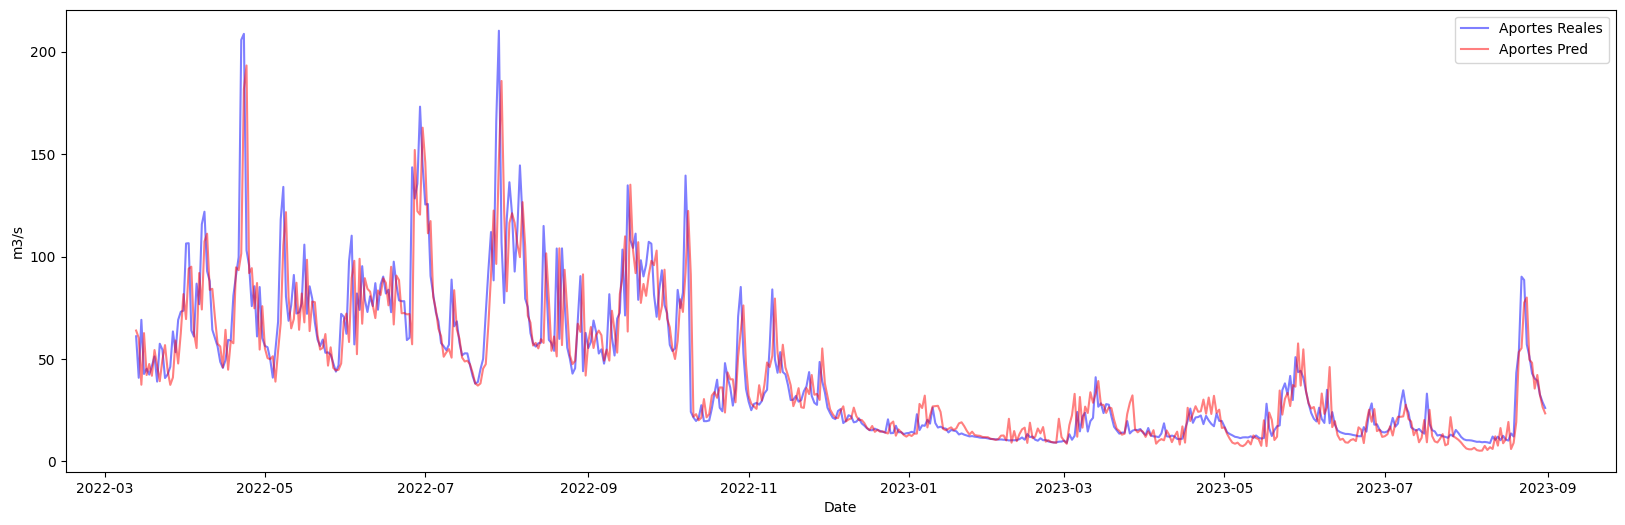

In [54]:
plot_pred_train(best_solution_PSO)

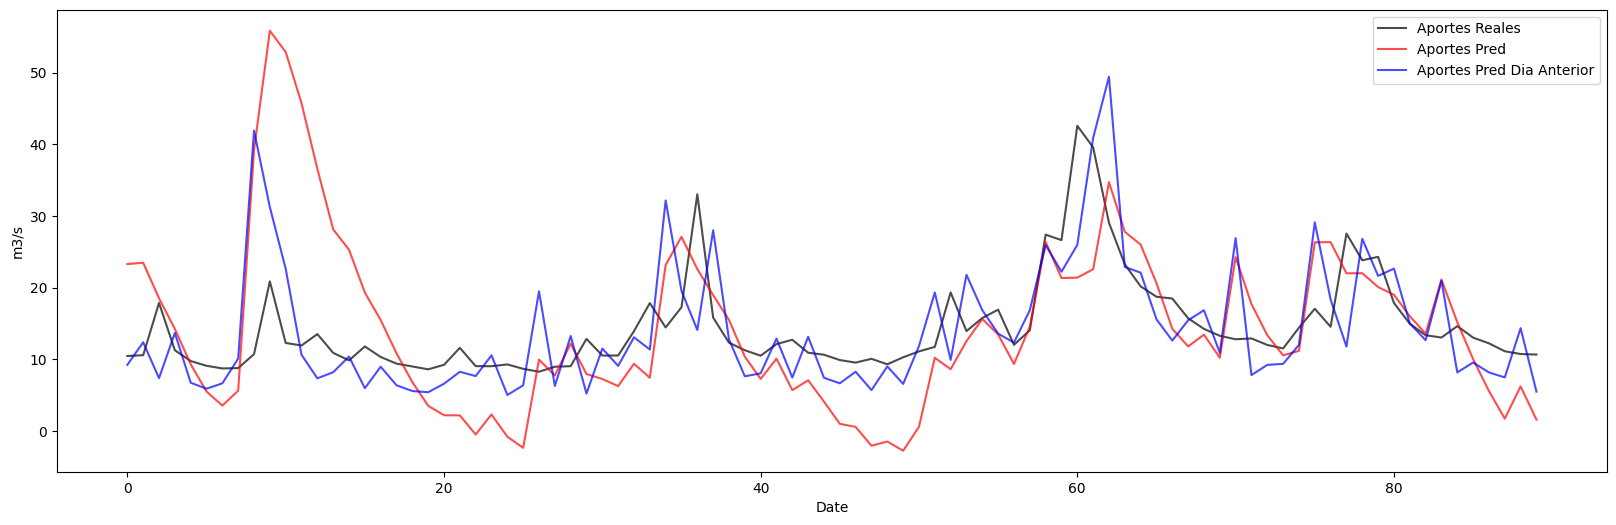

In [55]:
plot_pred_test(best_solution_PSO)

# 5. ACO: Optimización por Colonia de Hormigas

In [62]:
parameters_history_ACO = []
solutions_ACO = []
fevalACO = []
for alpha in [0.01,0.1,1]:
    for beta in [0.01,0.1,1]:
        for epoch in [300,500]:
            for pop_size in [20,35,50]:
                parameters_history_ACO.append({'alpha': alpha, 'beta': beta, 'epoch': epoch, 'pop_size': pop_size})

                n_dim=13#df.shape[1]
                problem = {
                    "obj_func": objective_function,
                    "bounds":FloatVar(lb=[-10,]*n_dim,ub=[10,]*n_dim),
                    "minmax": "min",
                }
                ACO_model=ACOR.OriginalACOR(epoch=epoch,pop_size=pop_size)
                ACO_model.solve(problem)
                
                solution_result = ACO_model.g_best.solution
                solutions_ACO.append(solution_result)
                fevalACO.append(objective_function(solution_result))
                print(objective_function(solution_result))

2025-03-03 20:20:52,782 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - Solving single objective optimization problem.
2025-03-03 20:20:52,869 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 1, Current best: 3337.910432074001, Global best: 3337.910432074001, Runtime: 0.07494 seconds
2025-03-03 20:20:53,098 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3337.910432074001, Global best: 3337.910432074001, Runtime: 0.22613 seconds
2025-03-03 20:20:53,148 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 928.1227410941693, Global best: 928.1227410941693, Runtime: 0.04719 seconds
2025-03-03 20:20:53,197 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 928.1227410941693, Global best: 928.1227410941693, Runtime: 0.04669 seconds
2025-03-03 20:20:53,245 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 490.6260078688595, Glo

368.26438496638445


2025-03-03 20:21:13,610 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 2713.784415847226, Global best: 2713.784415847226, Runtime: 0.05924 seconds
2025-03-03 20:21:13,666 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2713.784415847226, Global best: 2713.784415847226, Runtime: 0.05329 seconds
2025-03-03 20:21:13,736 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 2713.784415847226, Global best: 2713.784415847226, Runtime: 0.06732 seconds
2025-03-03 20:21:13,803 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 623.7706857818109, Global best: 623.7706857818109, Runtime: 0.06435 seconds
2025-03-03 20:21:13,865 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 623.7706857818109, Global best: 623.7706857818109, Runtime: 0.05914 seconds
2025-03-03 20:21:13,931 - mealpy.swarm_based.ACOR.OriginalACOR - 

376.2936318765122


2025-03-03 20:21:33,857 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1261.2136600550484, Global best: 1261.2136600550484, Runtime: 0.05961 seconds
2025-03-03 20:21:33,916 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1261.2136600550484, Global best: 1261.2136600550484, Runtime: 0.05677 seconds
2025-03-03 20:21:33,973 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1261.2136600550484, Global best: 1261.2136600550484, Runtime: 0.05376 seconds
2025-03-03 20:21:34,032 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1261.2136600550484, Global best: 1261.2136600550484, Runtime: 0.05615 seconds
2025-03-03 20:21:34,117 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1175.2702309655458, Global best: 1175.2702309655458, Runtime: 0.08299 seconds
2025-03-03 20:21:34,179 - mealpy.swarm_based.ACOR.Origi

372.0763133260947


2025-03-03 20:21:55,909 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1493.727336551995, Global best: 1493.727336551995, Runtime: 0.05366 seconds
2025-03-03 20:21:55,969 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1493.727336551995, Global best: 1493.727336551995, Runtime: 0.05756 seconds
2025-03-03 20:21:56,027 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1086.8624373049902, Global best: 1086.8624373049902, Runtime: 0.05507 seconds
2025-03-03 20:21:56,091 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 612.3351667187725, Global best: 612.3351667187725, Runtime: 0.06025 seconds
2025-03-03 20:21:56,156 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 612.3351667187725, Global best: 612.3351667187725, Runtime: 0.06237 seconds
2025-03-03 20:21:56,222 - mealpy.swarm_based.ACOR.OriginalACOR 

368.5578206560524


2025-03-03 20:22:25,168 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1803.0172105337087, Global best: 1803.0172105337087, Runtime: 0.06698 seconds
2025-03-03 20:22:25,252 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1803.0172105337087, Global best: 1803.0172105337087, Runtime: 0.08193 seconds
2025-03-03 20:22:25,304 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1803.0172105337087, Global best: 1803.0172105337087, Runtime: 0.05082 seconds
2025-03-03 20:22:25,360 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1803.0172105337087, Global best: 1803.0172105337087, Runtime: 0.05204 seconds
2025-03-03 20:22:25,428 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 921.761226484869, Global best: 921.761226484869, Runtime: 0.06415 seconds
2025-03-03 20:22:25,490 - mealpy.swarm_based.ACOR.OriginalA

369.2991761335942


2025-03-03 20:22:53,346 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1901.5930542088363, Global best: 1901.5930542088363, Runtime: 0.06736 seconds
2025-03-03 20:22:53,439 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 606.3385202208291, Global best: 606.3385202208291, Runtime: 0.09114 seconds
2025-03-03 20:22:53,546 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 606.3385202208291, Global best: 606.3385202208291, Runtime: 0.10368 seconds
2025-03-03 20:22:53,644 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 598.32410676132, Global best: 598.32410676132, Runtime: 0.09706 seconds
2025-03-03 20:22:53,726 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 9, Current best: 598.32410676132, Global best: 598.32410676132, Runtime: 0.07504 seconds
2025-03-03 20:22:53,804 - mealpy.swarm_based.ACOR.OriginalACOR - INFO -

372.36792427245916


2025-03-03 20:23:22,152 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 716.9718933225682, Global best: 716.9718933225682, Runtime: 0.04090 seconds
2025-03-03 20:23:22,197 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 716.9718933225682, Global best: 716.9718933225682, Runtime: 0.04315 seconds
2025-03-03 20:23:22,248 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 716.9718933225682, Global best: 716.9718933225682, Runtime: 0.04736 seconds
2025-03-03 20:23:22,290 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 716.9718933225682, Global best: 716.9718933225682, Runtime: 0.04058 seconds
2025-03-03 20:23:22,344 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 9, Current best: 716.9718933225682, Global best: 716.9718933225682, Runtime: 0.05154 seconds
2025-03-03 20:23:22,412 - mealpy.swarm_based.ACOR.OriginalACOR - 

373.88244827434926


2025-03-03 20:23:45,755 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2249.6641352563847, Global best: 2249.6641352563847, Runtime: 0.06706 seconds
2025-03-03 20:23:45,822 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1506.189192514561, Global best: 1506.189192514561, Runtime: 0.06330 seconds
2025-03-03 20:23:45,880 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 622.7192039177058, Global best: 622.7192039177058, Runtime: 0.05640 seconds
2025-03-03 20:23:45,935 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 622.7192039177058, Global best: 622.7192039177058, Runtime: 0.05361 seconds
2025-03-03 20:23:46,006 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 622.7192039177058, Global best: 622.7192039177058, Runtime: 0.06807 seconds
2025-03-03 20:23:46,082 - mealpy.swarm_based.ACOR.OriginalACOR 

374.7638171565589


2025-03-03 20:24:06,142 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1651.6927005048888, Global best: 1651.6927005048888, Runtime: 0.05224 seconds
2025-03-03 20:24:06,198 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1651.6927005048888, Global best: 1651.6927005048888, Runtime: 0.05438 seconds
2025-03-03 20:24:06,254 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 856.9372133439169, Global best: 856.9372133439169, Runtime: 0.05319 seconds
2025-03-03 20:24:06,303 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 856.9372133439169, Global best: 856.9372133439169, Runtime: 0.04675 seconds
2025-03-03 20:24:06,357 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 856.9372133439169, Global best: 856.9372133439169, Runtime: 0.05158 seconds
2025-03-03 20:24:06,402 - mealpy.swarm_based.ACOR.OriginalACO

376.53373653460284


2025-03-03 20:24:19,100 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 706.0951480019888, Global best: 706.0951480019888, Runtime: 0.04056 seconds
2025-03-03 20:24:19,139 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 706.0951480019888, Global best: 706.0951480019888, Runtime: 0.03803 seconds
2025-03-03 20:24:19,177 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 706.0951480019888, Global best: 706.0951480019888, Runtime: 0.03576 seconds
2025-03-03 20:24:19,216 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 706.0951480019888, Global best: 706.0951480019888, Runtime: 0.03621 seconds
2025-03-03 20:24:19,255 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 9, Current best: 706.0951480019888, Global best: 706.0951480019888, Runtime: 0.03708 seconds
2025-03-03 20:24:19,294 - mealpy.swarm_based.ACOR.OriginalACOR - 

371.78427056027095


2025-03-03 20:24:43,224 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 855.181705531999, Global best: 855.181705531999, Runtime: 0.04020 seconds
2025-03-03 20:24:43,262 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 585.0041570910456, Global best: 585.0041570910456, Runtime: 0.03709 seconds
2025-03-03 20:24:43,300 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 585.0041570910456, Global best: 585.0041570910456, Runtime: 0.03554 seconds
2025-03-03 20:24:43,340 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 585.0041570910456, Global best: 585.0041570910456, Runtime: 0.03901 seconds
2025-03-03 20:24:43,380 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 9, Current best: 585.0041570910456, Global best: 585.0041570910456, Runtime: 0.03717 seconds
2025-03-03 20:24:43,420 - mealpy.swarm_based.ACOR.OriginalACOR - IN

374.09913256695296


2025-03-03 20:25:05,962 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 2571.9163369002017, Global best: 2571.9163369002017, Runtime: 0.04119 seconds
2025-03-03 20:25:06,005 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 987.9132393333177, Global best: 987.9132393333177, Runtime: 0.04115 seconds
2025-03-03 20:25:06,049 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 987.9132393333177, Global best: 987.9132393333177, Runtime: 0.04293 seconds
2025-03-03 20:25:06,091 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 745.4015121051782, Global best: 745.4015121051782, Runtime: 0.03894 seconds
2025-03-03 20:25:06,136 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 9, Current best: 745.4015121051782, Global best: 745.4015121051782, Runtime: 0.04303 seconds
2025-03-03 20:25:06,180 - mealpy.swarm_based.ACOR.OriginalACOR 

374.1947281810481


2025-03-03 20:25:29,716 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2162.729959981253, Global best: 2162.729959981253, Runtime: 0.04160 seconds
2025-03-03 20:25:29,772 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 808.4397736292217, Global best: 808.4397736292217, Runtime: 0.05259 seconds
2025-03-03 20:25:29,824 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 748.2934317195211, Global best: 748.2934317195211, Runtime: 0.05052 seconds
2025-03-03 20:25:29,874 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 588.7826624305251, Global best: 588.7826624305251, Runtime: 0.04676 seconds
2025-03-03 20:25:29,916 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 588.7826624305251, Global best: 588.7826624305251, Runtime: 0.04112 seconds
2025-03-03 20:25:29,966 - mealpy.swarm_based.ACOR.OriginalACOR - 

376.6587633844023


2025-03-03 20:25:43,264 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1321.6844705571266, Global best: 1321.6844705571266, Runtime: 0.07114 seconds
2025-03-03 20:25:43,304 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 865.3767771422066, Global best: 865.3767771422066, Runtime: 0.03794 seconds
2025-03-03 20:25:43,344 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 865.3767771422066, Global best: 865.3767771422066, Runtime: 0.03925 seconds
2025-03-03 20:25:43,387 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 529.9467015507178, Global best: 529.9467015507178, Runtime: 0.03994 seconds
2025-03-03 20:25:43,430 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 529.9467015507178, Global best: 529.9467015507178, Runtime: 0.04036 seconds
2025-03-03 20:25:43,471 - mealpy.swarm_based.ACOR.OriginalACOR 

403.8744043975119


2025-03-03 20:25:58,270 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 827.5718697590333, Global best: 827.5718697590333, Runtime: 0.05710 seconds
2025-03-03 20:25:58,310 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 827.5718697590333, Global best: 827.5718697590333, Runtime: 0.03890 seconds
2025-03-03 20:25:58,354 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 827.5718697590333, Global best: 827.5718697590333, Runtime: 0.04061 seconds
2025-03-03 20:25:58,421 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 827.5718697590333, Global best: 827.5718697590333, Runtime: 0.06157 seconds
2025-03-03 20:25:58,478 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 827.5718697590333, Global best: 827.5718697590333, Runtime: 0.05549 seconds
2025-03-03 20:25:58,527 - mealpy.swarm_based.ACOR.OriginalACOR - 

404.03802438665724


2025-03-03 20:26:23,585 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 710.1726199837261, Global best: 710.1726199837261, Runtime: 0.07960 seconds
2025-03-03 20:26:23,663 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 710.1726199837261, Global best: 710.1726199837261, Runtime: 0.07513 seconds
2025-03-03 20:26:23,756 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 710.1726199837261, Global best: 710.1726199837261, Runtime: 0.08969 seconds
2025-03-03 20:26:23,825 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 710.1726199837261, Global best: 710.1726199837261, Runtime: 0.06375 seconds
2025-03-03 20:26:23,920 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 710.1726199837261, Global best: 710.1726199837261, Runtime: 0.08745 seconds
2025-03-03 20:26:24,000 - mealpy.swarm_based.ACOR.OriginalACOR - 

367.722732841963


2025-03-03 20:27:04,911 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1649.2549722174958, Global best: 1649.2549722174958, Runtime: 0.06485 seconds
2025-03-03 20:27:04,983 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1649.2549722174958, Global best: 1649.2549722174958, Runtime: 0.06977 seconds
2025-03-03 20:27:05,045 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1230.2333434293732, Global best: 1230.2333434293732, Runtime: 0.05814 seconds
2025-03-03 20:27:05,119 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1230.2333434293732, Global best: 1230.2333434293732, Runtime: 0.06076 seconds
2025-03-03 20:27:05,187 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1230.2333434293732, Global best: 1230.2333434293732, Runtime: 0.06482 seconds
2025-03-03 20:27:05,259 - mealpy.swarm_based.ACOR.Origi

382.14952974777174


2025-03-03 20:27:38,674 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1400.1574700531994, Global best: 1400.1574700531994, Runtime: 0.03756 seconds
2025-03-03 20:27:38,718 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1400.1574700531994, Global best: 1400.1574700531994, Runtime: 0.04104 seconds
2025-03-03 20:27:38,757 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 975.7004394319067, Global best: 975.7004394319067, Runtime: 0.03808 seconds
2025-03-03 20:27:38,800 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 975.7004394319067, Global best: 975.7004394319067, Runtime: 0.04044 seconds
2025-03-03 20:27:38,864 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 975.7004394319067, Global best: 975.7004394319067, Runtime: 0.06169 seconds
2025-03-03 20:27:38,934 - mealpy.swarm_based.ACOR.OriginalACO

386.4448774486172


2025-03-03 20:28:31,491 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3013.3896755467877, Global best: 3013.3896755467877, Runtime: 0.14429 seconds
2025-03-03 20:28:31,752 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1329.752256173941, Global best: 1329.752256173941, Runtime: 0.25088 seconds
2025-03-03 20:28:31,952 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1329.752256173941, Global best: 1329.752256173941, Runtime: 0.19734 seconds
2025-03-03 20:28:32,101 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1329.752256173941, Global best: 1329.752256173941, Runtime: 0.13762 seconds
2025-03-03 20:28:32,225 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1329.752256173941, Global best: 1329.752256173941, Runtime: 0.11161 seconds
2025-03-03 20:28:32,305 - mealpy.swarm_based.ACOR.OriginalACOR 

368.89177892491773


2025-03-03 20:29:02,426 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 1145.756343681028, Global best: 1145.756343681028, Runtime: 0.08303 seconds
2025-03-03 20:29:02,518 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1145.756343681028, Global best: 1145.756343681028, Runtime: 0.08735 seconds
2025-03-03 20:29:02,615 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 570.8394131553591, Global best: 570.8394131553591, Runtime: 0.08982 seconds
2025-03-03 20:29:02,723 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 570.8394131553591, Global best: 570.8394131553591, Runtime: 0.10336 seconds
2025-03-03 20:29:02,797 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 570.8394131553591, Global best: 570.8394131553591, Runtime: 0.07218 seconds
2025-03-03 20:29:02,876 - mealpy.swarm_based.ACOR.OriginalACOR - 

384.0664588204512


2025-03-03 20:29:32,401 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 2037.2840811608355, Global best: 2037.2840811608355, Runtime: 0.09057 seconds
2025-03-03 20:29:32,516 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 2037.2840811608355, Global best: 2037.2840811608355, Runtime: 0.11267 seconds
2025-03-03 20:29:32,706 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2037.2840811608355, Global best: 2037.2840811608355, Runtime: 0.18412 seconds
2025-03-03 20:29:32,824 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 2037.2840811608355, Global best: 2037.2840811608355, Runtime: 0.11347 seconds
2025-03-03 20:29:32,928 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 2037.2840811608355, Global best: 2037.2840811608355, Runtime: 0.10158 seconds
2025-03-03 20:29:33,010 - mealpy.swarm_based.ACOR.Origi

386.8981475720961


2025-03-03 20:30:01,635 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3123.6326393768622, Global best: 3123.6326393768622, Runtime: 0.10757 seconds
2025-03-03 20:30:01,724 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1272.2203646438327, Global best: 1272.2203646438327, Runtime: 0.08808 seconds
2025-03-03 20:30:01,815 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 917.3502226605134, Global best: 917.3502226605134, Runtime: 0.08397 seconds
2025-03-03 20:30:01,902 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 835.8745269660105, Global best: 835.8745269660105, Runtime: 0.08341 seconds
2025-03-03 20:30:01,983 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 773.2178872588511, Global best: 773.2178872588511, Runtime: 0.07686 seconds
2025-03-03 20:30:02,143 - mealpy.swarm_based.ACOR.OriginalACO

366.3567559533765


2025-03-03 20:30:50,943 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 1846.498904972497, Global best: 1846.498904972497, Runtime: 0.09762 seconds
2025-03-03 20:30:51,043 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1846.498904972497, Global best: 1846.498904972497, Runtime: 0.09449 seconds
2025-03-03 20:30:51,179 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1846.498904972497, Global best: 1846.498904972497, Runtime: 0.13272 seconds
2025-03-03 20:30:51,300 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1846.498904972497, Global best: 1846.498904972497, Runtime: 0.11634 seconds
2025-03-03 20:30:51,409 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1846.498904972497, Global best: 1846.498904972497, Runtime: 0.10057 seconds
2025-03-03 20:30:51,535 - mealpy.swarm_based.ACOR.OriginalACOR - 

374.36692498597665


2025-03-03 20:31:21,169 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1985.388154575255, Global best: 1985.388154575255, Runtime: 0.05227 seconds
2025-03-03 20:31:21,350 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1985.388154575255, Global best: 1985.388154575255, Runtime: 0.17784 seconds
2025-03-03 20:31:21,410 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1985.388154575255, Global best: 1985.388154575255, Runtime: 0.05780 seconds
2025-03-03 20:31:21,466 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1985.388154575255, Global best: 1985.388154575255, Runtime: 0.05295 seconds
2025-03-03 20:31:21,519 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1985.388154575255, Global best: 1985.388154575255, Runtime: 0.05008 seconds
2025-03-03 20:31:21,574 - mealpy.swarm_based.ACOR.OriginalACOR - 

377.72852822827167


2025-03-03 20:31:49,558 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 933.7584895580177, Global best: 933.7584895580177, Runtime: 0.05655 seconds
2025-03-03 20:31:49,620 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 933.7584895580177, Global best: 933.7584895580177, Runtime: 0.05870 seconds
2025-03-03 20:31:49,684 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 872.3710148158073, Global best: 872.3710148158073, Runtime: 0.06241 seconds
2025-03-03 20:31:49,742 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 872.3710148158073, Global best: 872.3710148158073, Runtime: 0.05563 seconds
2025-03-03 20:31:49,791 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 803.7868307726106, Global best: 803.7868307726106, Runtime: 0.04569 seconds
2025-03-03 20:31:49,838 - mealpy.swarm_based.ACOR.OriginalACOR - 

370.4393470892617


2025-03-03 20:32:13,150 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1953.2725891826224, Global best: 1953.2725891826224, Runtime: 0.09156 seconds
2025-03-03 20:32:13,305 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1384.2133437483033, Global best: 1384.2133437483033, Runtime: 0.15178 seconds
2025-03-03 20:32:13,457 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1384.2133437483033, Global best: 1384.2133437483033, Runtime: 0.14852 seconds
2025-03-03 20:32:13,533 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1384.2133437483033, Global best: 1384.2133437483033, Runtime: 0.07238 seconds
2025-03-03 20:32:13,666 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1384.2133437483033, Global best: 1384.2133437483033, Runtime: 0.12951 seconds
2025-03-03 20:32:13,767 - mealpy.swarm_based.ACOR.Origi

380.95731086544436


2025-03-03 20:32:41,041 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 935.9402547375087, Global best: 935.9402547375087, Runtime: 0.08487 seconds
2025-03-03 20:32:41,144 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 935.9402547375087, Global best: 935.9402547375087, Runtime: 0.09954 seconds
2025-03-03 20:32:41,255 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 935.9402547375087, Global best: 935.9402547375087, Runtime: 0.10878 seconds
2025-03-03 20:32:41,335 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 935.9402547375087, Global best: 935.9402547375087, Runtime: 0.07360 seconds
2025-03-03 20:32:41,437 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 935.9402547375087, Global best: 935.9402547375087, Runtime: 0.09793 seconds
2025-03-03 20:32:41,514 - mealpy.swarm_based.ACOR.OriginalACOR - 

385.17519900018567


2025-03-03 20:33:11,849 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 2717.811131222595, Global best: 2717.811131222595, Runtime: 0.07877 seconds
2025-03-03 20:33:11,947 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2717.811131222595, Global best: 2717.811131222595, Runtime: 0.09265 seconds
2025-03-03 20:33:12,023 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 2717.811131222595, Global best: 2717.811131222595, Runtime: 0.07324 seconds
2025-03-03 20:33:12,108 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1167.594299319376, Global best: 1167.594299319376, Runtime: 0.08350 seconds
2025-03-03 20:33:12,193 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1167.594299319376, Global best: 1167.594299319376, Runtime: 0.08032 seconds
2025-03-03 20:33:12,272 - mealpy.swarm_based.ACOR.OriginalACOR - 

366.01790239181304


2025-03-03 20:33:59,088 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 1769.1480689646596, Global best: 1769.1480689646596, Runtime: 0.11955 seconds
2025-03-03 20:33:59,211 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 499.4538446268496, Global best: 499.4538446268496, Runtime: 0.11565 seconds
2025-03-03 20:33:59,315 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 499.4538446268496, Global best: 499.4538446268496, Runtime: 0.09789 seconds
2025-03-03 20:33:59,645 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 499.4538446268496, Global best: 499.4538446268496, Runtime: 0.32136 seconds
2025-03-03 20:33:59,773 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 499.4538446268496, Global best: 499.4538446268496, Runtime: 0.12474 seconds
2025-03-03 20:33:59,888 - mealpy.swarm_based.ACOR.OriginalACOR 

370.9623038049329


2025-03-03 20:34:50,264 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 592.0953573057915, Global best: 592.0953573057915, Runtime: 0.08727 seconds
2025-03-03 20:34:50,349 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 592.0953573057915, Global best: 592.0953573057915, Runtime: 0.08082 seconds
2025-03-03 20:34:50,428 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 592.0953573057915, Global best: 592.0953573057915, Runtime: 0.07533 seconds
2025-03-03 20:34:50,507 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 592.0953573057915, Global best: 592.0953573057915, Runtime: 0.07485 seconds
2025-03-03 20:34:50,600 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 592.0953573057915, Global best: 592.0953573057915, Runtime: 0.08951 seconds
2025-03-03 20:34:50,694 - mealpy.swarm_based.ACOR.OriginalACOR - 

378.02011180491127


2025-03-03 20:35:41,630 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1830.5373802583124, Global best: 1830.5373802583124, Runtime: 0.07721 seconds
2025-03-03 20:35:41,748 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1830.5373802583124, Global best: 1830.5373802583124, Runtime: 0.11348 seconds
2025-03-03 20:35:41,991 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1361.5787277635693, Global best: 1361.5787277635693, Runtime: 0.19483 seconds
2025-03-03 20:35:42,099 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 839.1983995109995, Global best: 839.1983995109995, Runtime: 0.10025 seconds
2025-03-03 20:35:42,206 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 839.1983995109995, Global best: 839.1983995109995, Runtime: 0.10295 seconds
2025-03-03 20:35:42,281 - mealpy.swarm_based.ACOR.OriginalA

371.3339561229926


2025-03-03 20:36:10,355 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1786.1557864749748, Global best: 1786.1557864749748, Runtime: 0.08724 seconds
2025-03-03 20:36:10,467 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1786.1557864749748, Global best: 1786.1557864749748, Runtime: 0.11003 seconds
2025-03-03 20:36:10,585 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1786.1557864749748, Global best: 1786.1557864749748, Runtime: 0.11449 seconds
2025-03-03 20:36:10,718 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1786.1557864749748, Global best: 1786.1557864749748, Runtime: 0.12862 seconds
2025-03-03 20:36:10,869 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1786.1557864749748, Global best: 1786.1557864749748, Runtime: 0.14916 seconds
2025-03-03 20:36:10,970 - mealpy.swarm_based.ACOR.Origi

387.72304089391326


2025-03-03 20:36:38,896 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1521.0126526375698, Global best: 1521.0126526375698, Runtime: 0.24131 seconds
2025-03-03 20:36:38,988 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1521.0126526375698, Global best: 1521.0126526375698, Runtime: 0.08451 seconds
2025-03-03 20:36:39,078 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1521.0126526375698, Global best: 1521.0126526375698, Runtime: 0.08764 seconds
2025-03-03 20:36:39,147 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1521.0126526375698, Global best: 1521.0126526375698, Runtime: 0.06732 seconds
2025-03-03 20:36:39,244 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 904.4018892697086, Global best: 904.4018892697086, Runtime: 0.09189 seconds
2025-03-03 20:36:39,328 - mealpy.swarm_based.ACOR.Origina

400.925720435935


2025-03-03 20:37:10,107 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 508.1042587356124, Global best: 508.1042587356124, Runtime: 0.08907 seconds
2025-03-03 20:37:10,217 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 508.1042587356124, Global best: 508.1042587356124, Runtime: 0.10640 seconds
2025-03-03 20:37:10,468 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 508.1042587356124, Global best: 508.1042587356124, Runtime: 0.22329 seconds
2025-03-03 20:37:10,549 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 508.1042587356124, Global best: 508.1042587356124, Runtime: 0.07592 seconds
2025-03-03 20:37:10,636 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 508.1042587356124, Global best: 508.1042587356124, Runtime: 0.08352 seconds
2025-03-03 20:37:10,753 - mealpy.swarm_based.ACOR.OriginalACOR - 

367.8230539115996


2025-03-03 20:38:01,695 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 4813.614446513187, Global best: 4813.614446513187, Runtime: 0.14334 seconds
2025-03-03 20:38:01,920 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 4813.614446513187, Global best: 4813.614446513187, Runtime: 0.22147 seconds
2025-03-03 20:38:02,119 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 4813.614446513187, Global best: 4813.614446513187, Runtime: 0.17346 seconds
2025-03-03 20:38:02,221 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1924.5632096597278, Global best: 1924.5632096597278, Runtime: 0.09892 seconds
2025-03-03 20:38:02,315 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1621.217146669333, Global best: 1621.217146669333, Runtime: 0.08858 seconds
2025-03-03 20:38:02,404 - mealpy.swarm_based.ACOR.OriginalACOR 

369.68263329145066


2025-03-03 20:38:53,240 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 2313.179347350817, Global best: 2313.179347350817, Runtime: 0.15802 seconds
2025-03-03 20:38:53,429 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1848.6896890993457, Global best: 1848.6896890993457, Runtime: 0.18502 seconds
2025-03-03 20:38:53,658 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1848.6896890993457, Global best: 1848.6896890993457, Runtime: 0.22696 seconds
2025-03-03 20:38:53,802 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1667.7898890573165, Global best: 1667.7898890573165, Runtime: 0.10257 seconds
2025-03-03 20:38:53,898 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1667.7898890573165, Global best: 1667.7898890573165, Runtime: 0.09199 seconds
2025-03-03 20:38:53,993 - mealpy.swarm_based.ACOR.Origina

379.09762644986995


2025-03-03 20:39:45,501 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3294.4240386756655, Global best: 3294.4240386756655, Runtime: 0.15682 seconds
2025-03-03 20:39:45,917 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1553.523247442577, Global best: 1553.523247442577, Runtime: 0.39341 seconds
2025-03-03 20:39:45,995 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1204.7430210045832, Global best: 1204.7430210045832, Runtime: 0.07501 seconds
2025-03-03 20:39:46,093 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1204.7430210045832, Global best: 1204.7430210045832, Runtime: 0.09582 seconds
2025-03-03 20:39:46,185 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1204.7430210045832, Global best: 1204.7430210045832, Runtime: 0.09025 seconds
2025-03-03 20:39:46,281 - mealpy.swarm_based.ACOR.Origina

366.8493206424636


2025-03-03 20:40:16,025 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 935.9577123813596, Global best: 935.9577123813596, Runtime: 0.09681 seconds
2025-03-03 20:40:16,156 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 935.9577123813596, Global best: 935.9577123813596, Runtime: 0.12841 seconds
2025-03-03 20:40:16,270 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 935.9577123813596, Global best: 935.9577123813596, Runtime: 0.10992 seconds
2025-03-03 20:40:16,365 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 935.9577123813596, Global best: 935.9577123813596, Runtime: 0.08901 seconds
2025-03-03 20:40:16,473 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 935.9577123813596, Global best: 935.9577123813596, Runtime: 0.10077 seconds
2025-03-03 20:40:16,583 - mealpy.swarm_based.ACOR.OriginalACOR - 

367.78119146302447


2025-03-03 20:40:49,506 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 677.9143065212894, Global best: 677.9143065212894, Runtime: 0.09559 seconds
2025-03-03 20:40:49,592 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 677.9143065212894, Global best: 677.9143065212894, Runtime: 0.08292 seconds
2025-03-03 20:40:49,689 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 677.9143065212894, Global best: 677.9143065212894, Runtime: 0.09411 seconds
2025-03-03 20:40:49,767 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 677.9143065212894, Global best: 677.9143065212894, Runtime: 0.07623 seconds
2025-03-03 20:40:49,848 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 677.9143065212894, Global best: 677.9143065212894, Runtime: 0.07795 seconds
2025-03-03 20:40:49,938 - mealpy.swarm_based.ACOR.OriginalACOR - 

371.61315595075246


2025-03-03 20:41:17,427 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3596.158823139886, Global best: 3596.158823139886, Runtime: 0.07397 seconds
2025-03-03 20:41:17,505 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3596.158823139886, Global best: 3596.158823139886, Runtime: 0.07365 seconds
2025-03-03 20:41:17,582 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3419.667928649135, Global best: 3419.667928649135, Runtime: 0.07435 seconds
2025-03-03 20:41:17,650 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1971.0587885010546, Global best: 1971.0587885010546, Runtime: 0.06397 seconds
2025-03-03 20:41:17,765 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1971.0587885010546, Global best: 1971.0587885010546, Runtime: 0.11245 seconds
2025-03-03 20:41:17,914 - mealpy.swarm_based.ACOR.OriginalACO

366.8259359124659


2025-03-03 20:41:44,213 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2833.067282707787, Global best: 2833.067282707787, Runtime: 0.05056 seconds
2025-03-03 20:41:44,261 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1233.479803208465, Global best: 1233.479803208465, Runtime: 0.04518 seconds
2025-03-03 20:41:44,308 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1233.479803208465, Global best: 1233.479803208465, Runtime: 0.04591 seconds
2025-03-03 20:41:44,355 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1003.7425130439022, Global best: 1003.7425130439022, Runtime: 0.04482 seconds
2025-03-03 20:41:44,400 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 955.9560081288308, Global best: 955.9560081288308, Runtime: 0.04217 seconds
2025-03-03 20:41:44,445 - mealpy.swarm_based.ACOR.OriginalACOR 

366.8355861341125


2025-03-03 20:42:08,133 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1198.9825461466346, Global best: 1198.9825461466346, Runtime: 0.04277 seconds
2025-03-03 20:42:08,181 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1198.9825461466346, Global best: 1198.9825461466346, Runtime: 0.04537 seconds
2025-03-03 20:42:08,324 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1198.9825461466346, Global best: 1198.9825461466346, Runtime: 0.12127 seconds
2025-03-03 20:42:08,383 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1198.9825461466346, Global best: 1198.9825461466346, Runtime: 0.05675 seconds
2025-03-03 20:42:08,424 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1198.9825461466346, Global best: 1198.9825461466346, Runtime: 0.03880 seconds
2025-03-03 20:42:08,469 - mealpy.swarm_based.ACOR.Origi

367.2444409895479


2025-03-03 20:42:38,372 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 5647.6391087210695, Global best: 5647.6391087210695, Runtime: 0.05681 seconds
2025-03-03 20:42:38,443 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 5647.6391087210695, Global best: 5647.6391087210695, Runtime: 0.06710 seconds
2025-03-03 20:42:38,613 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1730.0380666918313, Global best: 1730.0380666918313, Runtime: 0.16559 seconds
2025-03-03 20:42:38,702 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1263.5740530859666, Global best: 1263.5740530859666, Runtime: 0.08650 seconds
2025-03-03 20:42:38,760 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1032.1306612596368, Global best: 1032.1306612596368, Runtime: 0.05536 seconds
2025-03-03 20:42:38,845 - mealpy.swarm_based.ACOR.Origi

367.05808577880686


2025-03-03 20:42:58,966 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1898.4779270265856, Global best: 1898.4779270265856, Runtime: 0.05828 seconds
2025-03-03 20:42:59,030 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1898.4779270265856, Global best: 1898.4779270265856, Runtime: 0.06114 seconds
2025-03-03 20:42:59,134 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1898.4779270265856, Global best: 1898.4779270265856, Runtime: 0.10114 seconds
2025-03-03 20:42:59,210 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1281.2564765021311, Global best: 1281.2564765021311, Runtime: 0.07067 seconds
2025-03-03 20:42:59,286 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1281.2564765021311, Global best: 1281.2564765021311, Runtime: 0.07383 seconds
2025-03-03 20:42:59,376 - mealpy.swarm_based.ACOR.Origi

367.92298336024544


2025-03-03 20:43:16,108 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1255.7022298864363, Global best: 1255.7022298864363, Runtime: 0.05187 seconds
2025-03-03 20:43:16,165 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1255.7022298864363, Global best: 1255.7022298864363, Runtime: 0.05430 seconds
2025-03-03 20:43:16,311 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1255.7022298864363, Global best: 1255.7022298864363, Runtime: 0.14434 seconds
2025-03-03 20:43:16,423 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1255.7022298864363, Global best: 1255.7022298864363, Runtime: 0.10852 seconds
2025-03-03 20:43:16,477 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1255.7022298864363, Global best: 1255.7022298864363, Runtime: 0.05158 seconds
2025-03-03 20:43:16,526 - mealpy.swarm_based.ACOR.Origi

374.44819073156236


2025-03-03 20:43:33,196 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 2062.5116730248747, Global best: 2062.5116730248747, Runtime: 0.06961 seconds
2025-03-03 20:43:33,268 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1773.4882478790573, Global best: 1773.4882478790573, Runtime: 0.07097 seconds
2025-03-03 20:43:33,431 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1663.664282261962, Global best: 1663.664282261962, Runtime: 0.15815 seconds
2025-03-03 20:43:33,508 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1263.9744417419051, Global best: 1263.9744417419051, Runtime: 0.07247 seconds
2025-03-03 20:43:33,564 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1158.162688949325, Global best: 1158.162688949325, Runtime: 0.05307 seconds
2025-03-03 20:43:33,618 - mealpy.swarm_based.ACOR.OriginalA

367.0434096971564


2025-03-03 20:44:01,552 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3663.8993721471525, Global best: 3663.8993721471525, Runtime: 0.13079 seconds
2025-03-03 20:44:01,774 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 2672.389881085456, Global best: 2672.389881085456, Runtime: 0.21325 seconds
2025-03-03 20:44:01,844 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 2672.389881085456, Global best: 2672.389881085456, Runtime: 0.06831 seconds
2025-03-03 20:44:01,915 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 2672.389881085456, Global best: 2672.389881085456, Runtime: 0.06433 seconds
2025-03-03 20:44:01,963 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1470.191263346664, Global best: 1470.191263346664, Runtime: 0.04650 seconds
2025-03-03 20:44:02,028 - mealpy.swarm_based.ACOR.OriginalACOR 

367.0535323693337


2025-03-03 20:44:33,528 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 2822.4254579201624, Global best: 2822.4254579201624, Runtime: 0.08471 seconds
2025-03-03 20:44:33,597 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 2822.4254579201624, Global best: 2822.4254579201624, Runtime: 0.06449 seconds
2025-03-03 20:44:33,688 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2822.4254579201624, Global best: 2822.4254579201624, Runtime: 0.08949 seconds
2025-03-03 20:44:33,740 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1639.3438001226227, Global best: 1639.3438001226227, Runtime: 0.04861 seconds
2025-03-03 20:44:33,838 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1639.3438001226227, Global best: 1639.3438001226227, Runtime: 0.09624 seconds
2025-03-03 20:44:33,932 - mealpy.swarm_based.ACOR.Origi

367.6638870359787


2025-03-03 20:45:00,748 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 2718.812558142639, Global best: 2718.812558142639, Runtime: 0.14761 seconds
2025-03-03 20:45:00,862 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1930.8774381199898, Global best: 1930.8774381199898, Runtime: 0.11081 seconds
2025-03-03 20:45:00,992 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1471.2322976478545, Global best: 1471.2322976478545, Runtime: 0.12632 seconds
2025-03-03 20:45:01,052 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1157.6845931233445, Global best: 1157.6845931233445, Runtime: 0.05567 seconds
2025-03-03 20:45:01,106 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1157.6845931233445, Global best: 1157.6845931233445, Runtime: 0.05233 seconds
2025-03-03 20:45:01,190 - mealpy.swarm_based.ACOR.Origina

368.82353967203284


2025-03-03 20:45:17,031 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 4092.3912009092514, Global best: 4092.3912009092514, Runtime: 0.05169 seconds
2025-03-03 20:45:17,238 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 2821.511514806999, Global best: 2821.511514806999, Runtime: 0.20410 seconds
2025-03-03 20:45:17,298 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 2821.511514806999, Global best: 2821.511514806999, Runtime: 0.05573 seconds
2025-03-03 20:45:17,353 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 2821.511514806999, Global best: 2821.511514806999, Runtime: 0.05163 seconds
2025-03-03 20:45:17,533 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 2821.511514806999, Global best: 2821.511514806999, Runtime: 0.17772 seconds
2025-03-03 20:45:17,579 - mealpy.swarm_based.ACOR.OriginalACOR 

372.50981689302876


2025-03-03 20:45:33,468 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1478.764635822126, Global best: 1478.764635822126, Runtime: 0.06487 seconds
2025-03-03 20:45:33,570 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1478.764635822126, Global best: 1478.764635822126, Runtime: 0.09835 seconds
2025-03-03 20:45:33,726 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1478.764635822126, Global best: 1478.764635822126, Runtime: 0.15084 seconds
2025-03-03 20:45:33,776 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1478.764635822126, Global best: 1478.764635822126, Runtime: 0.04796 seconds
2025-03-03 20:45:33,828 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1478.764635822126, Global best: 1478.764635822126, Runtime: 0.05072 seconds
2025-03-03 20:45:33,888 - mealpy.swarm_based.ACOR.OriginalACOR - 

374.91472479040044


2025-03-03 20:45:51,528 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 1694.8525660301543, Global best: 1694.8525660301543, Runtime: 0.05024 seconds
2025-03-03 20:45:51,600 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1694.8525660301543, Global best: 1694.8525660301543, Runtime: 0.06776 seconds
2025-03-03 20:45:51,668 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1358.4660795488376, Global best: 1358.4660795488376, Runtime: 0.06719 seconds
2025-03-03 20:45:51,727 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1263.341535231012, Global best: 1263.341535231012, Runtime: 0.05578 seconds
2025-03-03 20:45:51,780 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1263.341535231012, Global best: 1263.341535231012, Runtime: 0.05009 seconds
2025-03-03 20:45:51,843 - mealpy.swarm_based.ACOR.OriginalA

368.76583617030275


2025-03-03 20:46:19,051 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1207.2661599741991, Global best: 1207.2661599741991, Runtime: 0.04600 seconds
2025-03-03 20:46:19,112 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1207.2661599741991, Global best: 1207.2661599741991, Runtime: 0.05910 seconds
2025-03-03 20:46:19,165 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1207.2661599741991, Global best: 1207.2661599741991, Runtime: 0.05042 seconds
2025-03-03 20:46:19,250 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1207.2661599741991, Global best: 1207.2661599741991, Runtime: 0.08147 seconds
2025-03-03 20:46:19,323 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1207.2661599741991, Global best: 1207.2661599741991, Runtime: 0.06898 seconds
2025-03-03 20:46:19,390 - mealpy.swarm_based.ACOR.Origi

368.7964122313549


2025-03-03 20:46:44,808 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 1052.5061478255707, Global best: 1052.5061478255707, Runtime: 0.03961 seconds
2025-03-03 20:46:44,963 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 1052.5061478255707, Global best: 1052.5061478255707, Runtime: 0.15062 seconds
2025-03-03 20:46:45,031 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 1052.5061478255707, Global best: 1052.5061478255707, Runtime: 0.06498 seconds
2025-03-03 20:46:45,088 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 1052.5061478255707, Global best: 1052.5061478255707, Runtime: 0.05431 seconds
2025-03-03 20:46:45,133 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 1052.5061478255707, Global best: 1052.5061478255707, Runtime: 0.04142 seconds
2025-03-03 20:46:45,179 - mealpy.swarm_based.ACOR.Origi

369.52611578286763


In [63]:
best_fevalACO_idx=fevalACO.index(min(fevalACO))
best_solution_ACO = solutions_ACO[best_fevalACO_idx]
print(parameters_history_ACO[best_fevalACO_idx])
print(fevalACO[best_fevalACO_idx])

{'alpha': 0.1, 'beta': 0.1, 'epoch': 500, 'pop_size': 20}
366.01790239181304


In [64]:
# Evaluar el modelo
y_pred_best_ACO = X_test.dot(best_solution_ACO)
r2_test = metrics.r2_score(y_test, y_pred_best_ACO)
print("R2_score en test:", r2_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_best_ACO))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_best_ACO))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_ACO)))

R2_score en test: 0.3186480989165217
MAE: 4.1080239143160115
MSE: 35.5491532084425
RMSE: 5.962311062704


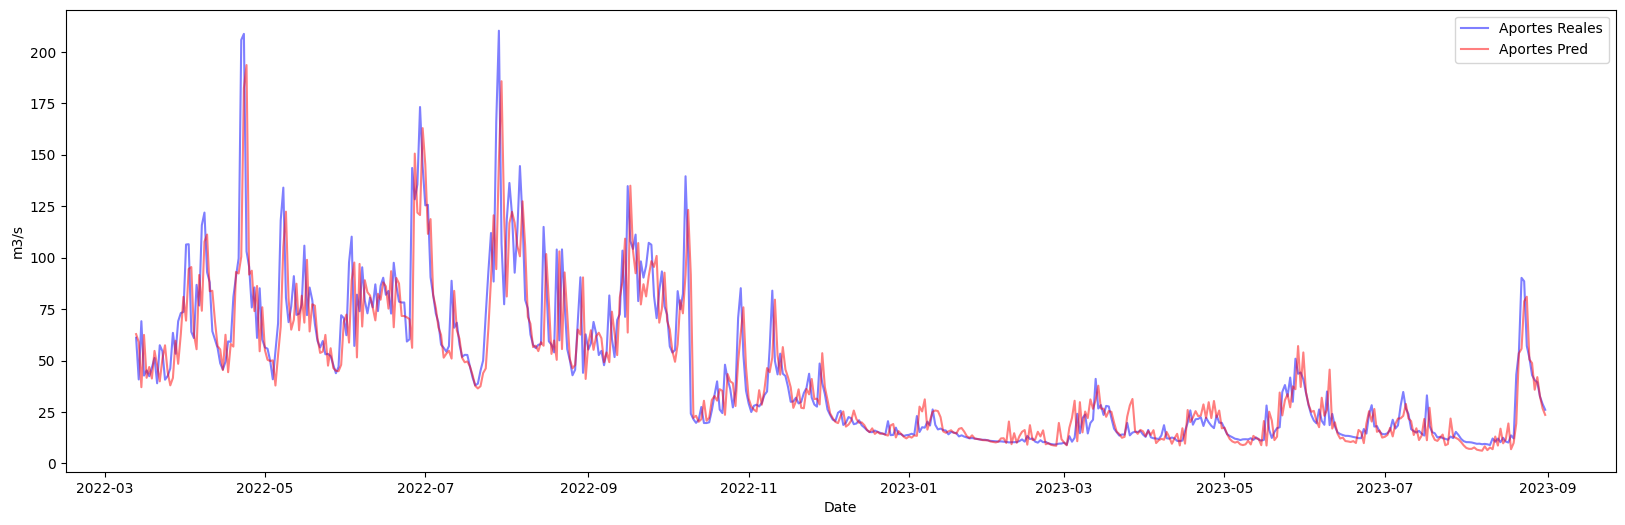

In [65]:
plot_pred_train(best_solution_ACO)

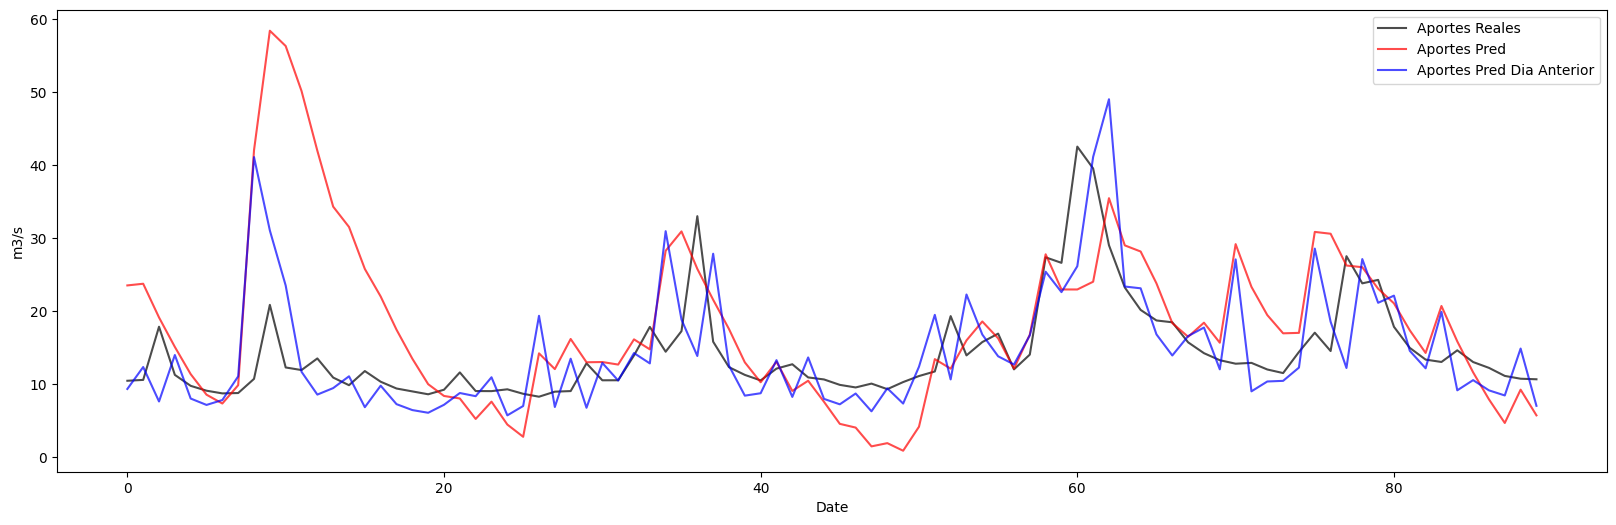

In [66]:
plot_pred_test(best_solution_ACO)

In [67]:
print(best_solution_ACO)

[-0.24920143 -0.19748052 -0.54682167 -0.15459748  0.36228695  0.46453754
 -0.30257006 -0.35098272 -0.13732911  0.65655197 -1.14792372  0.31340314
  0.87363389]


In [68]:
import pickle
import os

# Create the directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save best_solution_ACO
with open('models/best_solution_ACO.pkl', 'wb') as f:
    pickle.dump(best_solution_ACO, f)

# Save best_solution_PSO
with open('models/best_solution_PSO.pkl', 'wb') as f:
    pickle.dump(best_solution_PSO, f)